
# Introduction

In [3]:
import sys
import os
import math
from matplotlib.lines import Line2D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import geodatasets
import geopandas as gpd
import re
import folium
from folium import plugins
import earthpy as et
import webbrowser
from matplotlib.colors import LogNorm, Normalize
from matplotlib.cm import get_cmap
from branca.colormap import LinearColormap
import statsmodels.api as sm
from geopy.distance import geodesic
from scipy.stats import norm
import elevation
import shapely.geometry
from shapely.geometry import Point, box, Polygon, MultiPolygon
import seaborn as sns
from shapely.wkt import loads
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px
import rasterio
from rasterio.plot import show
from rasterio.warp import reproject, Resampling, calculate_default_transform
from rasterio.transform import from_bounds, from_origin
from rasterio.mask import mask
import earthpy.spatial as es
from scipy.interpolate import RegularGridInterpolator
from matplotlib.backends.backend_pdf import PdfPages
import streamlit as st
import matplotlib.colors as mcolors
import PyCO2SYS as cs


In [4]:
df = pd.read_excel('/Users/enrico/Desktop/Part III Project/Code/Nepal-1/Datasets/NMS_Copy_080125.xlsx', sheet_name='Final_compiled')

df_abra = pd.read_excel('/Users/enrico/Desktop/Part III Project/Code/Nepal-1/Datasets/Abra.xlsx', sheet_name='Sheet1')

df_copy = df.copy()


In [5]:
df_rain = df[df['Sample type'] == 'Rain']    

#print(df_rain['Sample ID'])

In [6]:
df_timeseries = df[df['Season'].str.contains('_timeseries', case=False)]

df_copy = df_copy[df_copy['Sample type'].isin(['Spring', 'Spring water', 'Groundwater'])] 

In [7]:
# Convert concentrations from ppm to mM
df_rain['Ca_mM'] = df_rain['Ca_ppm'] / 40.08
df_rain['Mg_mM'] = df_rain['Mg_ppm'] / 24.31
df_rain['Si_mM'] = df_rain['Si_ppm'] / 28.09
df_rain['Na_mM'] = df_rain['Na_ppm'] / 22.99
df_rain['Li_mM'] = df_rain['Li_ppm'] / 6.94
df_rain['K_mM'] = df_rain['K_ppm'] / 39.10
df_rain['Al_mM'] = df_rain['Al_ppm'] / 26.98
df_rain['Li_uM'] = df_rain['Li_mM'] * 1000
df_rain['Sr_mM'] = df_rain['Sr_ppm'] / 87.62



# Convert Cl from molar to mM
df_rain['Cl_mM'] = df_rain['Cl_molar'] / 1000



# Calculate ion ratios
df_rain['Na/Ca'] = df_rain['Na_mM'] / df_rain['Ca_mM']
df_rain['Ca/Na'] = df_rain['Ca_mM'] / df_rain['Na_mM']
df_rain['Mg/Ca'] = df_rain['Mg_mM'] / df_rain['Ca_mM']
df_rain['Mg/Na'] = df_rain['Mg_mM'] / df_rain['Na_mM']
df_rain['Ca/Sr'] = df_rain['Ca_mM'] / df_rain['Sr_mM']
df_rain['1000xSr/Ca'] = df_rain['Sr_mM'] / df_rain['Ca_mM'] * 1000
df_rain['Si/Ca'] = df_rain['Si_mM'] / df_rain['Ca_mM']

/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_44301/996095350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rain['Ca_mM'] = df_rain['Ca_ppm'] / 40.08
/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_44301/996095350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rain['Mg_mM'] = df_rain['Mg_ppm'] / 24.31
/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_44301/996095350.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [8]:
# Convert concentrations from ppm to mM
df_copy['Ca_mM'] = df_copy['Ca_ppm'] / 40.08
df_copy['Sr_mM'] = df_copy['Sr_ppm'] / 87.62
df_copy['Mg_mM'] = df_copy['Mg_ppm'] / 24.31
df_copy['Si_mM'] = df_copy['Si_ppm'] / 28.09
df_copy['Na_mM'] = df_copy['Na_ppm'] / 22.99
df_copy['Li_mM'] = df_copy['Li_ppm'] / 6.94
df_copy['K_mM'] = df_copy['K_ppm'] / 39.10
df_copy['Al_mM'] = df_copy['Al_ppm'] / 26.98
df_copy['Li_uM'] = df_copy['Li_mM'] * 1000
# Convert Cl from molar to mM
df_copy['Cl_mM'] = df_copy['Cl_molar'] / 1000



# Calculate ion ratios
df_copy['Na/Ca'] = df_copy['Na_mM'] / df_copy['Ca_mM']
df_copy['Ca/Na'] = df_copy['Ca_mM'] / df_copy['Na_mM']
df_copy['Mg/Ca'] = df_copy['Mg_mM'] / df_copy['Ca_mM']
df_copy['Mg/Na'] = df_copy['Mg_mM'] / df_copy['Na_mM']
df_copy['Ca/Sr'] = df_copy['Ca_mM'] / df_copy['Sr_mM']
df_copy['1000xSr/Ca'] = df_copy['Sr_mM'] / df_copy['Ca_mM'] * 1000
df_copy['Si/Ca'] = df_copy['Si_mM'] / df_copy['Ca_mM']

In [9]:
# Convert concentrations from ppm to mM
df_timeseries['Ca_mM'] = df_timeseries['Ca_ppm'] / 40.08
df_timeseries['Mg_mM'] = df_timeseries['Mg_ppm'] / 24.31
df_timeseries['Si_mM'] = df_timeseries['Si_ppm'] / 28.09
df_timeseries['Na_mM'] = df_timeseries['Na_ppm'] / 22.99
df_timeseries['Li_mM'] = df_timeseries['Li_ppm'] / 6.94
df_timeseries['K_mM'] = df_timeseries['K_ppm'] / 39.10
df_timeseries['Al_mM'] = df_timeseries['Al_ppm'] / 26.98
df_timeseries['Li_uM'] = df_timeseries['Li_mM'] * 1000
df_timeseries['Sr_mM'] = df_timeseries['Sr_ppm'] / 87.62

# Convert Cl from molar to mM
df_timeseries['Cl_mM'] = df_timeseries['Cl_molar'] / 1000

# Calculate ion ratios
df_timeseries['Na/Ca'] = df_timeseries['Na_mM'] / df_timeseries['Ca_mM']
df_timeseries['Ca/Na'] = df_timeseries['Ca_mM'] / df_timeseries['Na_mM']
df_timeseries['Mg/Ca'] = df_timeseries['Mg_mM'] / df_timeseries['Ca_mM']
df_timeseries['Mg/Na'] = df_timeseries['Mg_mM'] / df_timeseries['Na_mM']
df_timeseries['Ca/Sr'] = df_timeseries['Ca_mM'] / df_timeseries['Sr_mM']
df_timeseries['1000xSr/Ca'] = df_timeseries['Sr_mM'] / df_timeseries['Ca_mM'] * 1000
df_timeseries['Si/Ca'] = df_timeseries['Si_mM'] / df_timeseries['Ca_mM']


/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_44301/2110162697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timeseries['Ca_mM'] = df_timeseries['Ca_ppm'] / 40.08
/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_44301/2110162697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timeseries['Mg_mM'] = df_timeseries['Mg_ppm'] / 24.31
/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_44301/2110162697.py:4: SettingWithCopyWarning: 
A value is trying to be set on a co

In [10]:
#filter df_rain to remove NaN values
df_rain = df_rain[df_rain['Cl_mM'].notna()]


#print df_rain Cl_mM and Sample ID next to each other
print(df_rain[['Cl_mM', 'Sample ID']])

#plot these on a folium map:
# Create a map centered on Nepal
m = folium.Map(location=[28.3949, 84.1240], zoom_start=7)

# Add points to the map
for idx, row in df_rain.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']], popup=row['Sample ID']).add_to(m)
    
# Display the map
m.save('map.html')
webbrowser.open('map.html')


        Cl_mM  Sample ID
232  0.010560  Nep24-008
236  0.001369  Nep24-012
254  0.000565  Nep24-030
259  0.001343  Nep24-035
260  0.007334  Nep24-036
261  0.001420  Nep24-037
263  0.028087  NEP24-039
267  0.003551  NEP24-043
268  0.001887  NEP24-044
269  0.003213  NEP24-045
270  0.002858  NEP24-046
271  0.000548  NEP24-047
272  0.003646  NEP24-048
277  0.001485  NEP24-053
278  0.006508  NEP24-054
279  0.000257  NEP24-055
281  0.005841  NEP24-057
282  0.000809  NEP24-058
283  0.032024  NEP24-059
284  0.008690  NEP24-060


True

In [11]:
def assign_traverse(gns):
    if not isinstance(gns, str):  # Handle non-string values
        return None

    # Normalize the GNS by stripping suffixes and quotes
    gns = gns.split('22')[0].split('23')[0].strip("'").strip('"')
    
    # S1 group
    if gns.startswith("S1"):
        if gns in ["S1m", "S1i"]:  # Special cases for Traverse 1*
            return "Traverse 1*"
        return "Traverse 1"
    # S2 group
    elif gns.startswith("S2"):
        return "Traverse 2"
    # S3 group
    elif gns.startswith("S3"):
        if gns in ["S3k", "S3m", "S3u", "S3s", "S3ag", "S3ad"]:  # Special cases for Traverse 4
            return "Traverse 4"
        elif gns in ["S3y", "S3ae"]:  # Special cases for Traverse 3*
            return "Traverse 3*"
        return "Traverse 3"  # Default case for S3
    # S4 group
    elif gns.startswith("S4"):
        if gns in ["S4m", "S4l"]:  # Special cases for Traverse 5*
            return "Traverse 5*"
        return "Traverse 5"
    # Default case for unknown values
    return None



# Apply the function to create the new column
df_copy["Traverse"] = df_copy["GNS"].apply(assign_traverse)




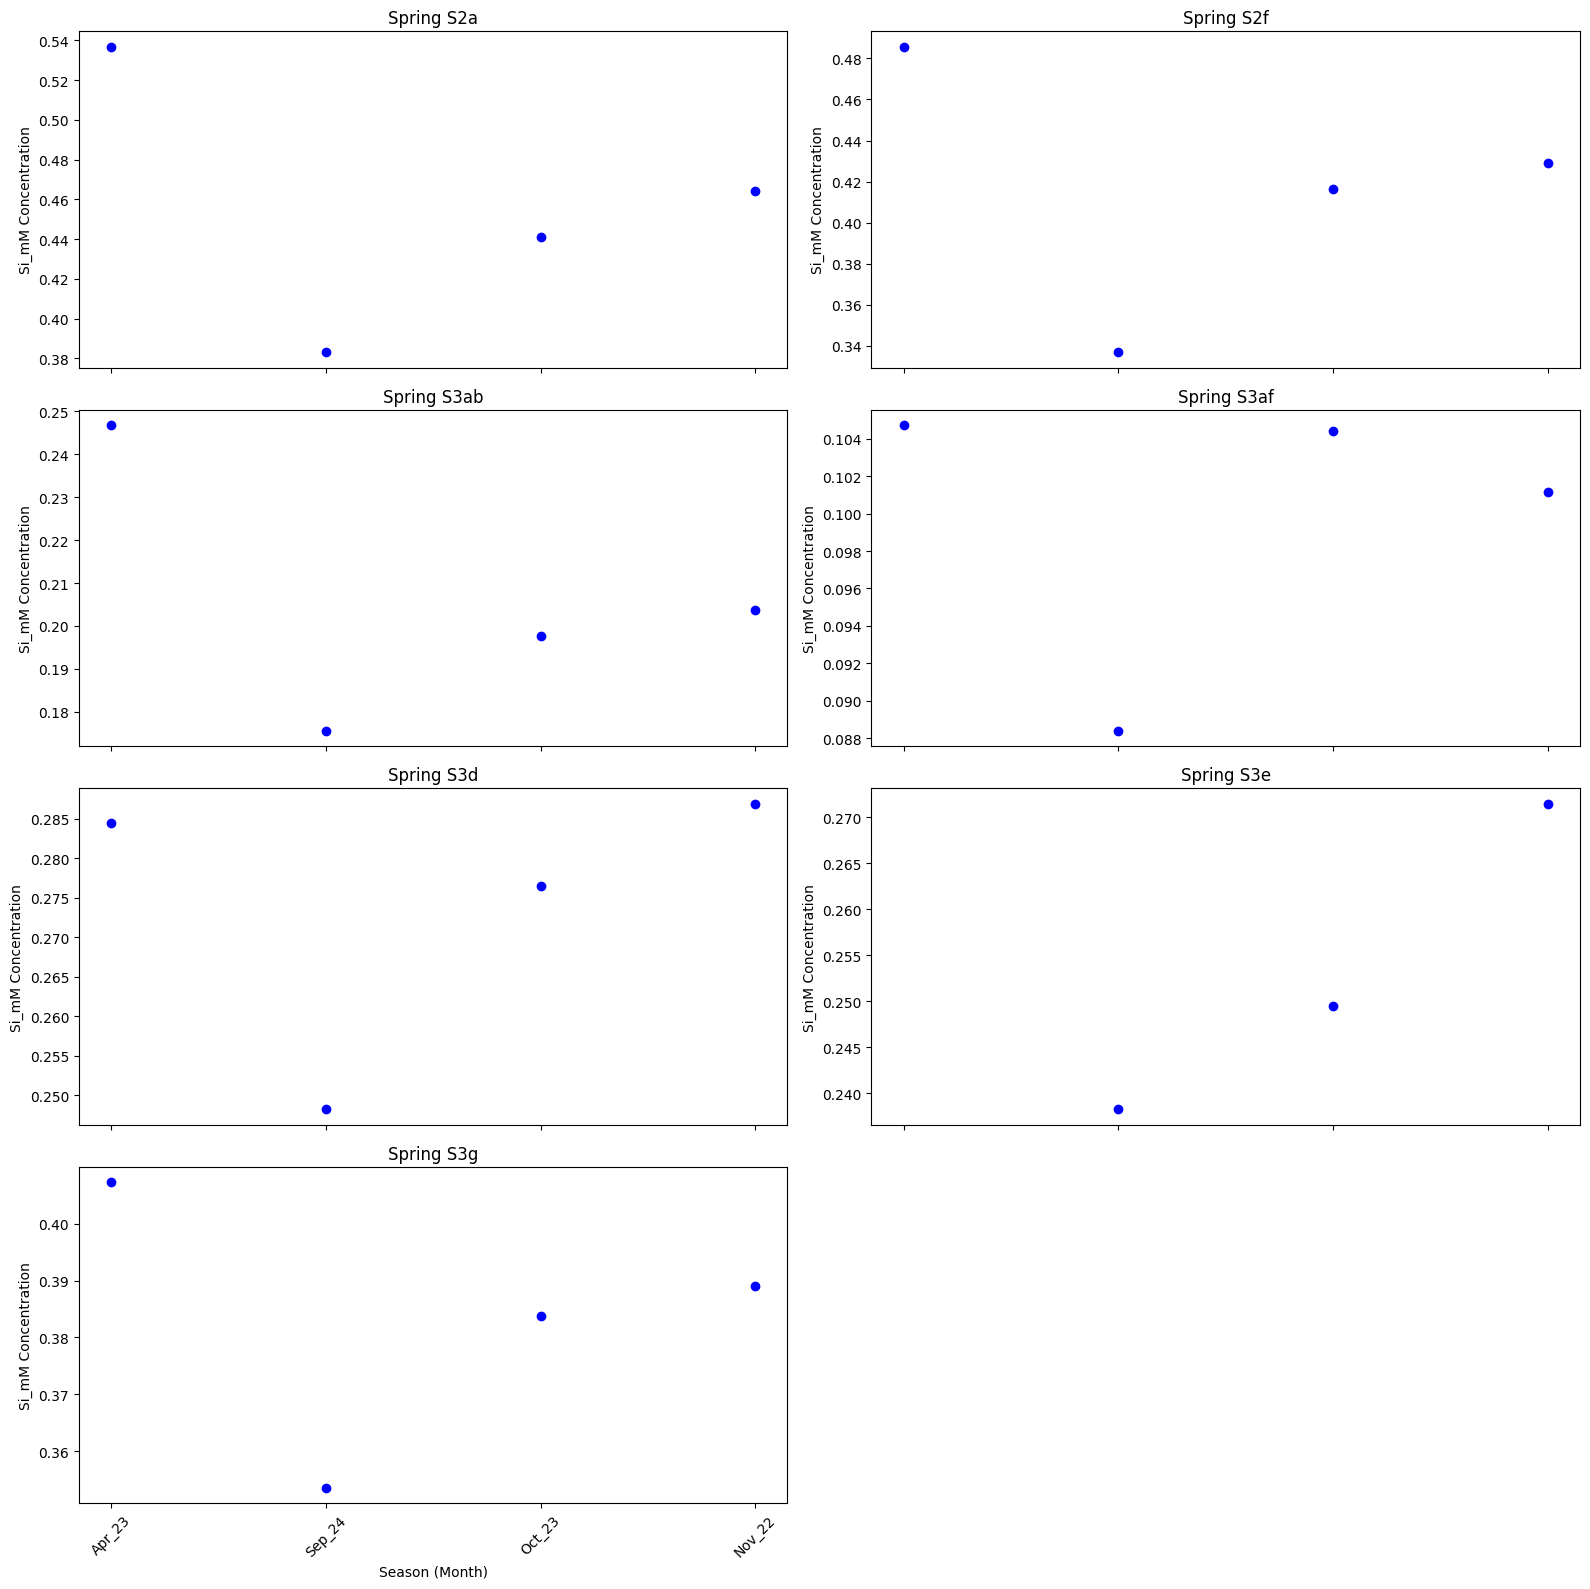

In [12]:
import matplotlib.pyplot as plt
import pandas as pd


# Function to extract the spring ID (prefix before the season number)
def extract_spring_id(gns):
    if not isinstance(gns, str):
        return None
    match = re.match(r"([A-Za-z]+\d+[A-Za-z]*)(\d+)", gns)  # Extract prefix before season numbers
    return match.group(1) if match else None

# Define the correct month order
month_order = ["Apr_23", "Sep_24", "Oct_23", "Nov_22"]

# Define the specific GNS values to include
selected_gns = {"S3g", "S3e", "S3d", "S3af", "S3ab", "S2a", "S2f"}

# Apply the functions to create new columns
df_copy["Spring_ID"] = df_copy["GNS"].apply(extract_spring_id)


# Ensure 'Season' is a string
df_copy["Season"] = df_copy["Season"].astype(str)

# Filter only selected GNS values and exclude 'Nov_18'
df_filtered = df_copy[
    (df_copy["GNS"].str.startswith(tuple(selected_gns))) & (df_copy["Season"] != "Nov_18")
].copy()

# Drop any rows with missing values in 'Season' or 'Si_mM'
df_filtered = df_filtered.dropna(subset=["Season", "Si_mM"])

# Convert 'Season' to categorical with correct ordering
df_filtered["Season"] = pd.Categorical(df_filtered["Season"], categories=month_order, ordered=True)

# Explicitly sort by Season to enforce the correct order
df_filtered = df_filtered.sort_values("Season")

# Check if there are any springs to plot
num_springs = df_filtered["Spring_ID"].nunique()
if num_springs == 0:
    print("No valid data for the selected GNS values.")
else:
    # Set figure size for multiple subplots
    fig, axes = plt.subplots((num_springs + 1) // 2, 2, figsize=(16, 4 * ((num_springs + 1) // 2)), sharex=True)
    axes = axes.flatten()
    if num_springs % 2 != 0:
        fig.delaxes(axes[-1])  # Remove the last empty subplot if odd number of springs

    # If only one spring, wrap axes in a list
    if num_springs == 1:
        axes = [axes]

    # Plot each spring separately
    for ax, (spring_id, group) in zip(axes, df_filtered.groupby("Spring_ID")):
        group = group.sort_values("Season")  # Ensure correct order before plotting

        # Convert 'Season' to numerical positions (index values) for Matplotlib
        x_positions = [month_order.index(season) for season in group["Season"]]

        # Scatter plot with correct x-axis order
        ax.scatter(x_positions, group["Si_mM"], color='b', label=f"Spring {spring_id}")  
        # for i, txt in enumerate(group["Sample ID"]):
        #     ax.annotate(txt, (x_positions[i], group["Si_mM"].iloc[i]), fontsize=8)
        
        ax.set_title(f"Spring {spring_id}")
        ax.set_ylabel("Si_mM Concentration")

        # Manually set x-ticks to enforce correct order
        ax.set_xticks(range(len(month_order)))
        ax.set_xticklabels(month_order, rotation=45)

    # Set common x-axis label
    plt.xlabel("Season (Month)")
    plt.tight_layout()
    
    plt.savefig('Si_mM_concentrations_springs.pdf')
    plt.show()
    
    


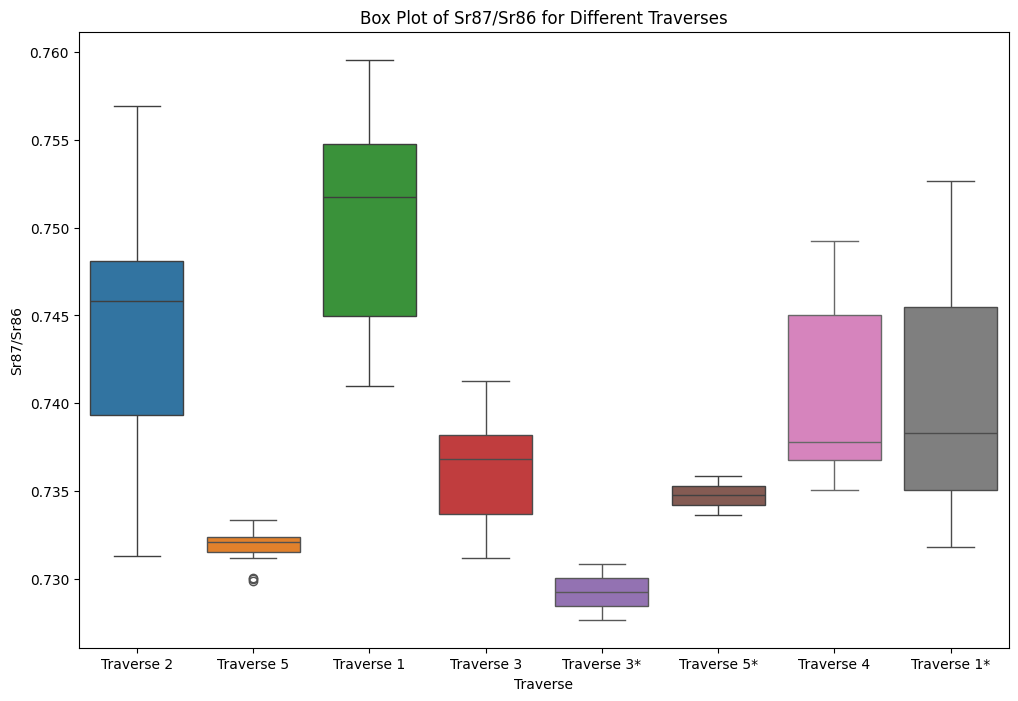

In [13]:
# Plot box plots of Sr87/Sr86 for different traverses
plt.figure(figsize=(12, 8))
# Create boxplot for each traverse
for traverse in df_copy['Traverse'].unique():
    sns.boxplot(x='Traverse', y='Sr87/Sr86', data=df_copy[df_copy['Traverse'] == traverse])

# Add title and labels
plt.title('Box Plot of Sr87/Sr86 for Different Traverses')
plt.xlabel('Traverse')
plt.ylabel('Sr87/Sr86')

# Show plot
plt.show()


In [14]:
#print(df_rain['Traverse'])  
# print Site A, B, C, D, E sample Ids for df_rain
df_rain_siteA = df_rain[df_rain['Traverse'] == 'Site A']
df_rain_siteB = df_rain[df_rain['Traverse'] == 'Site B']
df_rain_siteC = df_rain[df_rain['Traverse'] == 'Site C']
df_rain_siteD = df_rain[df_rain['Traverse'] == 'Site D']
df_rain_siteE = df_rain[df_rain['Traverse'] == 'Site E']

sites = ['Site A', 'Site B', 'Site C', 'Site D', 'Site E']


In [15]:
element_dict = ['Ca', 'Sr', 'Mg', 'Si', 'Na', 'Li', 'K', 'Al', 'Cl']


# Compute site-specific rain averages
site_means = {}
for site in sites:
    site_rain = df_rain[df_rain['Traverse'] == site]
    if not site_rain.empty:  # Only add sites with data
        site_means[site] = {
            'Cl_mM': site_rain['Cl_mM'].mean(),
            **{f'{element}_mM': site_rain[f'{element}_mM'].mean() for element in element_dict}
        }


In [16]:
# Rain Correction
# Equation is for an element X in the river water:
# X_corrected = X_observed - (Cl_river - Cl_river_star) * (X_rain/Cl_rain)
# Where Cl_river_star = Cl_river - Cl_rain
# Cl_river_star = 0 if Cl_river < Cl_rain


# Basic logic:
# Three Sites: C, D, E
# Calculate closest position of sample in df_copy to the site C, D, or E
# Proceed with the rain correction for each element in the sample, using the closest rain site to the sample
# List an element dictionary
# For each element in the dictionary, calculate the corrected value using the equation above
# Make sure to check if Cl_river < Cl_rain, if so, Cl_river_star = 0
# Add the corrected value to a new column in the df_copy dataframe

In [17]:
# Sites C, D, E
sites = ['Site A', 'Site B', 'Site C', 'Site D', 'Site E']

# Convert ppm to mM and store site-specific rain averages
for element in element_dict:
    df_rain[f'{element}_mM'] = df_rain[f'{element}_ppm'] / {'Ca': 40.08, 'Sr': 87.62, 'Mg': 24.31, 'Si': 28.09, 'Na': 22.99, 'Li': 6.94, 'K': 39.10, 'Al': 26.98, 'Cl': 35.453}[element]

# Compute site-specific rain averages
site_means = {}
for site in sites:
    site_rain = df_rain[df_rain['Traverse'] == site]
    if not site_rain.empty:  # Only add sites with data
        site_means[site] = {
            'Cl_mM': site_rain['Cl_mM'].mean(),
            **{f'{element}_mM': site_rain[f'{element}_mM'].mean() for element in element_dict}
        }


# Define function to calculate the closest rain site
def find_closest_site(row, df_rain):
    sample_coords = (row['Latitude'], row['Longitude'])
    df_rain['Distance'] = df_rain.apply(lambda rain_row: geodesic(sample_coords, (rain_row['Latitude'], rain_row['Longitude'])).kilometers, axis=1)
    closest_site = df_rain.loc[df_rain['Distance'].idxmin(), 'Traverse']
    return closest_site

# Add closest site information to df_copy
df_copy['Closest_Site'] = df_copy.apply(find_closest_site, axis=1, df_rain=df_rain)

# Define function to calculate rain correction
def rain_correction(row, site_means, element_dict):
    closest_site = row['Closest_Site']
    if closest_site not in site_means:
        raise ValueError(f"Closest site '{closest_site}' not found in site_means.")

    site_data = site_means[closest_site]
    corrected_values = {}
    for element in element_dict:
        Cl_river = row['Cl_mM']
        Cl_rain = site_data['Cl_mM']
        X_rain = site_data[f'{element}_mM']

        # Calculate Cl_river_star
        Cl_river_star = max(Cl_river - Cl_rain, 0)

        # Calculate X_corrected
        X_corrected = row[f'{element}_mM'] - (Cl_river - Cl_river_star) * (X_rain / Cl_rain)
        corrected_values[f'{element}_mM_*'] = X_corrected

    return pd.Series(corrected_values)


# Apply rain correction
df_corrected = df_copy.apply(rain_correction, axis=1, site_means=site_means, element_dict=element_dict)

# Merge corrected values back into df_copy
df_copy = pd.concat([df_copy, df_corrected], axis=1)

print(df_copy)

     Sample ID    GNS  Season       Date      Time   Sample type  \
33     MKS 10B  S2a19  Nov_18        NaT       NaN  Spring water   
34     MKS 11B    NaN  Nov_18        NaT       NaN  Spring water   
35     MKS 15B  S4d19  Nov_18        NaT       NaN  Spring water   
36     MKS 18B  S4k19  Nov_18        NaT       NaN  Spring water   
37      MKS 1B  S1m19  Nov_18        NaT       NaN  Spring water   
..         ...    ...     ...        ...       ...           ...   
288  NEP24-064  S2g24  Sep_24 2024-09-16  12:31:54        Spring   
289  NEP24-065  S2f24  Sep_24 2024-09-16  13:26:04        Spring   
290  NEP24-066  S2e24  Sep_24 2024-09-16  14:08:27        Spring   
291  NEP24-067  S2c24  Sep_24 2024-09-16  15:00:54        Spring   
292  NEP24-068  S2a24  Sep_24 2024-09-16  15:34:44        Spring   

    Repeat_collection                                       Site_details  \
33                NaN                                          Abra-2019   
34                NaN          

In [18]:
# Order samples by Cl_mM_* in descending order
ordered_samples = df_copy.sort_values('Cl_mM_*', ascending=False)

# Find a valid sample where all required X/Cl ratios can be computed
X_Cl_ratios = {}
for _, sample in ordered_samples.iterrows():
    is_valid = True
    ratios = {}
    for element in element_dict:
        # Check for valid Cl and element_mM_* values
        if sample['Cl_mM_*'] > 0 and not pd.isna(sample[f'{element}_mM_*']):
            ratios[element] = sample[f'{element}_mM_*'] / sample['Cl_mM_*']
        else:
            is_valid = False
            break  # If any value is invalid, skip this sample
    
    if is_valid:
        X_Cl_ratios = ratios
        break  # Stop as soon as a valid sample is found

# If no valid sample is found, raise an error or handle it gracefully
if not X_Cl_ratios:
    raise ValueError("No valid sample found for X/Cl ratio calculation.")

print("X/Cl Ratios:", X_Cl_ratios)

# Define the new correction function
def evaporite_correction(row, element_dict, X_Cl_ratios):
    evaporite_corrected_values = {}
    for element in element_dict:
        # Perform the evaporite correction
        X_corrected = row[f'{element}_mM_*']
        Cl_corrected = row['Cl_mM_*']
        X_evaporite_corrected = X_corrected - (X_Cl_ratios[element] * Cl_corrected)
        evaporite_corrected_values[f'{element}_mM_EC'] = X_evaporite_corrected

    return pd.Series(evaporite_corrected_values)

# Apply the evaporite correction
df_evaporite_corrected = df_copy.apply(evaporite_correction, axis=1, element_dict=element_dict, X_Cl_ratios=X_Cl_ratios)

# Merge evaporite-corrected values back into df_copy
df_copy = pd.concat([df_copy, df_evaporite_corrected], axis=1)


X/Cl Ratios: {'Ca': 0.41735569444323306, 'Sr': 0.0015173814010333803, 'Mg': 0.2918610003523339, 'Si': 0.7021082530031759, 'Na': 0.6975619929339737, 'Li': 4.148506057103098e-05, 'K': 0.1447739947492531, 'Al': 0.0001898854392169677, 'Cl': 1.0}


In [19]:
print(df_copy.columns)

Index(['Sample ID', 'GNS', 'Season', 'Date', 'Time', 'Sample type',
       'Repeat_collection', 'Site_details', 'Traverse', 'Traverse_new',
       ...
       'Cl_mM_*', 'Ca_mM_EC', 'Sr_mM_EC', 'Mg_mM_EC', 'Si_mM_EC', 'Na_mM_EC',
       'Li_mM_EC', 'K_mM_EC', 'Al_mM_EC', 'Cl_mM_EC'],
      dtype='object', length=106)


In [20]:
# set negative values in df_copy of the elements _mM_EC to NaN
df_copy.loc[df_copy['Ca_mM_EC'] < 0, 'Ca_mM_EC'] = np.nan
df_copy.loc[df_copy['Sr_mM_EC'] < 0, 'Sr_mM_EC'] = np.nan
df_copy.loc[df_copy['Mg_mM_EC'] < 0, 'Mg_mM_EC'] = np.nan
df_copy.loc[df_copy['Si_mM_EC'] < 0, 'Si_mM_EC'] = np.nan
df_copy.loc[df_copy['Na_mM_EC'] < 0, 'Na_mM_EC'] = np.nan
df_copy.loc[df_copy['Li_mM_EC'] < 0, 'Li_mM_EC'] = np.nan
df_copy.loc[df_copy['K_mM_EC'] < 0, 'K_mM_EC'] = np.nan
df_copy.loc[df_copy['Al_mM_EC'] < 0, 'Al_mM_EC'] = np.nan
df_copy.loc[df_copy['Cl_mM_EC'] < 0, 'Cl_mM_EC'] = np.nan



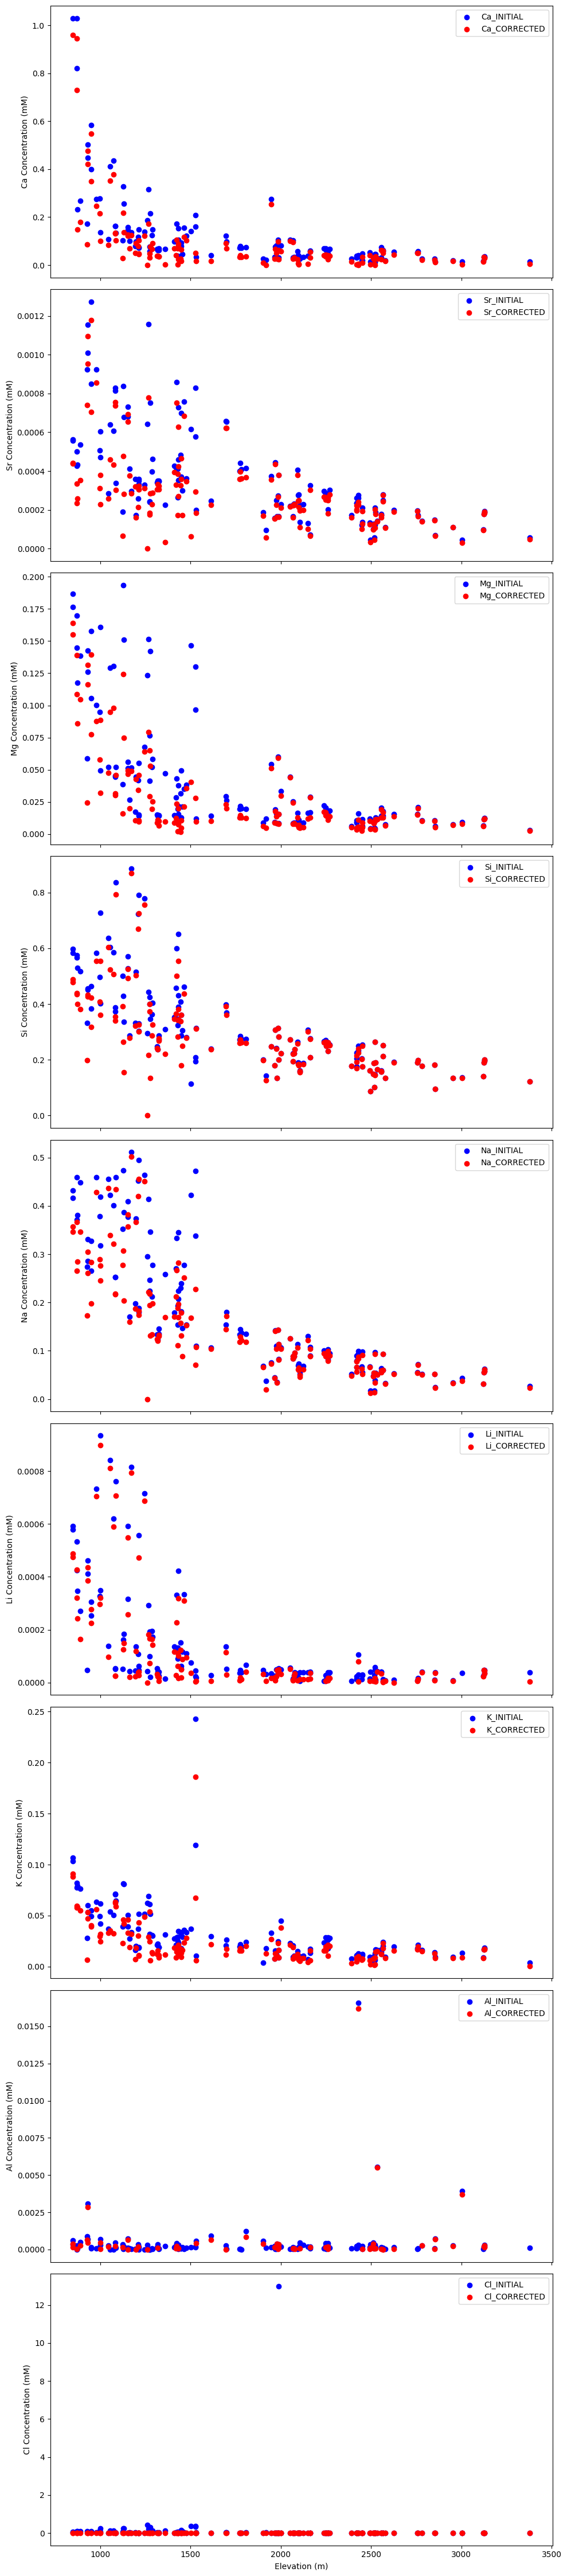

In [21]:

# Filter the DataFrame to include only rows where 'Cl_mM' is not NaN
df_copy = df_copy[df_copy['Cl_molar'].notna()]

# Create a figure and axes for the plots
fig, axs = plt.subplots(len(element_dict), 1, figsize=(10, len(element_dict) * 5), sharex=True)

# Loop through each element and create a scatter plot
for i, element in enumerate(element_dict):
    ax = axs[i]
    ax.scatter(df_copy['Elevation'], df_copy[f'{element}_mM'], label=f'{element}_INITIAL', color='blue')
    ax.scatter(df_copy['Elevation'], df_copy[f'{element}_mM_EC'], label=f'{element}_CORRECTED', color='red')
    ax.set_ylabel(f'{element} Concentration (mM)')
    ax.legend()

# Set the x-axis label for the last subplot
axs[-1].set_xlabel('Elevation (m)')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
plt.close()

df_copy.to_excel('/Users/enrico/Desktop/Part III Project/Code/Nepal-1/Datasets/model4_full.xlsx')

In [22]:
# save df_copy to a new excel file
#df_copy.to_excel('Corrected_Spring_Data.xlsx', index=False)

In [23]:

season_colors = {
    'Nov_22': 'blue',
    'Apr_23': 'green',
    'Oct_23': 'red',
    'Sep_24': 'purple'
}

traverse_markers = {
    'Traverse 1': 's',  # Square
    'Traverse 2': 'v',  # Triangle
    'Traverse 3': '*',  # Star
    'Traverse 3*' : '*',  # Star
    'Traverse 4': 'o',   # Circle
    'Traverse 5': 'D',   # Diamond
    'Traverse 5*': 'D'   # Diamond
}

# Define custom colors for traverses
custom_colors = {
    'Traverse 1': '#A385CA',  # Add '#' prefix
    'Traverse 2': '#FDD37E',  
    'Traverse 3': '#9FADDA',  
    'Traverse 3*': '#9FADDA',  
    'Traverse 4': '#1A5AA0',  
    'Traverse 5': '#01316B',  
    'Traverse 5*': '#01316B'  
}

site_markers = {
    'Site A': 'o',  
    'Site B': 'v',
    'Site C': '*',
    'Site D': 's',
    'Site E': 'D',
    'Site F': 'X',
}


tributaries = ['Traverse 1', 'Traverse 2', 'Traverse 3', 'Traverse 3*', 'Traverse 4', 'Traverse 5', 'Traverse 5*']


GNS_markers = {
    'S1': 'o',  
    'S2': 'o',  
    'S3': 'o',  
    'S4': 'o'   
}







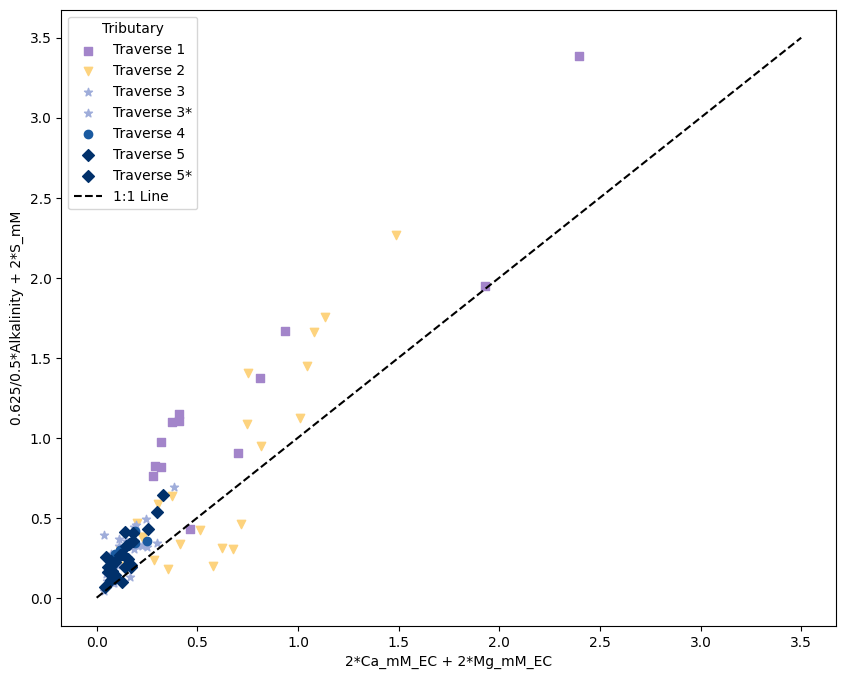

In [24]:
# plot 2*Ca_mM_EC + 2*Mg_mM_EC vs (0.625/0.5) * Alkalinity + 2*S_mM

df_copy['S_mM'] = df_copy['S_ppm'] / 32.06

# Calculate the required values
df_copy['2*Ca_mM'] = df_copy['Ca_mM'] * 2
df_copy['2*Mg_mM'] = df_copy['Mg_mM'] * 2
df_copy['0.625/0.5*Alkalinity'] = df_copy['Alkalinity'] * 0.625 / 0.5 / 1000
df_copy['2*S_mM'] = df_copy['S_mM'] * 2

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the data

for traverse in tributaries:
    ax.scatter(df_copy[df_copy['Traverse'] == traverse]['2*Ca_mM'] + df_copy[df_copy['Traverse'] == traverse]['2*Mg_mM'],
               df_copy[df_copy['Traverse'] == traverse]['0.625/0.5*Alkalinity'] + df_copy[df_copy['Traverse'] == traverse]['2*S_mM'],
               label=traverse,
               color=custom_colors[traverse],
               marker=traverse_markers[traverse])


# Add a 1:1 line between 0,0 and 3.5,3.5
ax.plot([0, 3.5], [0, 3.5], color='black', linestyle='--', label='1:1 Line')


# Add labels and legend
ax.set_xlabel('2*Ca_mM_EC + 2*Mg_mM_EC')
ax.set_ylabel('0.625/0.5*Alkalinity + 2*S_mM')
ax.legend(title='Tributary')

# Display the plot
plt.show()

# Just shows not much carbonate precipitation as the parameters are not very charge balanced

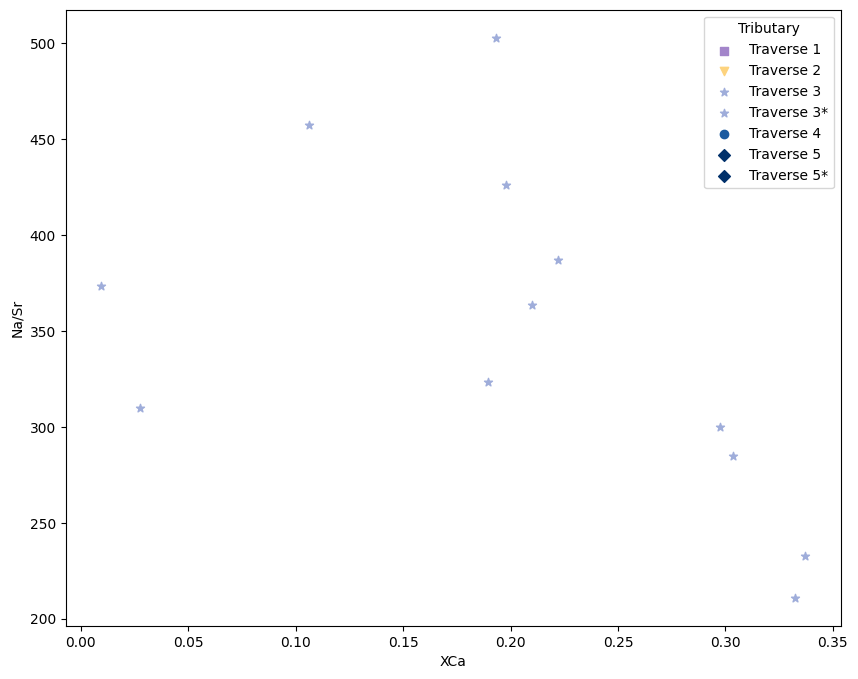

In [25]:
# plot Na/Sr against XCa = Ca/sum of cations

df_copy['Na/Sr_EC'] = df_copy['Na_mM_EC'] / df_copy['Sr_mM_EC']

df_copy['XCa'] = df_copy['Ca_mM_EC'] / (df_copy['Ca_mM_EC'] + df_copy['Mg_mM_EC'] + df_copy['Na_mM_EC'] + df_copy['K_mM_EC'] + df_copy['Li_mM_EC'] + df_copy['Al_mM_EC'] + df_copy['Sr_mM_EC'])


plt.figure(figsize=(10, 8))

#df_filtered for Traverse 3
df_filtered = df_copy[df_copy['Traverse'] == 'Traverse 3']

for traverse in tributaries:
    plt.scatter(df_filtered[df_filtered['Traverse'] == traverse]['XCa'],
                df_filtered[df_filtered['Traverse'] == traverse]['Na/Sr_EC'],
                label=traverse,
                color=custom_colors[traverse],
                marker=traverse_markers[traverse])
    
plt.xlabel('XCa')
plt.ylabel('Na/Sr')
plt.legend(title='Tributary')
plt.show()
    
    

# Making the DEM


In [26]:
## ADDING DEM DATA TO THE PLOT
    
dem_path = '/Users/enrico/Desktop/Part III Project/DEM/AP_23217_PLR_F0550_RT1/AP_23217_PLR_F0550_RT1.dem.tif'

    
# Define UTM bounds for Nepal DEM
min_x, min_y, max_x, max_y = 346873.46875, 3078339.0, 362335.96875, 3115539.0


# Define UTM bounds for Nepal DEM
# Set CRS WKT strings
utm_45n_wkt = 'PROJCS["WGS 84 / UTM zone 45N",GEOGCS["WGS 84",DATUM["WGS_1984",' \
            'SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],' \
            'AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],' \
            'UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],' \
            'PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],' \
            'PARAMETER["central_meridian",87],PARAMETER["scale_factor",0.9996],' \
            'PARAMETER["false_easting",500000],PARAMETER["false_northing",0],' \
            'UNIT["metre",1,AUTHORITY["EPSG","9001"]],AUTHORITY["EPSG","32645"]]'

wgs84_wkt = 'GEOGCS["WGS 84",DATUM["WGS_1984",' \
            'SPHEROID["WGS 84",6378137,298.257223563],' \
            'AUTHORITY["EPSG","6326"]],' \
            'PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],' \
            'AUTHORITY["EPSG","4326"]]'

In [27]:
# Open the DEM file and set CRS to UTM Zone 45N if undefined
with rasterio.open(dem_path) as dem_raster:
    src_crs = rasterio.crs.CRS.from_wkt(utm_45n_wkt)  # Using WKT for UTM Zone 45N
    dst_crs = rasterio.crs.CRS.from_wkt(wgs84_wkt)    # Using WKT for WGS84

    # Create a Shapely box with UTM bounds
    dem_box = box(min_x, min_y, max_x, max_y)

    # Mask DEM data to these bounds
    out_image, out_transform = mask(dem_raster, [dem_box], crop=True)
    clipped_dem_array = out_image[0]

    # Calculate transform and reproject to WGS84
    dst_transform, width, height = calculate_default_transform(
        src_crs, dst_crs, clipped_dem_array.shape[1], clipped_dem_array.shape[0], *[min_x, min_y, max_x, max_y]
    )

    dst_array = np.zeros((height, width), dtype=np.float32)
    reproject(
        source=clipped_dem_array,
        destination=dst_array,
        src_transform=out_transform,
        src_crs=src_crs,
        dst_transform=dst_transform,
        dst_crs=dst_crs,
        resampling=Resampling.bilinear
    )

    dst_array[dst_array < 0] = np.nan  # Filter out elevation values below 0

# Define bounds in WGS84 (latitude/longitude) for plotting
bounds = (
    dst_transform.c,  # min longitude
    dst_transform.f + dst_transform.e * height,  # min latitude
    dst_transform.c + dst_transform.a * width,  # max longitude
    dst_transform.f  # max latitude
)


In [28]:
# Generate the x and y coordinates in WGS84
x = np.linspace(bounds[0], bounds[2], dst_array.shape[1])
y = np.linspace(bounds[1], bounds[3], dst_array.shape[0])
x, y = np.meshgrid(x, y)
z = dst_array

# Interpolator for DEM elevations
interpolator = RegularGridInterpolator((y[:, 0], x[0, :]), z, bounds_error=False, fill_value=np.nan)

# Ensure the DataFrame coordinates are in the same CRS as the DEM
df_lons = df_copy['Longitude'].values
df_lats = df_copy['Latitude'].values

# Load the shapefile
shapefile_path1 = "/Users/enrico/Desktop/Part III Project/DEM/Clipped_Shp_Melamchi.shp"
gdf = gpd.read_file(shapefile_path1)



In [29]:
######### IMPORTING DATA FOR GEOLOGY OVERLAY #########

# Load the shapefile
shapefile_path2 = "/Users/enrico/Desktop/Part III Project/QGIS during Fieldwork/geometry5.shp"
gdf2 = gpd.read_file(shapefile_path2)

    

In [30]:
#For Shapefile
    # Define color mapping based on ID
id_to_color = {
    0: 'Blue',
    1: 'Green',
    2: 'Yellow',
    3: 'Orange',
    5: 'Purple',
    }

id_to_label = {
    0: 'Talamarang Formation',
    1: 'Gyalthum Formation',
    2: 'Bolde Quartzite',
    3: 'Timbung Formation',
    5: 'Golphu Formation',
    }

In [31]:
season_colors = {
    'Nov_22': 'blue',
    'Apr_23': 'green',
    'Oct_23': 'red',
    'Sep_24': 'purple'
}

traverse_markers = {
    'Traverse 1': 's',  # Square
    'Traverse 2': 'v',  # Triangle
    'Traverse 3': '*',  # Star
    'Traverse 3*' : '*',  # Star
    'Traverse 4': 'o',   # Circle
    'Traverse 5': 'D',   # Diamond
    'Traverse 5*': 'D'   # Diamond
}


tributaries = ['Traverse 1', 'Traverse 2', 'Traverse 3', 'Traverse 3*', 'Traverse 4', 'Traverse 5', 'Traverse 5*']


GNS_markers = {
    'S1': 'o',  
    'S2': 'o',  
    'S3': 'o',  
    'S4': 'o'   
}





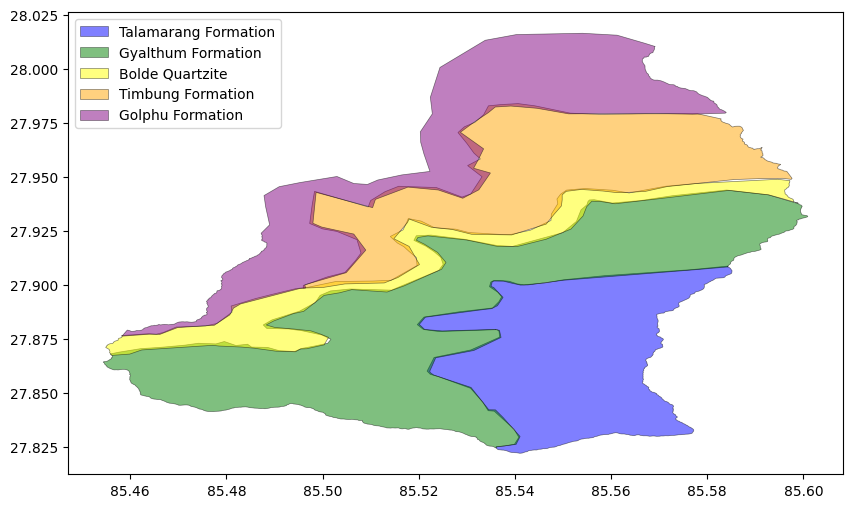

In [32]:
# Define the desired CRS, for example, "EPSG:4326" for WGS 84 or any other projection you need.
desired_crs = "EPSG:4326"

# Reproject the GeoDataFrame to the desired CRS
gdf2 = gdf2.to_crs(desired_crs)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the overlay shapefile with specified colors and labels
plotted_labels = set()  # Keeps track of which labels have been plotted
for geom, id_value in zip(gdf2.geometry, gdf2['id']):
    color = id_to_color.get(id_value, 'grey')  # Default to grey if ID is not in the mapping
    label = id_to_label.get(id_value, '')
    
    if isinstance(geom, Polygon):  # Check if geometry is a Polygon
        x_poly, y_poly = geom.exterior.xy  # Get exterior coordinates
        if label not in plotted_labels:
            ax.fill(x_poly, y_poly, color=color, alpha=0.5, edgecolor='black', linewidth=0.5, label=label)
            plotted_labels.add(label)
        else:
            ax.fill(x_poly, y_poly, color=color, alpha=0.5, edgecolor='black', linewidth=0.5)
    
    elif isinstance(geom, MultiPolygon):  # Check if geometry is a MultiPolygon
        for part in geom.geoms:  # Iterate over constituent polygons
            x_poly, y_poly = part.exterior.xy
            if label not in plotted_labels:
                ax.fill(x_poly, y_poly, color=color, alpha=0.5, edgecolor='black', linewidth=0.5, label=label)
                plotted_labels.add(label)
            else:
                ax.fill(x_poly, y_poly, color=color, alpha=0.5, edgecolor='black', linewidth=0.5)

# Add legend, title, etc., as needed
ax.legend()
plt.show()


# One Traverse Plot

/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_44301/2301712198.py:58: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter(
/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_44301/2301712198.py:58: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter(
/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_44301/2301712198.py:58: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter(
/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_44301/2301712198.py:58: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter(
/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_44301/2301712198.py:58: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter(
/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_4

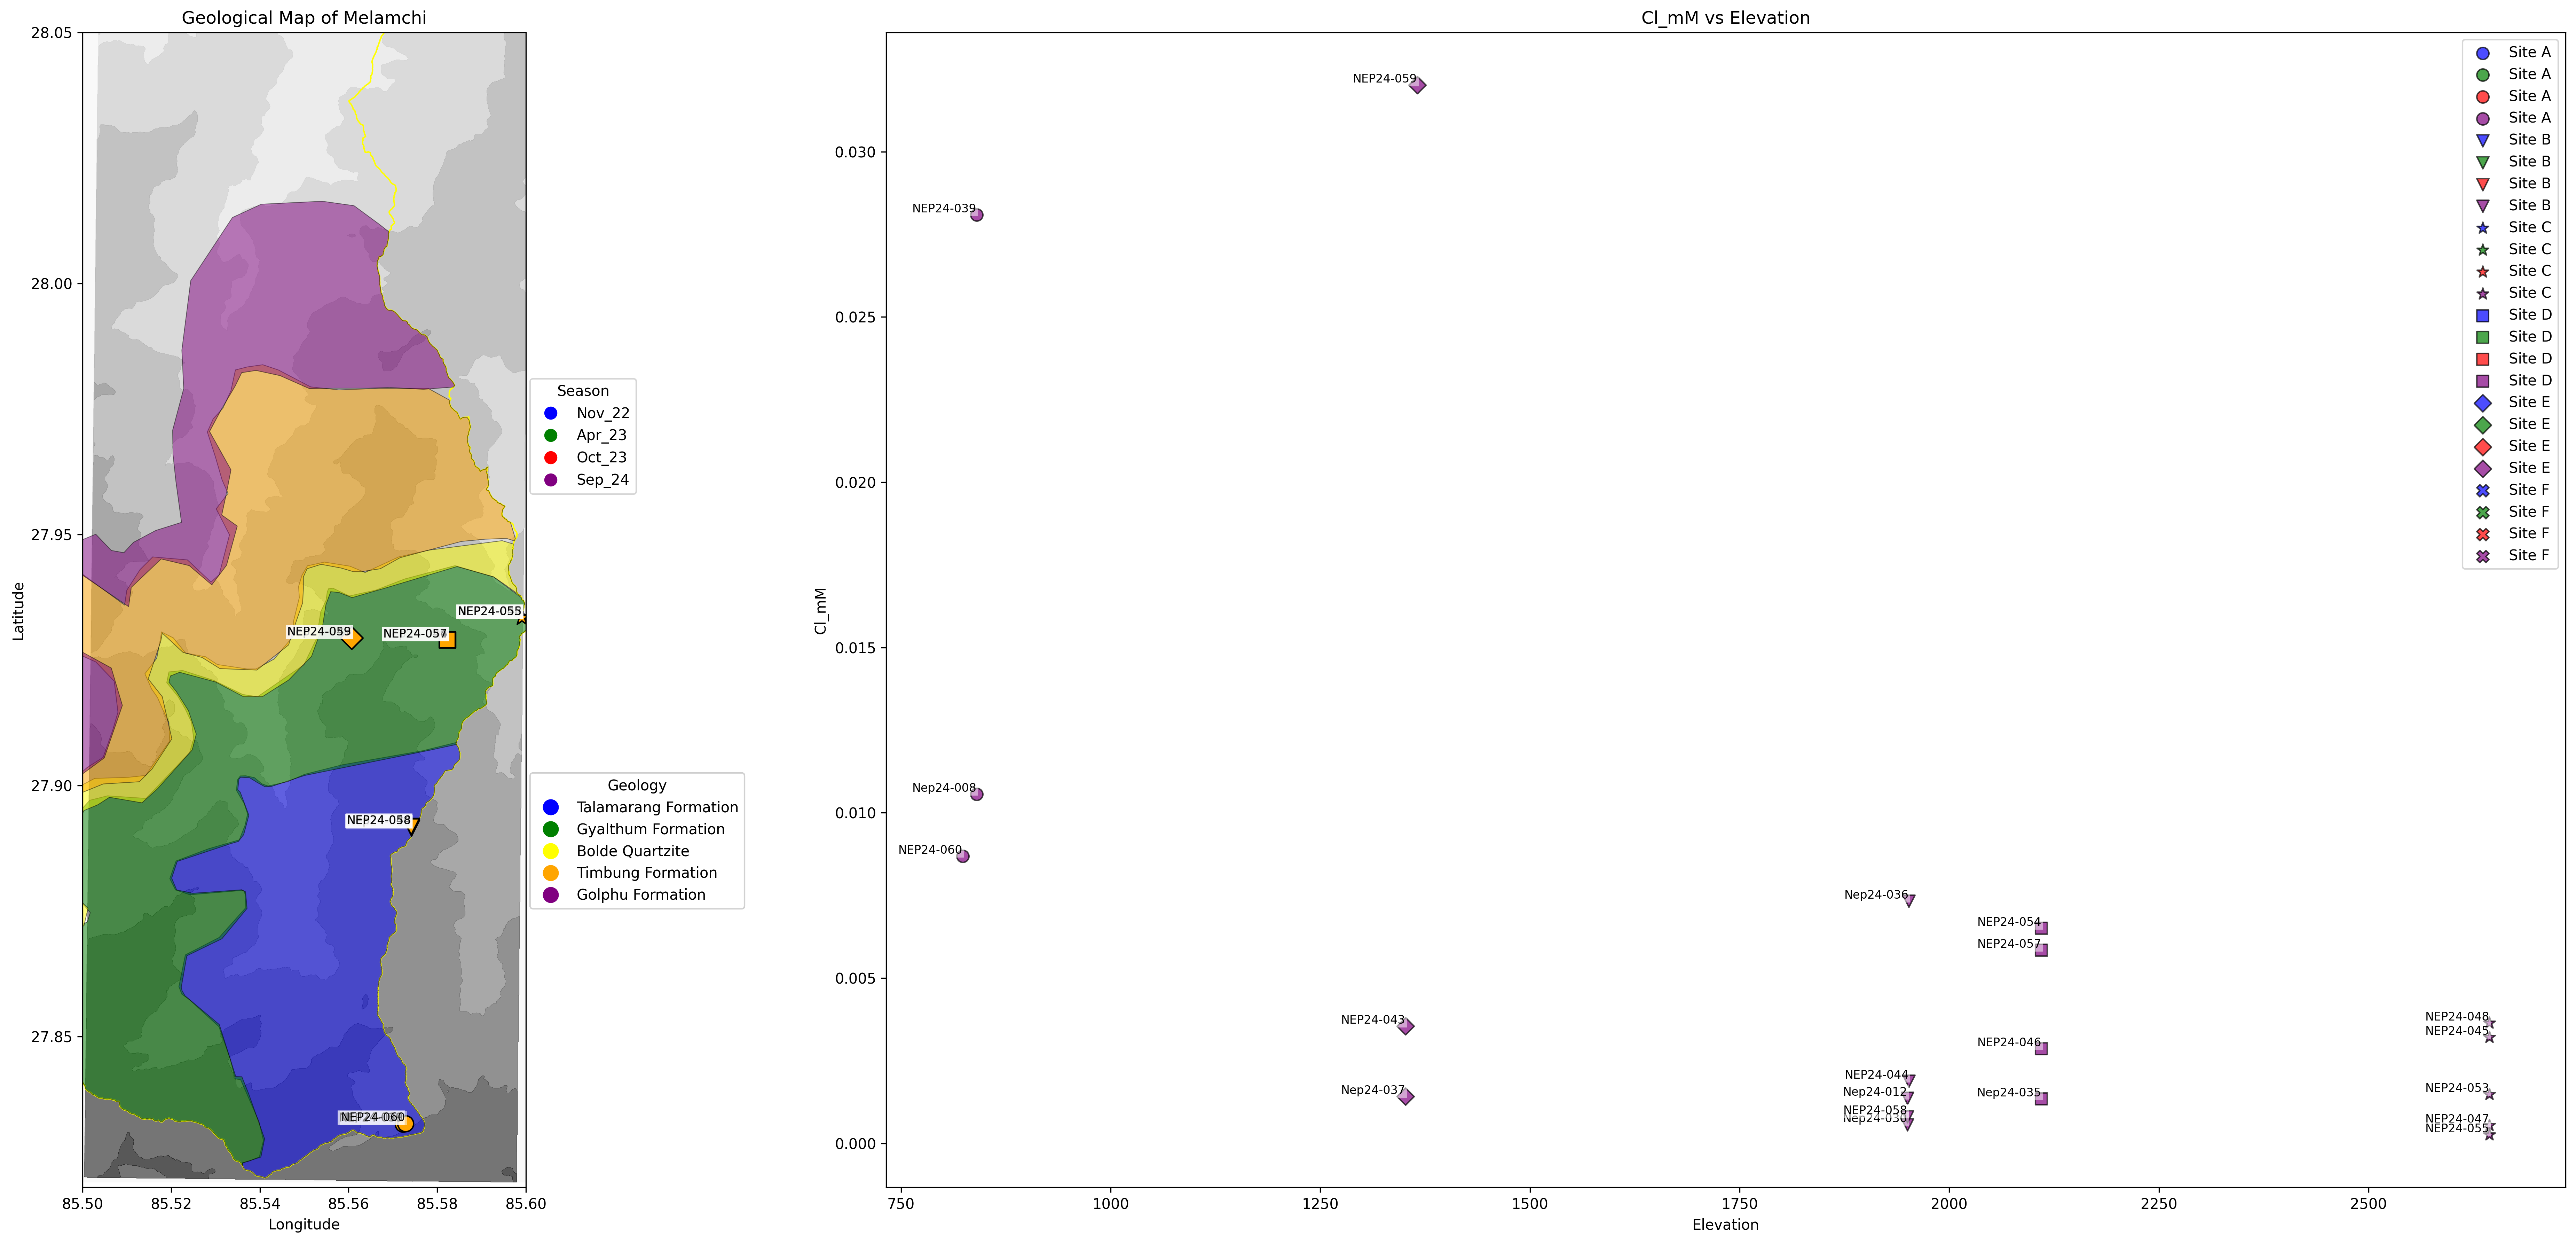

In [33]:

# Create the figure and axes for side-by-side plots
fig, axs = plt.subplots(1, 2, figsize=(30, 12), dpi = 300)

# Define the variables and traverses
variables = ['Cl_mM', 'Elevation']
tributaries = ['Traverse 1', 'Traverse 2', 'Traverse 3', 'Traverse 3*', 'Traverse 4', 'Traverse 5', 'Traverse 5*']

GNS_markers = ['S1', 'S2', 'S3', 'S4']



ax1 = axs[0]
ax2 = axs[1]



# Plot the DEM data in grayscale on ax1
c = ax1.contourf(x, y, z, cmap='Greys', alpha=0.7)


# Overlay the shapefile for watershed boundary
gdf.plot(ax=ax1, facecolor='none', edgecolor='yellow', alpha=1, linewidth=1, label='Melamchi Watershed')

# Overlay gdf2 on ax1 with specified colors and labels
plotted_labels = set()  # Keeps track of which labels have been plotted
geology_handles = []  # Handles for individual geology legend next to ax1
for geom, id_value in zip(gdf2.geometry, gdf2['id']):
    color = id_to_color.get(id_value, 'grey')  # Default to grey if ID is not in the mapping
    label = id_to_label.get(id_value, '')
    
    if isinstance(geom, Polygon):
        x_poly, y_poly = geom.exterior.xy
        ax1.fill(x_poly, y_poly, color=color, alpha=0.5, edgecolor='black', linewidth=0.5)
        if label not in plotted_labels:
            plotted_labels.add(label)
            geology_handles.append(Line2D([0], [0], marker='o', color=color, markersize=10, linestyle='None', label=label))
    elif isinstance(geom, MultiPolygon):
        for part in geom.geoms:
            x_poly, y_poly = part.exterior.xy
            ax1.fill(x_poly, y_poly, color=color, alpha=0.5, edgecolor='black', linewidth=0.5)
            if label not in plotted_labels:
                plotted_labels.add(label)
                geology_handles.append(Line2D([0], [0], marker='o', color=color, markersize=10, linestyle='None', label=label))

cl_min = df_rain[variables[0]].min()
cl_max = df_rain[variables[0]].max()

#filter so that df_copy only contains Sample IDs that start with NEP22:
df_filtered = df_rain.dropna(subset=['Traverse'])

#print(df_filtered['Traverse'])
#df_filtered = df_filtered[df_filtered['Traverse'].str.startswith('Traverse 3')]



for site, marker in site_markers.items():
    site_data = df_filtered[df_filtered['Traverse'] == site]
    ax1.scatter(
        site_data['Longitude'], site_data['Latitude'], s=120, cmap='viridis', alpha=1, 
        edgecolor='k', marker=marker, label=f'{site} - Nep24', color='orange'
    )
    
    # # Add SampleID labels
    for i, row in site_data.iterrows():
        ax1.text(row['Longitude'], row['Latitude'], row['Sample ID'], fontsize=8, ha='right', va='bottom', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1))
    
# #plot abra samples as red rectangles
# ax1.scatter(df_abra['Longitude'], df_abra['Latitude'], color='red', s=200, alpha=1, edgecolor='k', marker='s', label='Abra Samples')        

# for i, row in df_abra.iterrows():
#     ax1.text(row['Longitude'], row['Latitude'], row['Sample ID'], fontsize=8, ha='right', va='bottom', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1))


        
        
# Add a colorbar to ax1 using the scatter plot variable `c`
#cbar = plt.colorbar(c, ax=ax1, location='right', pad=0.2)


# Create a legend for the seasons in ax1
season_handles = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=season) 
    for season, color in season_colors.items()
]

# # Set map limits for ax1
ax1.set_xlim(85.5, 85.6)
ax1.set_ylim(27.82, 28.05)

# ax1.set_xlim(85.54, 85.60)
# ax1.set_ylim(27.90, 27.95)


kyul_data = pd.DataFrame({
    'Latitude': [27.932942],
    'Longitude': [85.563408],
    'Label': ['KYUL']
})



thalo_data = pd.DataFrame({
    'Latitude': [27.928879],
    'Longitude': [85.585605],
    'Label': ['THALO']
})

# ax1.scatter(
#     kyul_data['Longitude'], kyul_data['Latitude'],
#     color='red', s=200, alpha=1, edgecolor='k', marker='o', label=kyul_data['Label'][0]
# )

# ax1.scatter(
#     thalo_data['Longitude'], thalo_data['Latitude'],
#     color='blue', s=200, alpha=1, edgecolor='k', marker='o', label=thalo_data['Label'][0]
# )

# BK sampling site: 27.871276N, 85.542173E
bk_data = pd.DataFrame({
    'Latitude': [27.871276],
    'Longitude': [85.542173],
    'Label': ['BK']
})

# ax1.scatter(
#     bk_data['Longitude'], bk_data['Latitude'],
#     color='green', s=200, alpha=1, edgecolor='k', marker='o', label=bk_data['Label'][0]
# )


# Labels and title for ax1
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
#ax1.set_title(f'DEM Map with {variables[1]} Samples for {traverse}')
ax1.set_title('Geological Map of Melamchi')
season_legend = ax1.legend(handles=season_handles, title='Season', loc='upper left', bbox_to_anchor=(1.01, 0.7),
    borderaxespad=0.)

# Place the geology legend to the right of ax1
geology_legend = ax1.legend(
    handles=geology_handles, 
    title='Geology', 
    loc='center left', 
    bbox_to_anchor=(1.01, 0.3),
    borderaxespad=0.
)

# Add both legends to the plot
ax1.add_artist(geology_legend)
ax1.add_artist(season_legend)

for site, marker in site_markers.items():
    
    site_data = df_filtered[df_filtered['Traverse'] == site]

    for season, color in season_colors.items():
        season_data = site_data[site_data['Season'] == season]
        ax2.scatter(
            season_data[variables[1]], season_data[variables[0]], 
            c=color, s=70, alpha=0.7, edgecolor='k', 
            marker=marker, label=site
        )
        for i, row in season_data.iterrows():
             ax2.text(row[variables[1]], row[variables[0]], row['Sample ID'], fontsize=8, ha='right', va='bottom', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1))


ax2.set_xlabel(f'{variables[1]}')
ax2.set_ylabel(f'{variables[0]}')
#ax2.set_xscale('log')
ax2.set_title(f'{variables[0]} vs {variables[1]}')
ax2.legend()


# Adjust layout and save    
plt.tight_layout()
plt.savefig('Cl_correct.pdf', bbox_inches='tight')
plt.show()
plt.close(fig)

In [34]:
# create a special df with only sites C,D,E on rain_df traverses
df_rain_copy = df_rain.copy()


df_rain_copy = df_rain_copy[df_rain_copy['Traverse'].isin(['Site C', 'Site D', 'Site E'])]

# Filter to remove NEP24-059
df_rain_copy = df_rain_copy[df_rain_copy['Sample ID'] != 'NEP24-059']

In [35]:
df_rain_copy


Sample ID  GNS  Season       Date      Time Sample type  \
259  Nep24-035  NaN  Sep_24 2024-09-10  11:30:48        Rain   
261  Nep24-037  NaN  Sep_24 2024-09-10  15:18:10        Rain   
267  NEP24-043  NaN  Sep_24 2024-09-12  10:53:50        Rain   
269  NEP24-045  NaN  Sep_24 2024-09-12  14:30:45        Rain   
270  NEP24-046  NaN  Sep_24 2024-09-12  14:46:37        Rain   
271  NEP24-047  NaN  Sep_24 2024-09-12  15:05:07        Rain   
272  NEP24-048  NaN  Sep_24 2024-09-12  16:20:26        Rain   
277  NEP24-053  NaN  Sep_24 2024-09-14  09:30:58        Rain   
278  NEP24-054  NaN  Sep_24 2024-09-14  15:30:59        Rain   
279  NEP24-055  NaN  Sep_24 2024-09-14  17:15:59        Rain   
281  NEP24-057  NaN  Sep_24 2024-09-15  08:28:39        Rain   

    Repeat_collection                                       Site_details  \
259               NaN                                               Rain   
261               NaN  Rain, sample sitting there 4 nights, very hot....   
267               NaN  Kyul rain sample, bottles A & B (comp), 2 nigh...   
269               NaN  2 night’s rain at eco lodge. Bottles A&B, no c...   
270               NaN                 12/9 2 nights of rain, two bottles   
271               NaN    30min rain event, Samples A&B, no contamination   
272               NaN                                     1hr rain event   
277               NaN  Rain sample averaged over 2 nights (of light r...   
278               NaN               2 bottles combined, 2 nights of rain   
279               NaN                                                NaN   
281               NaN  Two 3/4 full bottles from 1 night of rain. Rai...   

    Traverse Traverse_new  ...      K_mM     Al_mM     Li_uM     Sr_mM  \
259   Site D       Site D  ...  0.001486  0.000259  0.032421  0.000024   
261   Site E       Site E  ...  0.010086  0.000266  0.025072  0.000011   
267   Site E       Site E  ...  0.004643  0.000104  0.012968  0.000012   
269   Site C       Site C  ...  0.001202  0.000068  0.026513  0.000008   
270   Site D       Site D  ...  0.001851  0.000473  0.027522  0.000018   
271   Site C       Site C  ...  0.004850  0.000387  0.049568  0.000010   
272   Site C       Site C  ...  0.005441  0.000169  0.038617  0.000010   
277   Site C       Site C  ...  0.002528  0.000259  0.032277  0.000010   
278   Site D       Site D  ...  0.002132  0.000568  0.025648  0.000025   
279   Site C       Site C  ...  0.007475  0.000223  0.062968  0.000016   
281   Site D       Site D  ...  0.001023  0.000242  0.018588  0.000015   

        Cl_mM      Ca/Na     Mg/Na        Ca/Sr  1000xSr/Ca  Distance  
259  0.001343   7.784902  0.671246  1388.583456    0.720158  7.738249  
261   0.00142  19.352524  6.560072  1098.363456    0.910445  6.928405  
267  0.003551   3.539066  0.262274  1381.519303    0.723841  6.928572  
269  0.003213   1.937995  0.283543   519.547866    1.924750  9.090257  
270  0.002858   5.395046  0.432842  1458.071585    0.685837  7.737575  
271  0.000548   2.945541  0.279813  1001.962652    0.998041  9.090965  
272  0.003645   1.237079  0.093615   644.616755    1.551309  9.090712  
277  0.001485   3.523455  0.247332  1043.203998    0.958585  9.090897  
278  0.006508   7.760277  0.470992  1557.510400    0.642050  7.738300  
279  0.000257   4.932989  0.227533  1556.619019    0.642418  9.082619  
281   0.00584   9.347206  0.581018  1776.493860    0.562907  7.736052  

[11 rows x 87 columns]

In [36]:
# average Cl concentration for each site
df_rain_copy.groupby('Traverse')['Cl_mM'].mean()

# Average of all of them
df_rain_copy['Cl_mM'].mean()

0.00278796829605393

# Ion Plots


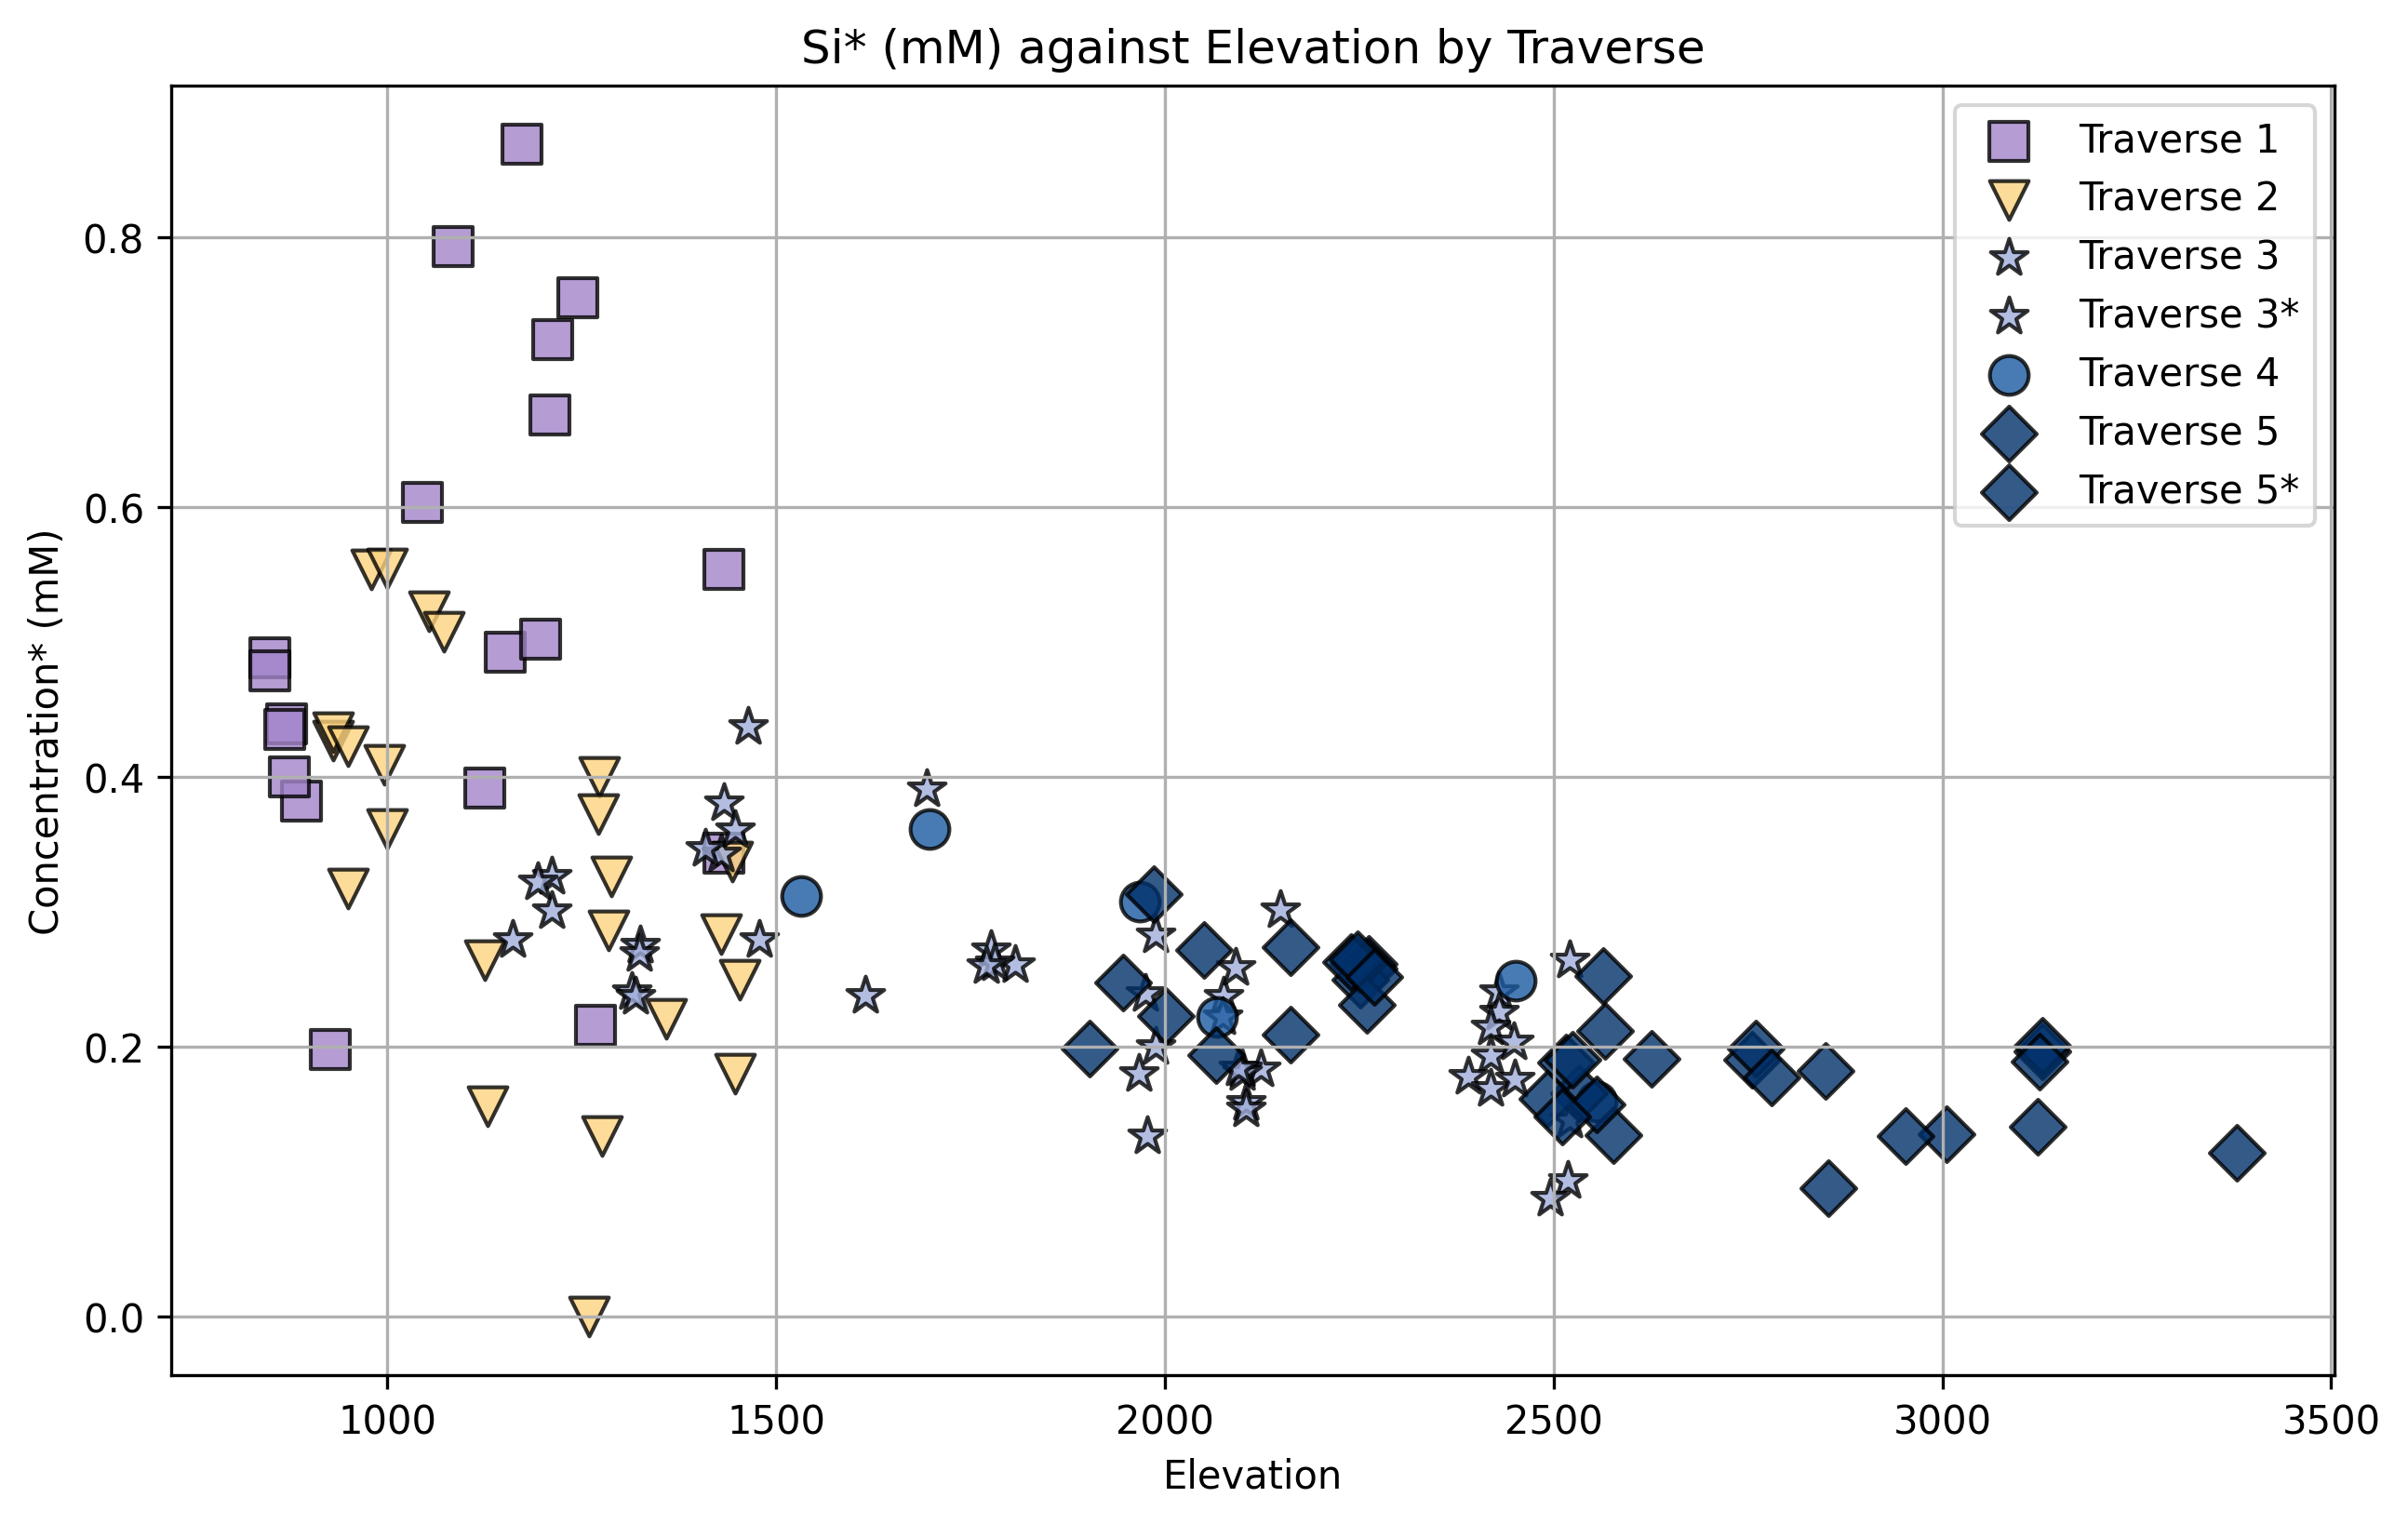

In [37]:
# plot Na and Si mM EC against Elevation coloured by Traverse

import matplotlib.pyplot as plt

# Plot Na and Si (in mM EC) against Elevation, colored by Traverse
plt.figure(figsize=(10, 6), dpi=300)

for traverse, marker in traverse_markers.items():
    # Filter data for the current traverse
    traverse_data = df_copy[df_copy['Traverse'] == traverse]
    
    # Get color for the current traverse
    color = custom_colors.get(traverse, 'black')  # Default to black if color not specified
    
    # Plot Na against Elevation
    plt.scatter(
        traverse_data['Elevation'], traverse_data['Si_mM_EC'], 
        label=f'{traverse}', alpha=0.8, edgecolor='k', 
        marker=marker, s=100, color=color
    )
    
    # # Plot Si against Elevation
    # plt.scatter(
    #     traverse_data['Elevation'], traverse_data['Si_mM_EC'], 
    #     label=f'{traverse} - Si', alpha=0.8, edgecolor='k', 
    #     marker=marker, s=100, color=color, linestyle='dotted'
    # )

# Add plot labels, title, legend, and grid
plt.xlabel('Elevation')
plt.ylabel('Concentration* (mM)')
plt.title('Si* (mM) against Elevation by Traverse')
plt.legend()
plt.grid(True)
plt.savefig('Si_mM_EC_Elevation.pdf')

# Show the plot
plt.show()


/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_44301/3278919400.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traverse_data['Na/Si'] = traverse_data['Na_mM'] / traverse_data['Si_mM']


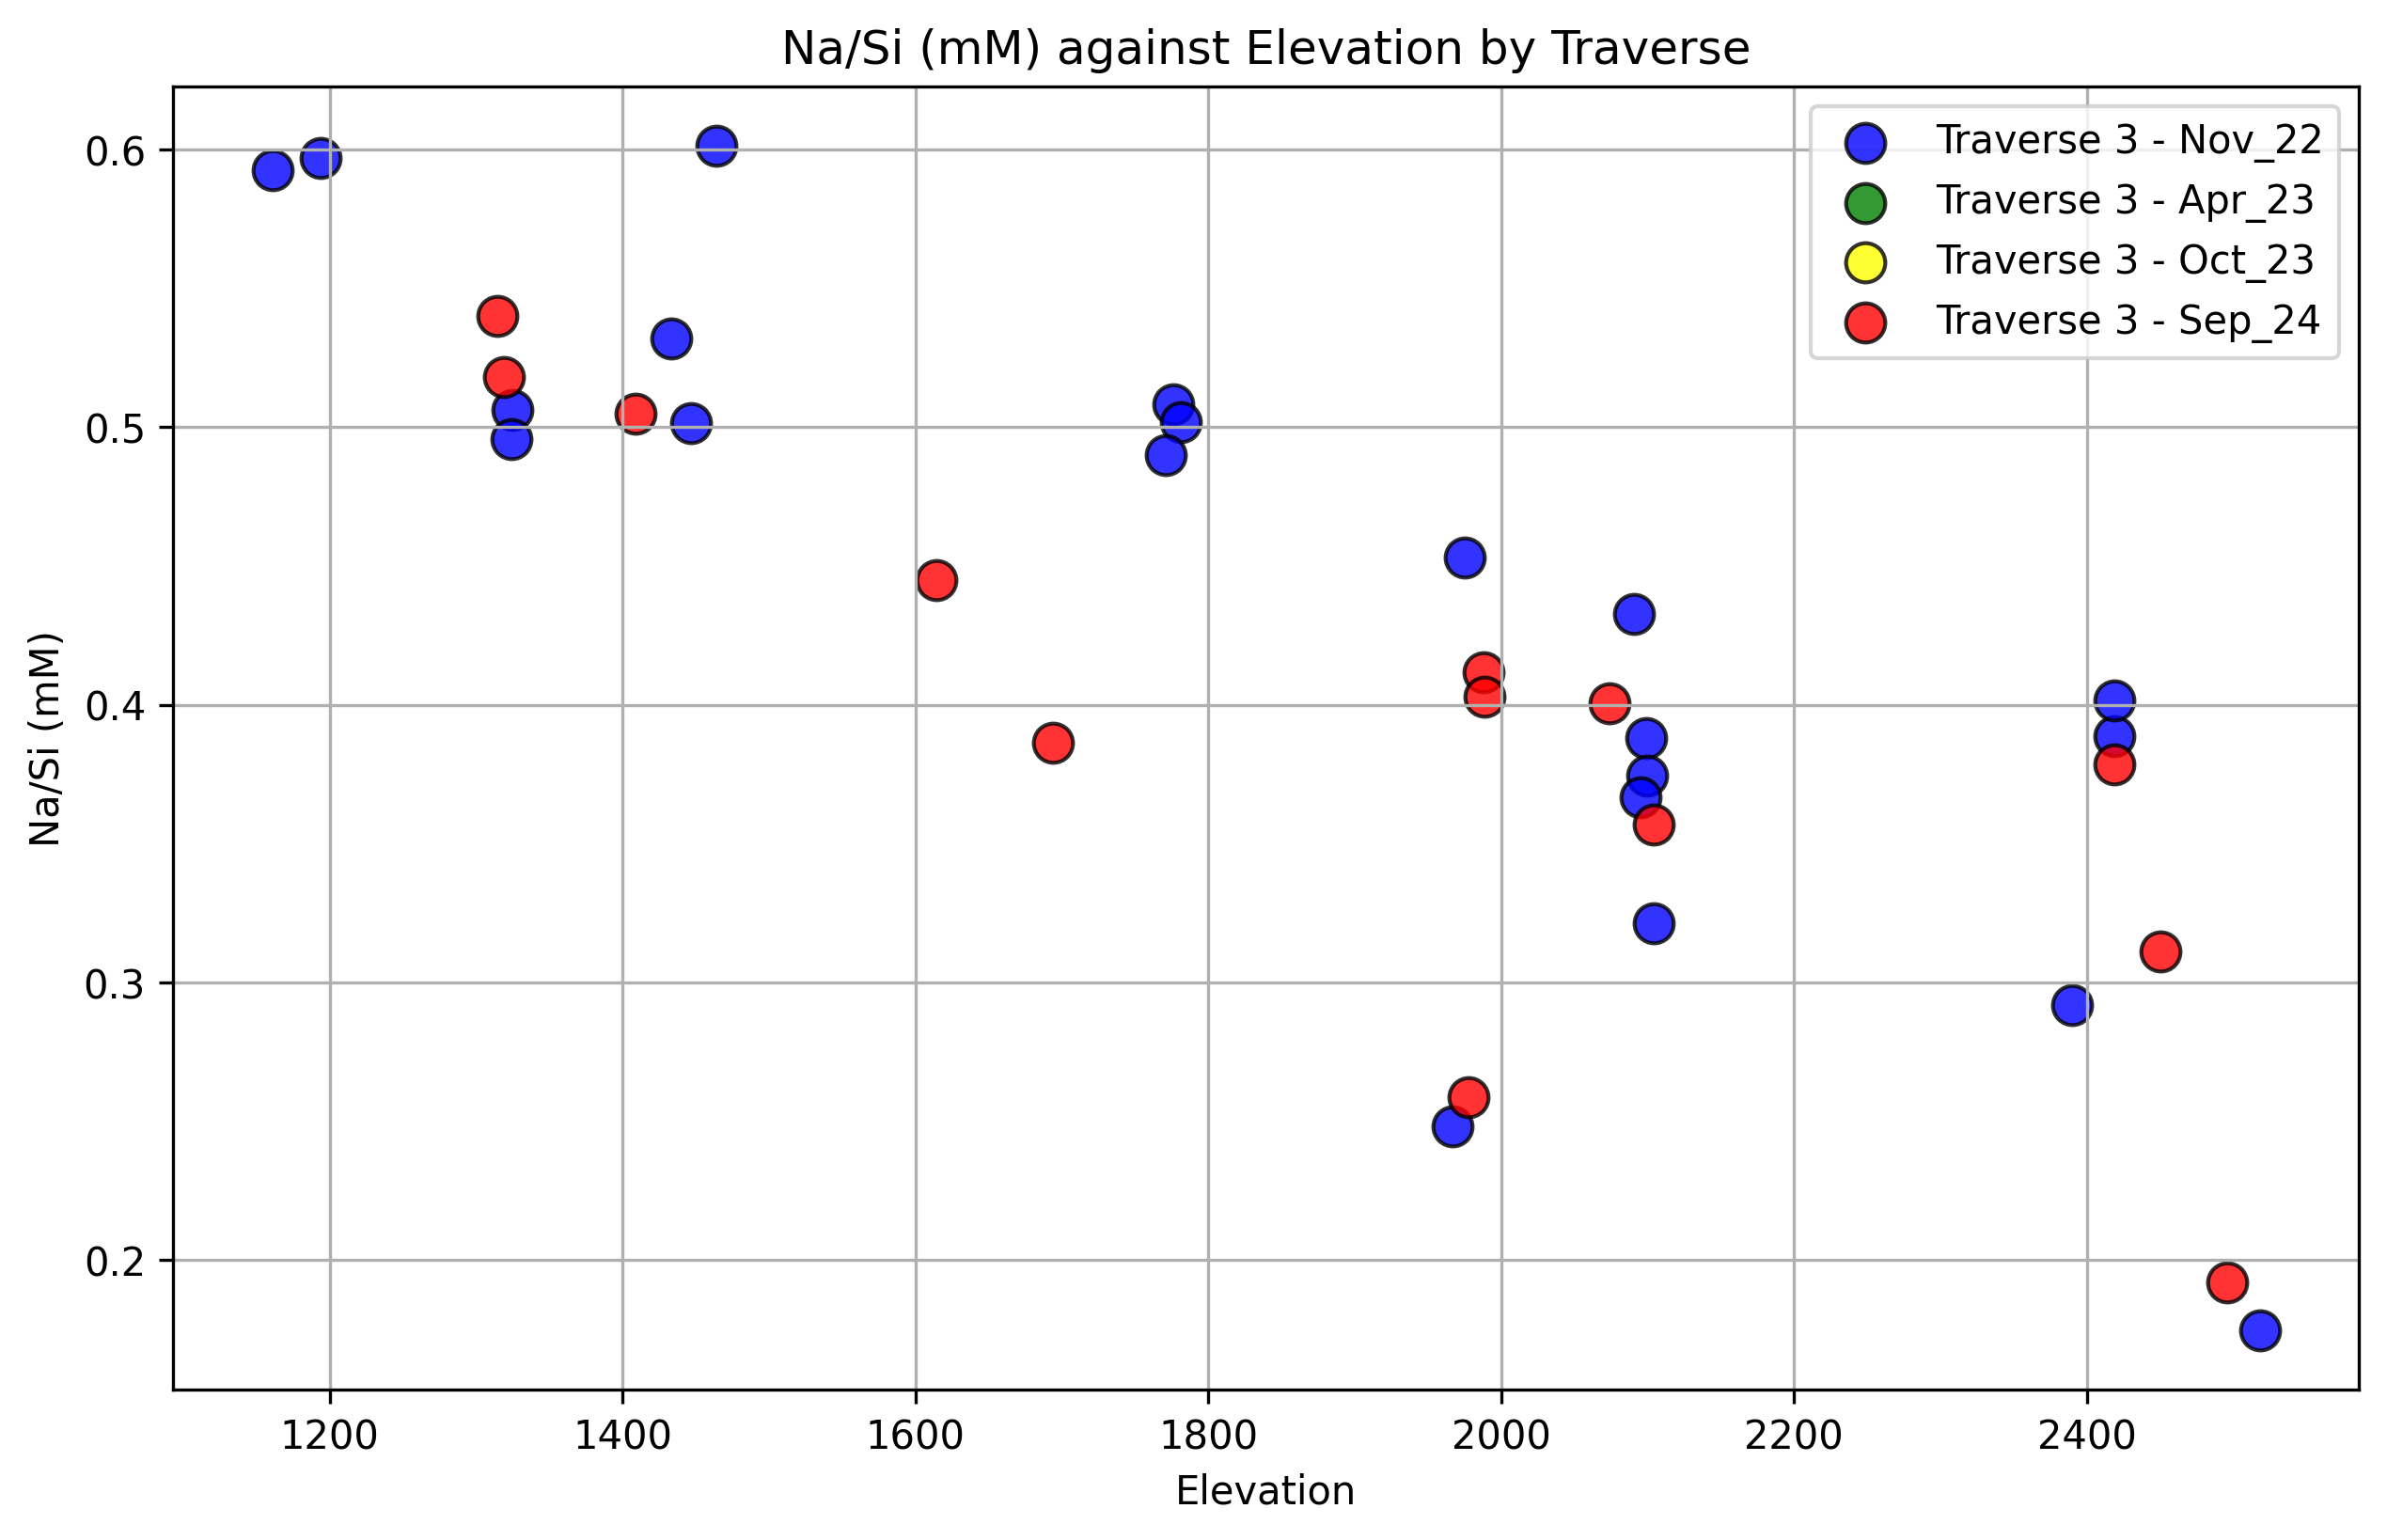

In [38]:
# plot Na and Si mM EC against Elevation coloured by Traverse

# Remove NEP24-061, NEP22-62, NEP22-61
df_copy = df_copy[~df_copy['Sample ID'].isin(['NEP24-061', 'NEP22-62', 'NEP22-61'])]


season_colors = {
    'Nov_22': 'blue',
    'Apr_23': 'green',
    'Oct_23': 'yellow',
    'Sep_24': 'red'
}

# Plot Na and Si (in mM EC) against Elevation, colored by Traverse
plt.figure(figsize=(10, 6), dpi=300)


traverse_data = df_copy[df_copy['Traverse'] == 'Traverse 3']

traverse_data['Na/Si'] = traverse_data['Na_mM'] / traverse_data['Si_mM'] 

# Get color for the current traverse
color = custom_colors.get(traverse, 'black')  # Default to black if color not specified
# Plot Na/Si against Elevation, colored by Season
for season, color in season_colors.items():
    season_data = traverse_data[traverse_data['Season'] == season]
    plt.scatter(
        season_data['Elevation'], season_data['Na/Si'], 
        label=f'Traverse 3 - {season}', alpha=0.8, edgecolor='k', s=100, color=color
    )
    # # Plot Si against Elevation
    # plt.scatter(
    #     traverse_data['Elevation'], traverse_data['Si_mM_EC'], 
    #     label=f'{traverse} - Si', alpha=0.8, edgecolor='k', 
    #     marker=marker, s=100, color=color, linestyle='dotted'
    # )
    
    # for i, row in traverse_data.iterrows():
    #     plt.text(row['Elevation'], row['Na/Si'], row['Sample ID'], fontsize=8, ha='right', va='bottom', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1))


# Add plot labels, title, legend, and grid
plt.xlabel('Elevation')
plt.ylabel('Na/Si (mM)')
plt.title('Na/Si (mM) against Elevation by Traverse')
plt.legend()
plt.grid(True)

plt.savefig('Na_Si_Elevation.pdf')
# Show the plot
plt.show()


/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_44301/3078408405.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traverse_data['Na/Si'] = traverse_data['Na_mM'] / traverse_data['Si_mM']


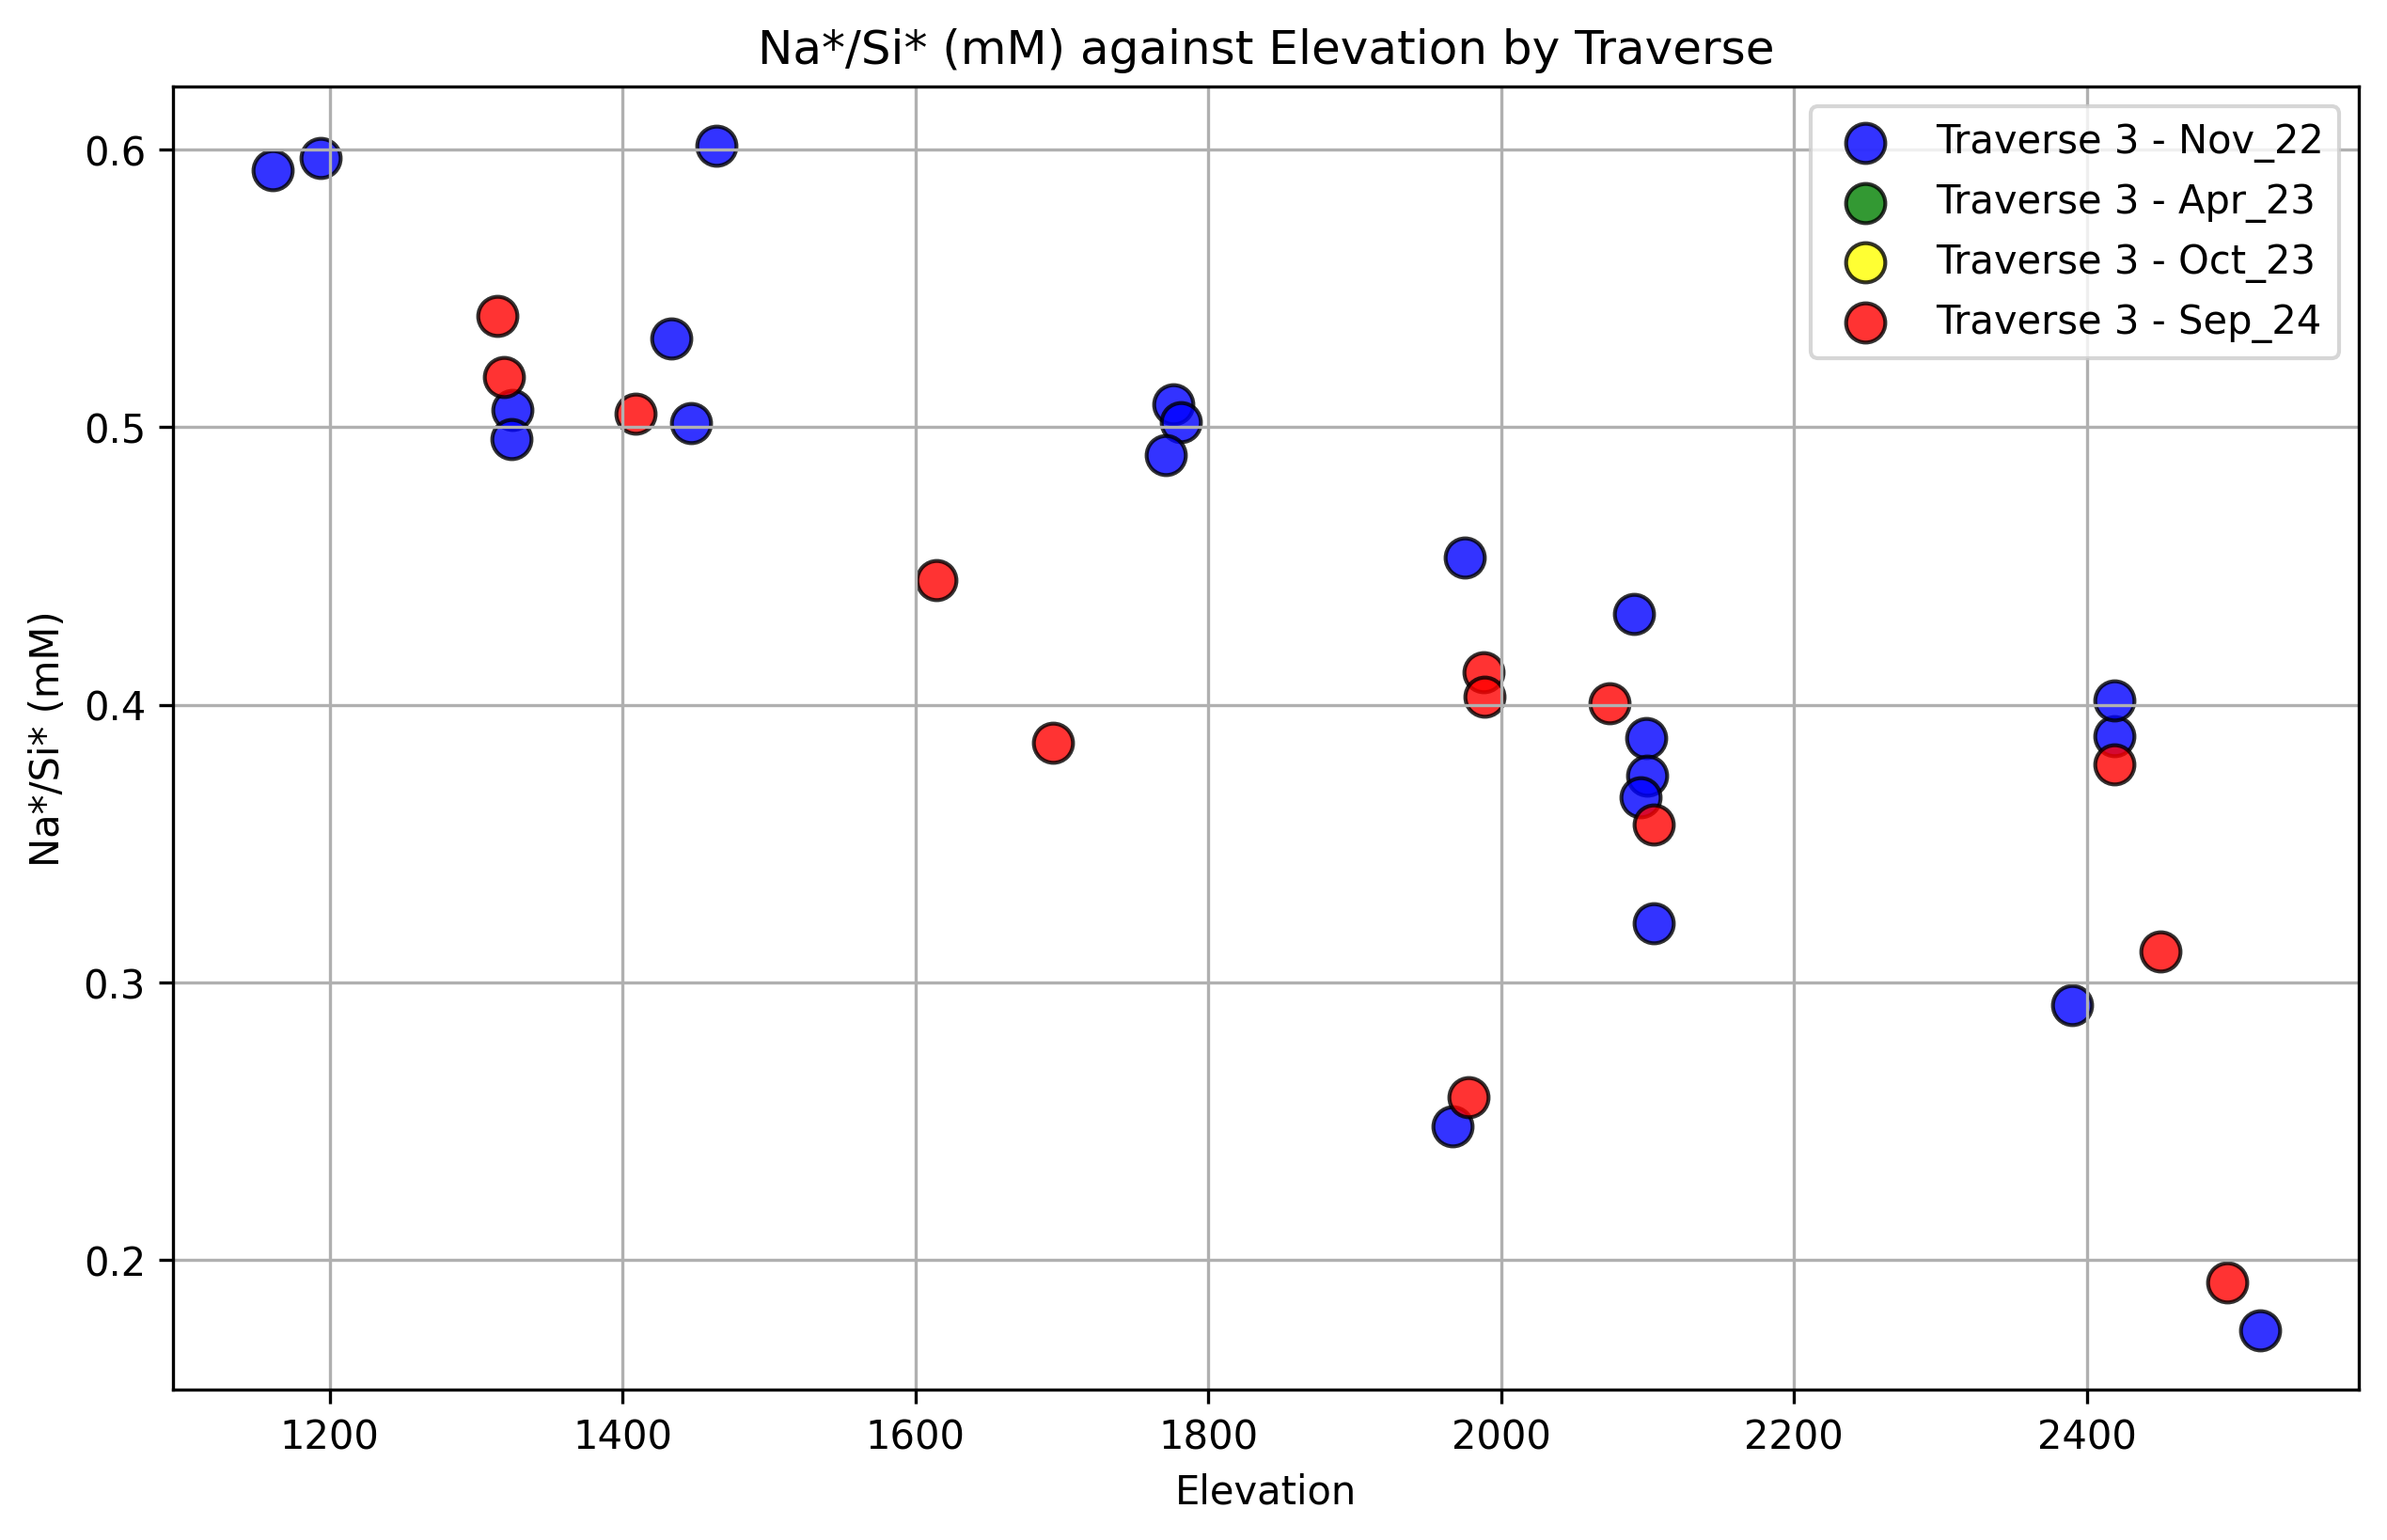

In [39]:
# plot Na and Si mM EC against Elevation coloured by Traverse

# Remove NEP24-061, NEP22-62, NEP22-61
df_copy = df_copy[~df_copy['Sample ID'].isin(['NEP24-061', 'NEP22-62', 'NEP22-61'])]


season_colors = {
    'Nov_22': 'blue',
    'Apr_23': 'green',
    'Oct_23': 'yellow',
    'Sep_24': 'red'
}

# Plot Na and Si (in mM EC) against Elevation, colored by Traverse
plt.figure(figsize=(10, 6), dpi=300)


traverse_data = df_copy[df_copy['Traverse'] == 'Traverse 3']

traverse_data['Na/Si'] = traverse_data['Na_mM'] / traverse_data['Si_mM'] 

# Get color for the current traverse
color = custom_colors.get(traverse, 'black')  # Default to black if color not specified
# Plot Na/Si against Elevation, colored by Season
for season, color in season_colors.items():
    season_data = traverse_data[traverse_data['Season'] == season]
    plt.scatter(
        season_data['Elevation'], season_data['Na/Si'], 
        label=f'Traverse 3 - {season}', alpha=0.8, edgecolor='k', s=100, color=color
    )
    # # Plot Si against Elevation
    # plt.scatter(
    #     traverse_data['Elevation'], traverse_data['Si_mM_EC'], 
    #     label=f'{traverse} - Si', alpha=0.8, edgecolor='k', 
    #     marker=marker, s=100, color=color, linestyle='dotted'
    # )
    
    # for i, row in traverse_data.iterrows():
    #     plt.text(row['Elevation'], row['Na/Si'], row['Sample ID'], fontsize=8, ha='right', va='bottom', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1))


# Add plot labels, title, legend, and grid
plt.xlabel('Elevation')
plt.ylabel('Na*/Si* (mM)')
plt.title('Na*/Si* (mM) against Elevation by Traverse')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


# Sr Isotopes

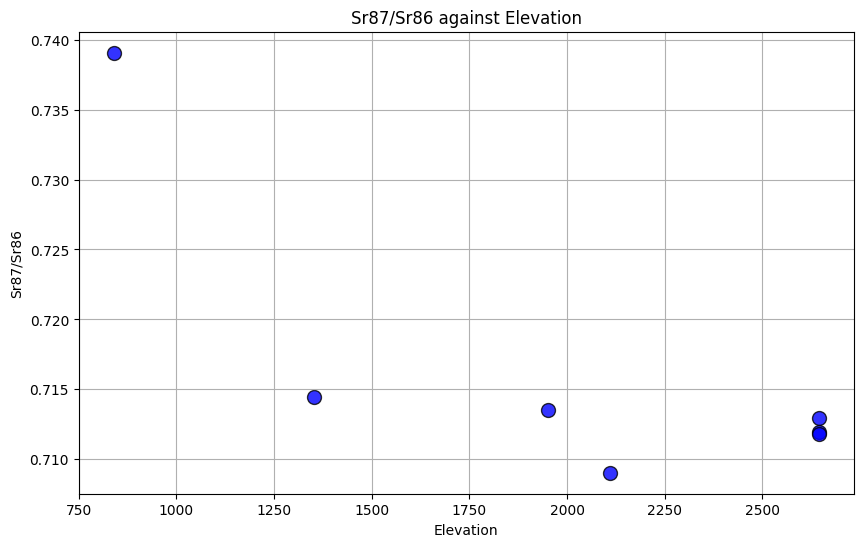

In [40]:
# plot df_rain Sr87/Sr86 against Elevation
plt.figure(figsize=(10, 6))

# Plot Sr87/Sr86 against Elevation for df_rain
plt.scatter(df_rain['Elevation'], df_rain['Sr87/Sr86'], alpha=0.8, edgecolor='k', s=100, color='blue')

# Add plot labels, title, legend, and grid
plt.xlabel('Elevation')
plt.ylabel('Sr87/Sr86')
plt.title('Sr87/Sr86 against Elevation')
plt.grid(True)

# Show the plot
plt.savefig('Sr87_Sr86_Elevation.pdf')
plt.show()

#what is the cloud height at this time of year?

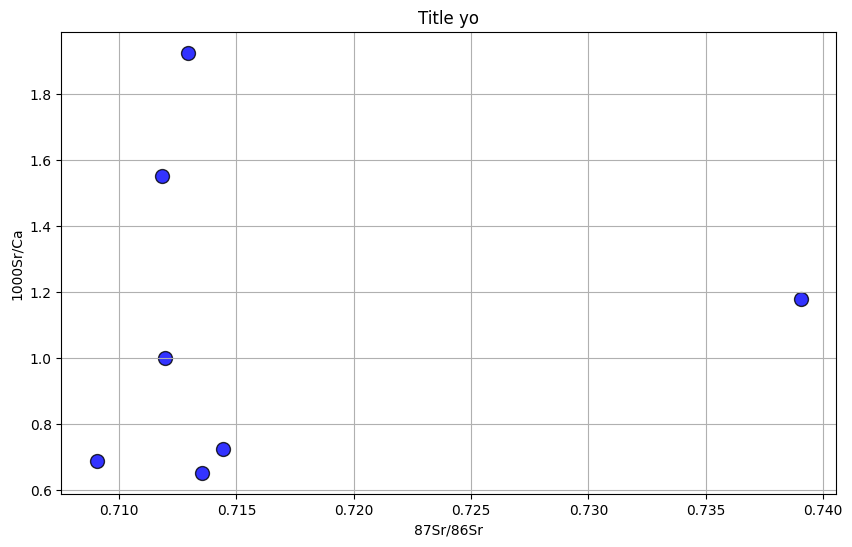

In [41]:


# plot 87Sr/86Sr against 1000*Sr_mM/Ca_mM for df_rain
plt.figure(figsize=(10, 6))

df_rain['1000Sr/Ca'] = 1000* df_rain['Sr_mM'] / df_rain['Ca_mM']
    
# Scatter plot of Si against elevation
plt.scatter(df_rain['Sr87/Sr86'], df_rain['1000Sr/Ca'], alpha=0.8, edgecolor='k', s=100, color='blue')

# Add plot labels, title, and grid
plt.xlabel('87Sr/86Sr')
plt.ylabel('1000Sr/Ca')
plt.title('Title yo')
plt.grid(True)

# Show the plot
plt.show()


In [42]:
# # Plot Si against elevation for df_mock_traverse_3
# plt.figure(figsize=(10, 6))

# # Scatter plot of Si against elevation
# plt.scatter(df_mock_trav_3['Elevation'], df_mock_trav_3['Si_mM'], alpha=0.8, edgecolor='k', s=100, color='blue')

# # Add plot labels, title, and grid
# plt.xlabel('Elevation (m)')
# plt.ylabel('Si (mM)')
# plt.title('Si against Elevation for Traverse 3')
# plt.grid(True)

# for i, row in df_mock_trav_3.iterrows():
#     plt.text(row['Elevation'], row['Si_mM'], row['Sample ID'], fontsize=8, ha='right', va='bottom', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1))

# # Show the plot
# plt.show()

# # come from deeper flowpaths

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

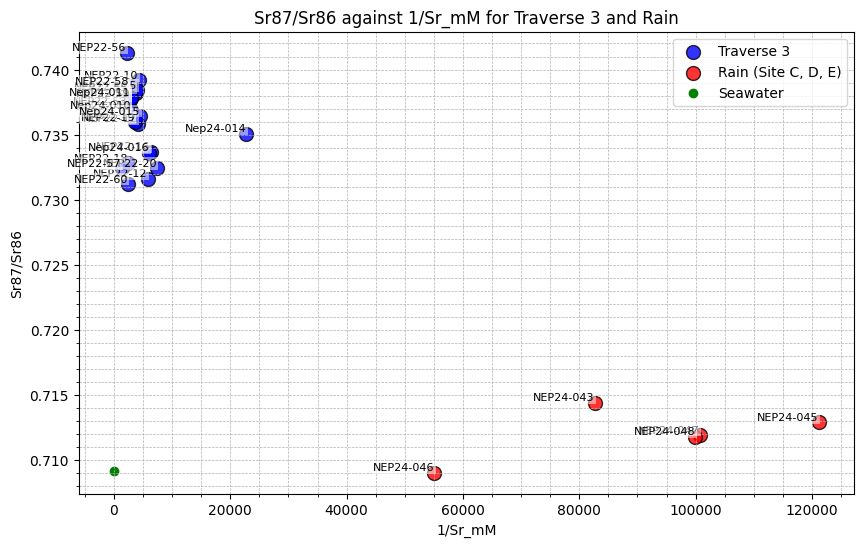

In [43]:
# Filter the dataframe for Traverse 3
df_mock_trav_3 = df_copy[df_copy['Traverse'] == 'Traverse 3']

# Plot Sr87/Sr86 against Sr_mM for df_mock_trav_3
plt.figure(figsize=(10, 6))

plt.scatter(1/df_mock_trav_3['Sr_mM'], df_mock_trav_3['Sr87/Sr86'], alpha=0.8, edgecolor='k', s=100, color='blue', label='Traverse 3')

# Filter df_rain to include only Site C, D, or E
df_rain_filtered = df_rain[df_rain['Traverse'].isin(['Site C', 'Site D', 'Site E'])]

# Plot Sr87/Sr86 against Sr_mM for df_rain_filtered
plt.scatter(1/df_rain_filtered['Sr_mM'], df_rain_filtered['Sr87/Sr86'], alpha=0.8, edgecolor='k', s=100, color='red', label='Rain (Site C, D, E)')

for i, row in df_mock_trav_3.iterrows():
    plt.text(1/row['Sr_mM'], row['Sr87/Sr86'], row['Sample ID'], fontsize=8, ha='right', va='bottom', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1))

for i, row in df_rain_filtered.iterrows():
    plt.text(1/row['Sr_mM'], row['Sr87/Sr86'], row['Sample ID'], fontsize=8, ha='right', va='bottom', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1))

# Add plot labels, title, legend, and grid

# Plot seawater in green: Sr87/Sr86 = 0.70918, 1/Sr_mM = 87.62/7.8
plt.scatter(87.62/7.8, 0.70918, color='green', label='Seawater')

plt.xlabel('1/Sr_mM')
plt.ylabel('Sr87/Sr86')
plt.title('Sr87/Sr86 against 1/Sr_mM for Traverse 3 and Rain')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()

plt.savefig('Sr87_Sr86_1Sr_Rain.pdf')
# Show the plot
plt.show()


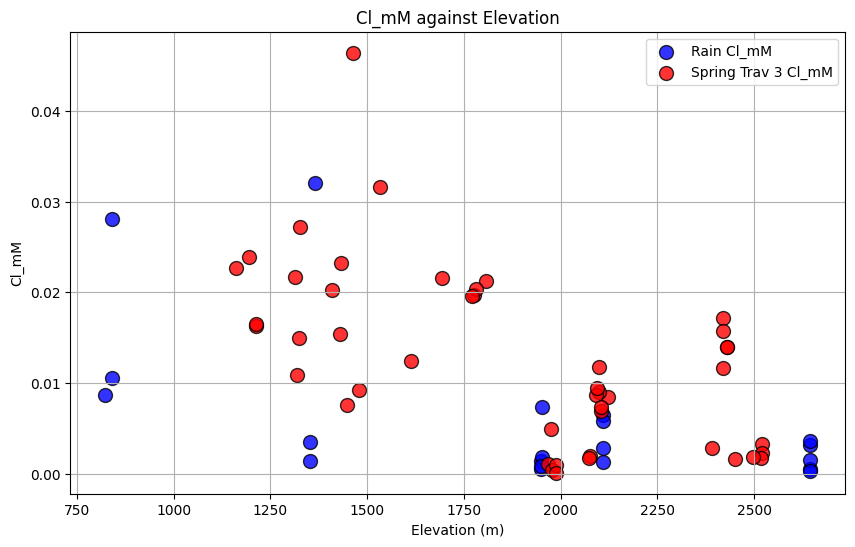

In [44]:
plt.figure(figsize=(10, 6))

df_traverse3_3xample = df_copy[df_copy['Traverse'] == 'Traverse 3']

# Plot Cl_mM against Elevation for df_rain
plt.scatter(df_rain['Elevation'], df_rain['Cl_mM'], alpha=0.8, edgecolor='k', s=100, color='blue', label='Rain Cl_mM')

# remove Nep24-013
df_traverse3_3xample = df_traverse3_3xample[df_traverse3_3xample['Sample ID'] != 'Nep24-013']

# Plot Cl_mM against Elevation for df_copy
plt.scatter(df_traverse3_3xample['Elevation'], df_traverse3_3xample['Cl_mM'], alpha=0.8, edgecolor='k', s=100, color='red', label='Spring Trav 3 Cl_mM')

# for i, row in df_copy.iterrows():
#     plt.text(row['Elevation'], row['Cl_mM'], row['Sample ID'], fontsize=8, ha='right', va='bottom', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1))

# Add plot labels, title, legend, and grid
plt.xlabel('Elevation (m)')
plt.ylabel('Cl_mM')
plt.title('Cl_mM against Elevation')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [45]:
# print Sr_mM value for NEP22_56
df_rain[df_rain['Sample ID'] == 'NEP22-056']['Sr_mM']

Series([], Name: Sr_mM, dtype: float64)

In [46]:
#Three endmembers of mixing: seawater, NEP22-56 and NEP24-045
# Seawater value:
Sr_Ratio_Seawater = 0.70918
Sr_mM_Seawater = 7.8/87.62

# NEP22-56 value:
Sr_Ratio_NEP22_56 = 0.741292
Sr_mM_NEP22_56 = 0.0404/87.62

# NEP24-045 value:
Sr_Ratio_NEP24_045 = 0.712917913
Sr_mM_NEP24_045 = 0.000723333333333333/87.62


In [47]:
# Sr_mix = Sr_mM_Seawater * f1 + Sr_mM_NEP22_56 * f2 + Sr_mM_NEP24_045 * f3

# Sr_Ratio_mix = (Sr_Ratio_Seawater * Sr_mM_Seawater * f1 / Sr_mix ) + (Sr_Ratio_NEP22_56 * Sr_mM_NEP22_56 * f2 / Sr_mix) + (Sr_Ratio_NEP24_045 * Sr_mM_NEP24_045 * f3 / Sr_mix)

# iterate over different f values to find the best fit to the data

In [48]:

# from itertools import product

# # Define the endmember values
# Sr_Ratio_Seawater = 0.70918
# Sr_mM_Seawater = 7.8 / 87.62

# Sr_Ratio_NEP22_56 = 0.741292
# Sr_mM_NEP22_56 = 0.0404 / 87.62

# Sr_Ratio_NEP24_045 = 0.712917913
# Sr_mM_NEP24_045 = 0.000723333333333333 / 87.62

# # Define the range of f1, f2, and f3 values in increments of 0.1
# fractions = np.round(np.arange(0, 1.1, 0.1), 2)  # Ensuring sum constraint holds

# # Store results
# mixing_results = []

# # Generate all possible combinations of (f1, f2, f3) that sum to 1
# for f1, f2, f3 in product(fractions, repeat=3):
#     if np.isclose(f1 + f2 + f3, 1):  # Ensure the fractions sum to 1

#         # Calculate Sr_mM mix
#         Sr_mix = Sr_mM_Seawater * f1 + Sr_mM_NEP22_56 * f2 + Sr_mM_NEP24_045 * f3

#         # Calculate Sr87/Sr86 mix
#         Sr_Ratio_mix = (
#             (Sr_Ratio_Seawater * Sr_mM_Seawater * f1) +
#             (Sr_Ratio_NEP22_56 * Sr_mM_NEP22_56 * f2) +
#             (Sr_Ratio_NEP24_045 * Sr_mM_NEP24_045 * f3)
#         ) / Sr_mix

#         # Append results
#         mixing_results.append([f1, f2, f3, Sr_mix, Sr_Ratio_mix])

# # Convert to DataFrame
# df_mixing = pd.DataFrame(mixing_results, columns=['f1 (Seawater)', 'f2 (NEP22-56)', 'f3 (NEP24-045)', 'Sr_mM_mix', 'Sr87/Sr86_mix'])

# # Display the DataFra

In [49]:


# # Ensure df_rain and df_mock_trav_3 are properly loaded before execution
# # Remove NaN or infinite values
# df_rain = df_rain.replace([np.inf, -np.inf], np.nan).dropna(subset=['Sr_mM', 'Sr87/Sr86'])
# df_mock_trav_3 = df_mock_trav_3.replace([np.inf, -np.inf], np.nan).dropna(subset=['Sr_mM', 'Sr87/Sr86'])


# # # Create a KDTree for efficient nearest neighbor search in df_mixing space
# # mixing_tree = cKDTree(df_mixing[['Sr_mM_mix', 'Sr87/Sr86_mix']].values)

# # Function to find nearest f-values for a given dataset
# def assign_f_values(df_data, df_mixing, tree):
#     # Query nearest neighbor in df_mixing for each data point
#     distances, indices = tree.query(df_data[['Sr_mM', 'Sr87/Sr86']].values)

#     # Assign corresponding f-values from df_mixing
#     df_data_assigned = df_data.copy()
#     df_data_assigned['f1 (Seawater)'] = df_mixing.iloc[indices]['f1 (Seawater)'].values
#     df_data_assigned['f2 (NEP22-56)'] = df_mixing.iloc[indices]['f2 (NEP22-56)'].values
#     df_data_assigned['f3 (NEP24-045)'] = df_mixing.iloc[indices]['f3 (NEP24-045)'].values

#     return df_data_assigned

# # Assign f-values to df_rain and df_copy (assumed df_mock_trav_3 is a subset of df_copy)
# df_rain_assigned = assign_f_values(df_rain, df_mixing, mixing_tree)
# df_mock_trav_3_assigned = assign_f_values(df_mock_trav_3, df_mixing, mixing_tree)

# # Display the assigned f-values

In [50]:
# import matplotlib.pyplot as plt
# import numpy as np
# import matplotlib.tri as tri

# # Create a triangulation for the mesh
# triang = tri.Triangulation(1 / df_mixing['Sr_mM_mix'], df_mixing['Sr87/Sr86_mix'])

# # Convert f1, f2, f3 into RGB colors (normalized)
# colors = np.vstack([df_mixing['f1 (Seawater)'], df_mixing['f2 (NEP22-56)'], df_mixing['f3 (NEP24-045)']]).T

# # Normalize the color components so each fraction is between 0 and 1
# colors = colors / colors.max(axis=0)

# # Compute an interpolated RGB color per triangle
# tri_colors = np.mean(colors[triang.triangles], axis=1)

# # Create the figure
# plt.figure(figsize=(10, 6))

# # Convert blended RGB into a colormap for tripcolor
# plt.tripcolor(triang, facecolors=tri_colors[:, 0], cmap="coolwarm", edgecolors='k', alpha=0.8)

# # Add color bar for RGB blending
# cbar = plt.colorbar()
# cbar.set_label("Mixing Fraction Blend (RGB: Seawater, NEP22-56, NEP24-045)")

# # Plot the real data points for Traverse 3
# plt.scatter(1/df_mock_trav_3['Sr_mM'], df_mock_trav_3['Sr87/Sr86'], alpha=0.8, edgecolor='k', s=100, color='black', label='Traverse 3')

# # Plot rain sample data (filtered for Site C, D, and E)
# df_rain_filtered = df_rain[df_rain['Traverse'].isin(['Site C', 'Site D', 'Site E'])]
# plt.scatter(1/df_rain_filtered['Sr_mM'], df_rain_filtered['Sr87/Sr86'], alpha=0.8, edgecolor='k', s=100, color='gray', label='Rain Samples')

# # Add plot labels, title, legend, and grid
# plt.xlabel('1/Sr (mM)')
# plt.ylabel('87Sr/86Sr')
# plt.title('87Sr/86Sr vs 1/Sr: RGB Blended Mixing Mesh')
# plt.legend()
# plt.grid(True)
# # Show the plot
# plt.show()


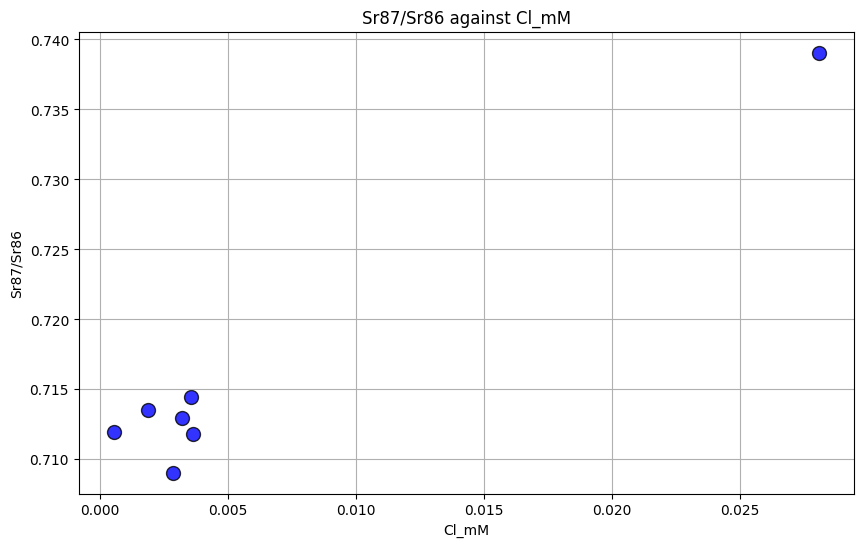

In [51]:
#plot Sr87/Sr86 against Cl_mM for df_rain

plt.figure(figsize=(10, 6))

# Plot Sr87/Sr86 against Cl_mM for df_rain
plt.scatter(df_rain['Cl_mM'], df_rain['Sr87/Sr86'], alpha=0.8, edgecolor='k', s=100, color='blue')

# Add plot labels, title, legend, and grid
plt.xlabel('Cl_mM')
plt.ylabel('Sr87/Sr86')

plt.title('Sr87/Sr86 against Cl_mM')

plt.grid(True)
plt.savefig('Sr87_Sr86_Cl.pdf')
# Show the plot
plt.show()



In [52]:
#

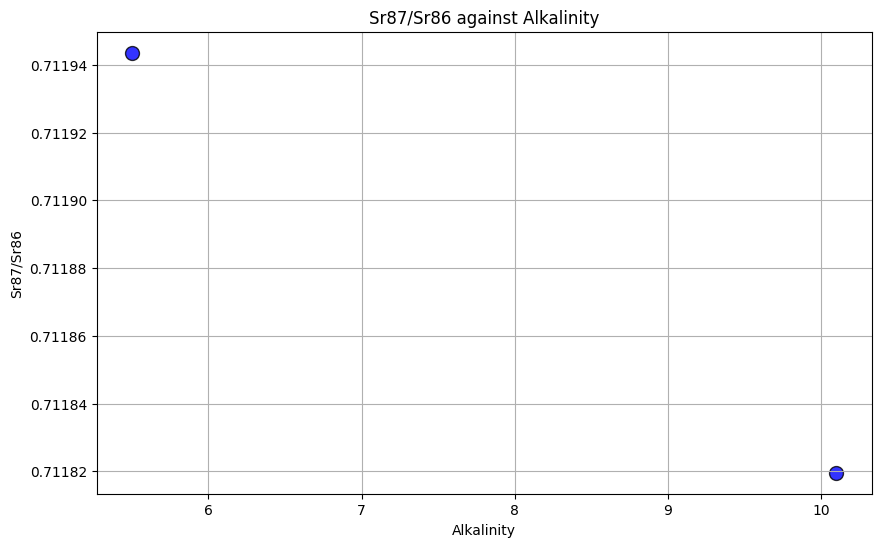

In [53]:
# plot df_rain Sr87/Sr86 against Elevation
plt.figure(figsize=(10, 6))

# Filter the dataframe for the specific samples
df_filtered = df_rain[df_rain['Sample ID'].isin(['NEP24-047', 'NEP24-048'])]

# Plot Sr87/Sr86 against Elevation for df_rain
plt.scatter(df_filtered['Alkalinity'], df_filtered['Sr87/Sr86'], alpha=0.8, edgecolor='k', s=100, color='blue')

# Add plot labels, title, legend, and grid
plt.xlabel('Alkalinity')
plt.ylabel('Sr87/Sr86')
plt.title('Sr87/Sr86 against Alkalinity')
plt.grid(True)

# Show the plot
plt.show()



posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


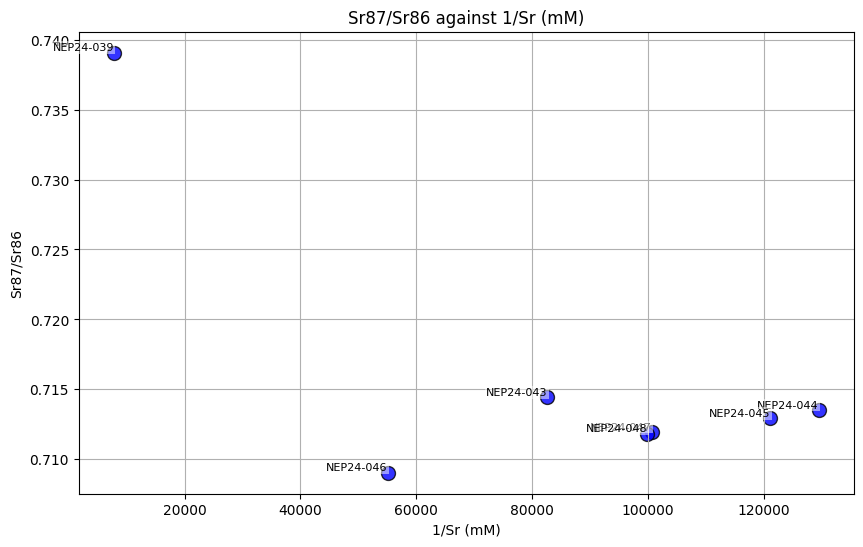

In [54]:
# plot Sr87/Sr86 against 1/Sr(mM) for df_rain

plt.figure(figsize=(10, 6))
# Calculate 1/Sr(mM)
df_rain['1/Sr_mM'] = 1 / df_rain['Sr_mM']
# Plot Sr87/Sr86 against 1/Sr(mM) for df_rain
plt.scatter(df_rain['1/Sr_mM'], df_rain['Sr87/Sr86'], alpha=0.8, edgecolor='k', s=100, color='blue')



for i, row in df_rain.iterrows():
    plt.text(row['1/Sr_mM'], row['Sr87/Sr86'], row['Sample ID'], fontsize=8, ha='right', va='bottom', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1))

# Add plot labels, title, legend, and grid
plt.xlabel('1/Sr (mM)')
plt.ylabel('Sr87/Sr86')
plt.title('Sr87/Sr86 against 1/Sr (mM)')
plt.grid(True)

# Show the plot
plt.show()

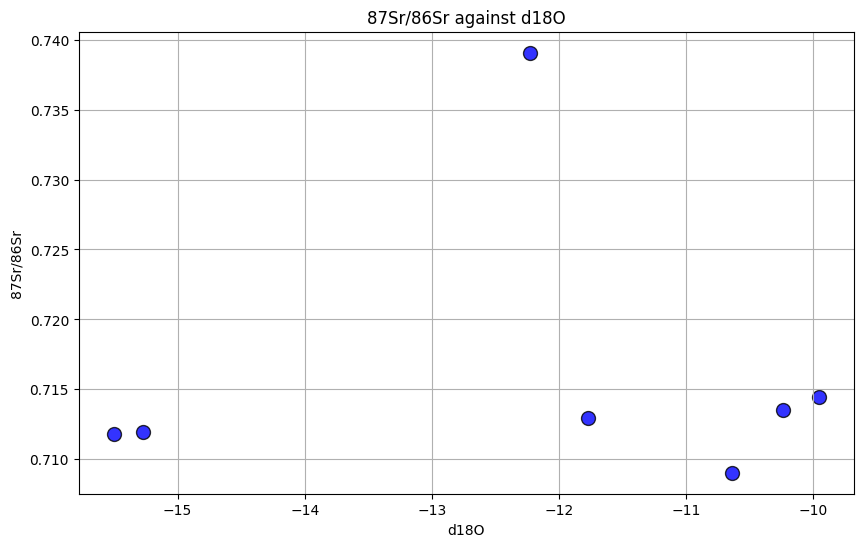

In [55]:
# plot 87Sr/86Sr against d18O for df_rain
plt.figure(figsize=(10, 6))

# Plot 87Sr/86Sr against d18O for df_rain
plt.scatter(df_rain['d18O'], df_rain['Sr87/Sr86'], alpha=0.8, edgecolor='k', s=100, color='blue')

# Add plot labels, title, legend, and grid
plt.xlabel('d18O')
plt.ylabel('87Sr/86Sr')
plt.title('87Sr/86Sr against d18O')
plt.grid(True)

# Show the plot
plt.show()


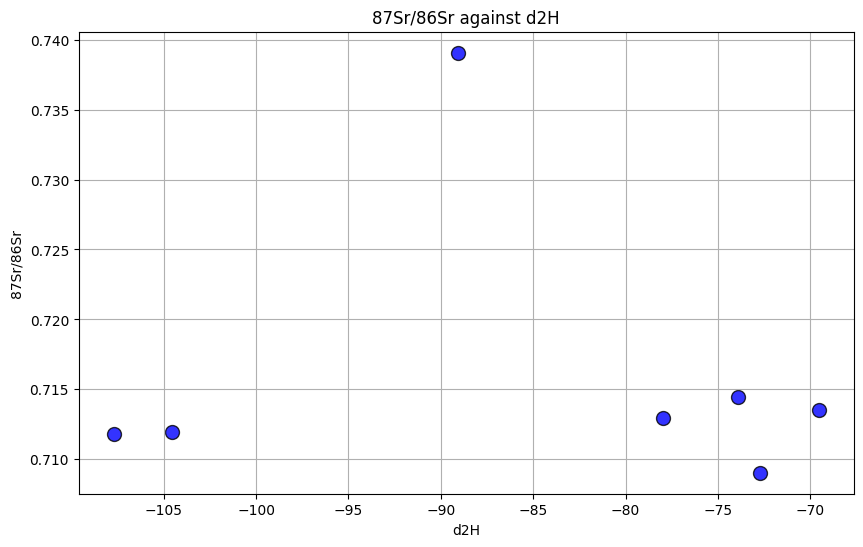

In [56]:
# plot 87Sr/86Sr against d18O for df_rain
plt.figure(figsize=(10, 6))

# Plot 87Sr/86Sr against d18O for df_rain
plt.scatter(df_rain['d2H'], df_rain['Sr87/Sr86'], alpha=0.8, edgecolor='k', s=100, color='blue')

# Add plot labels, title, legend, and grid
plt.xlabel('d2H')
plt.ylabel('87Sr/86Sr')
plt.title('87Sr/86Sr against d2H')
plt.grid(True)

# Show the plot
plt.show()


# Sr Correction

    Sample_ID  Elevation      HHC_%      TSS_%       LH_%
0    NEP22-10     2419.0  27.257216  11.555244  61.187540
1    NEP22-11     2419.0  24.366908  21.026725  54.606366
2    NEP22-12     2390.0  50.186372  39.031840  10.781788
22  Nep24-015     2104.2  32.741015  24.319453  42.939532
9    NEP22-20     2104.0  63.821282  20.126723  16.051995
6    NEP22-17     2100.0  29.415294  31.673958  38.910748
3    NEP22-13     2099.0  24.712912  34.355597  40.931491
8    NEP22-19     2095.0  25.254320  35.148485  39.597195
7    NEP22-18     2091.0  17.774307  63.477379  18.748314
23  Nep24-016     1978.0  50.320794  25.669709  24.009497
4    NEP22-15     1975.0  26.151449  17.753359  56.095192
5    NEP22-16     1967.0  52.366671  22.996386  24.636944
13   NEP22-54     1781.0  11.593765  32.994450  55.411785
12   NEP22-53     1776.0  11.107595  40.866712  48.025693
14   NEP22-55     1771.0  12.064844  33.028230  54.906925
16   NEP22-57     1464.0   7.704186  76.266890  16.028924
17   NEP22-58 

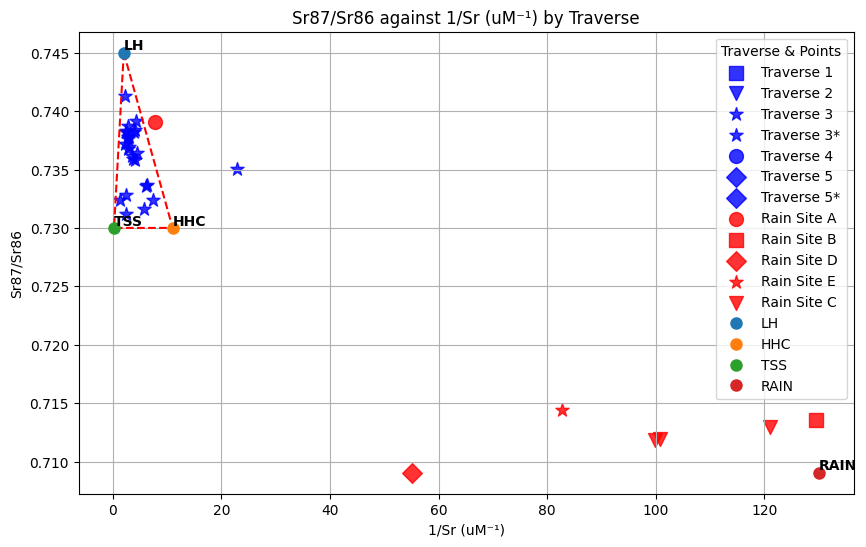

In [57]:
# Re-import necessary libraries
from scipy.spatial import Delaunay
from scipy.linalg import solve


# Create the plot
plt.figure(figsize=(10, 6))


df_copy['1000Sr/Ca'] = 1000*df_copy['Sr_mM']/df_copy['Ca_mM']

df_sr_trav3 = df_copy[df_copy['Traverse'] == 'Traverse 3']

# Plot Sr87/Sr86 against 1/Sr for df_copy by traverse
for traverse, marker in traverse_markers.items():
    traverse_data = df_sr_trav3[df_sr_trav3['Traverse'] == traverse].copy()
    traverse_data['Sr_uM'] = traverse_data['Sr_mM'] * 1000

    plt.scatter(1 / traverse_data['Sr_uM'], traverse_data['Sr87/Sr86'], alpha=0.8, s=100, label=traverse, marker=marker, color='blue')
    # for i, row in traverse_data.iterrows():
    #     zorder = 3 if row['Traverse'] == 'Traverse 3' else 2
    #     plt.text(1 / row['Sr_uM'], row['Sr87/Sr86'], row['Sample ID'], fontsize=8, ha='right', va='bottom',
    #              bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1), zorder=zorder)





# Define the four additional points with error bars
points = {
    "LH": {"1/Sr_uM": 2, "Sr87/Sr86": 0.745, "Sr_err": 0.20, "Sr87_err": 0.006},
    "HHC": {"1/Sr_uM": 11, "Sr87/Sr86": 0.730, "Sr_err": 0.09, "Sr87_err": 0.002},
    "TSS": {"1/Sr_uM": 0.2, "Sr87/Sr86": 0.73, "Sr_err": 0.62, "Sr87_err": 0.001},
    "RAIN": {"1/Sr_uM": 130, "Sr87/Sr86": 0.709041454178464, "Sr_err": 1/13, "Sr87_err": 0.0000995165635356203}
}



# Plot specific points with error bars
for label, data in points.items():
    x = data["1/Sr_uM"]
    y = data["Sr87/Sr86"]
    # x_err = 1/data["Sr_err"]
    # y_err = data["Sr87_err"]

    plt.errorbar(x, y,
                #  xerr=x_err, yerr=y_err, 
                 fmt='o', markersize=8, label=label, capsize=4)
    plt.text(x, y, label, fontsize=10, ha='left', va='bottom', fontweight='bold')
    
# Extract points
LH, HHC, TSS, RAIN = (points["LH"], points["HHC"], points["TSS"], points["RAIN"])

# Define the four additional points with error bars
points2 = {
    "LH": np.array([2, 0.745]),
    "HHC": np.array([11, 0.73]),
    "TSS": np.array([0.2, 0.73]),
    "RAIN": np.array([130, 0.709041454178464])
}



# Define triangles
#triangles = [("LH", "HHC", "TSS"), ("LH", "HHC", "RAIN"), ("HHC", "RAIN", "TSS")]
triangles = [("LH", "HHC", "TSS")]
triangle_vertices = {tri: np.array([points2[tri[0]], points2[tri[1]], points2[tri[2]]]) for tri in triangles}

# Draw triangles
for tri, vertices in triangle_vertices.items():
    x_vals = [v[0] for v in vertices] + [vertices[0][0]]
    y_vals = [v[1] for v in vertices] + [vertices[0][1]]
    plt.plot(x_vals, y_vals, 'r--', lw=1.5)

samples = df_sr_trav3[['Traverse', 'Sample ID', 'Sr_mM', 'Sr87/Sr86', 'Elevation', '1000Sr/Ca']].copy()
samples = samples.dropna()  # Remove NaN values
samples = samples[samples['Sr_mM'] > 0]  # Remove zero values to avoid division errors
samples['1/Sr_uM'] = 1 / (samples['Sr_mM'] * 1000)
samples = samples.replace([np.inf, -np.inf], np.nan).dropna()  # Remove inf values


sample_compositions = {}

for idx, row in samples.iterrows():
    sample_point = np.array([row['1/Sr_uM'], row['Sr87/Sr86'], 1])  # Homogeneous coordinates
    for tri, vertices in triangle_vertices.items():
        A = np.vstack((vertices.T, np.ones(3)))  # Correctly formatted 3x3 matrix
        try:
            weights = solve(A, sample_point)
            if np.all(weights >= 0):  # Ensure it's inside the triangle
                sample_compositions[idx] = {"Traverse": row['Traverse'], "Sample_ID": row['Sample ID'], "Elevation": row['Elevation'], "Triangle": tri, "Weights": weights}
                break
        except np.linalg.LinAlgError:
            continue

# Define the valid triangle
valid_triangle = ("LH", "HHC", "TSS")

# List to store weighted percentages
weighted_percentages = []

for idx, entry in sample_compositions.items():
    if entry["Triangle"] == valid_triangle:  # Ensure the sample belongs to HHC-TSS-LH
        weights = entry["Weights"]

        weight_dict = {
            "Sample_ID": entry["Sample_ID"],
            "Elevation": entry["Elevation"],
            "HHC_%": weights[list(entry["Triangle"]).index("HHC")] * 100,
            "TSS_%": weights[list(entry["Triangle"]).index("TSS")] * 100,
            "LH_%": weights[list(entry["Triangle"]).index("LH")] * 100
        }

        weighted_percentages.append(weight_dict)

# Convert to DataFrame
df_weights = pd.DataFrame(weighted_percentages)

# Sort by elevation (descending)
df_weights = df_weights.sort_values(by="Elevation", ascending=False)

print(df_weights)

# Plot Sr87/Sr86 against 1/Sr for df_rain with different markers for different sites but the same red color
rain_markers = {
    'Site A': 'o',  # Circle
    'Site B': 's',  # Square
    'Site C': 'v',  # Triangle
    'Site D': 'D',  # Diamond
    'Site E': '*',  # Star
}




for traverse in df_rain['Traverse'].unique():
    traverse_data = df_rain[df_rain['Traverse'] == traverse].copy()
    traverse_data['Sr_uM'] = traverse_data['Sr_mM'] * 1000
    marker = rain_markers.get(traverse, 'x')  # Default to 'x' if traverse not in rain_markers

    plt.scatter(1 / traverse_data['Sr_uM'], traverse_data['Sr87/Sr86'], alpha=0.8, s=100, label=f'Rain {traverse}', marker=marker, color='red')


# Add plot labels, title, legend, and grid
plt.xlabel('1/Sr (uM⁻¹)')
plt.ylabel('Sr87/Sr86')
#plt.xscale('log')
plt.title('Sr87/Sr86 against 1/Sr (uM⁻¹) by Traverse')
plt.legend(title='Traverse & Points', loc='best')
plt.grid(True)
plt.savefig('Sr87_Sr86_1Sr_Traverse_Triangle.pdf')
# Show the plot
plt.show()
plt.close()


In [58]:
# Extract matching samples
matching_samples = [entry for entry in sample_compositions.values() if set(entry["Triangle"]) == valid_triangle]

# Convert to DataFrame
df_weights = pd.DataFrame(matching_samples)

# print percenta

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Extract sorted labels, elevations, and percentage contributions
sample_labels = df_weights["Sample_ID"].tolist()
elevations = df_weights["Elevation"].tolist()
percentages = df_weights[["HHC_%", "TSS_%", "LH_%"]].to_numpy()

# Create figure with secondary y-axis for elevation
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()  # Secondary y-axis

bar_positions = np.arange(len(sample_labels))

# Define colors and markers for each endmember
colors = ['blue', 'green', 'orange']  # Colors for HHC, TSS, LH
markers = ['o', 's', '^']  # Different markers for each endmember

# Plot lines with points for percentage contributions
for i, (endmember, color, marker) in enumerate(zip(["HHC_%", "TSS_%", "LH_%"], colors, markers)):
    ax1.plot(bar_positions, percentages[:, i], color=color, marker=marker, markersize=8, linestyle='-', label=endmember)

# Plot elevation as a line plot
ax2.plot(bar_positions, elevations, 'ko-', markersize=8, label='Elevation')

# Formatting
ax1.set_xlabel('Samples')
ax1.set_ylabel('Percentage Contribution')
ax2.set_ylabel('Elevation (m)')
ax1.set_title('Percentage Contribution of Each Endmember - Traverse 3')
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(sample_labels, rotation=45, ha='right')
ax1.legend(title='Endmembers', loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)

# Show the plot
plt.show()


KeyError: 'Sample_ID'

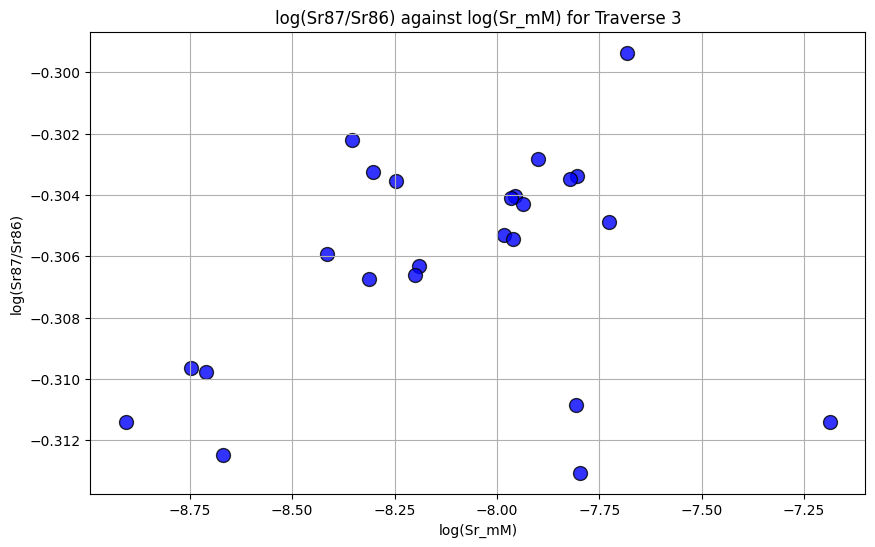

In [ ]:
# plot log(Sr87/Sr86) against log(1/Sr_mM) for df_traverse3
plt.figure(figsize=(10, 6))

# Calculate log values
df_traverse3['log_Sr87/Sr86'] = np.log(df_traverse3['Sr87/Sr86'])
df_traverse3['log_Sr_mM'] = np.log(df_traverse3['Sr_mM'])

# Plot log(Sr87/Sr86) against log(1/Sr_mM) for df_traverse3
plt.scatter(df_traverse3['log_Sr_mM'], df_traverse3['log_Sr87/Sr86'], alpha=0.8, edgecolor='k', s=100, color='blue')

# Add plot labels, title, and grid
plt.xlabel('log(Sr_mM)')
plt.ylabel('log(Sr87/Sr86)')
plt.title('log(Sr87/Sr86) against log(Sr_mM) for Traverse 3')
plt.grid(True)

# Show the plot


0.14836251513314058


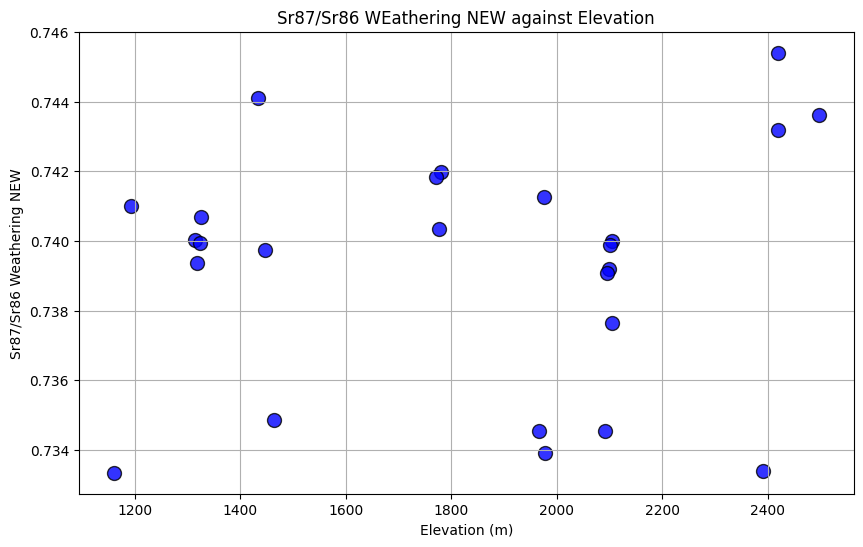

In [ ]:
# % of Sr from rain = Sr_mM - Sr_mM_EC / Sr_mM
df_copy['Sr_rain_percentage'] = 1- ((df_copy['Sr_mM_EC']) / df_copy['Sr_mM'])

print(df_copy['Sr_rain_percentage'].mean())

df_copy['Srweathering_NEW'] =  (df_copy['Sr87/Sr86'] - df_copy['Sr_rain_percentage'] * 0.709)/(1-df_copy['Sr_rain_percentage'])

df_traverse3 = df_copy[df_copy['Traverse'] == 'Traverse 3']

plt.figure(figsize=(10, 6))

# Scatter plot of Sr87/Sr86 against Elevation
plt.scatter(df_traverse3['Elevation'], df_traverse3['Srweathering_NEW'], alpha=0.8, edgecolor='k', s=100, color='blue')

# Add plot labels, title, and grid
plt.xlabel('Elevation (m)')
plt.ylabel('Sr87/Sr86 Weathering NEW')
plt.title('Sr87/Sr86 WEathering NEW against Elevation')
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
# print the Sr87/Sr86 and Sr_mM values for NEP22-56

print(df_copy[df_copy['Sample ID'] == 'NEP22-56'][['Sr_mM', 'Sr87/Sr86']])

        Sr_mM  Sr87/Sr86
163  0.000461   0.741292


In [ ]:
#print the max rain Sr_mM
print(df_rain['Sr_mM'].max())

0.00012797686981663243


In [ ]:
df_traverse3 = df_copy[df_copy['Traverse'] == 'Traverse 3']

In [ ]:
import numpy as np
import pandas as pd

def get_closest_rain_sample_Sr(row, df_rain):
    """Find the closest rain sample based on latitude and longitude."""
    try:
        # Filter valid rain samples with non-null Sr87/Sr86 values
        df_rain_valid = df_rain.dropna(subset=['Sr87/Sr86'])
        
        if df_rain_valid.empty:
            print(f"🚨 No valid rain sample found for row {row.name}")
            return None  

        # Compute distances and find the closest sample
        distances = (df_rain_valid[['Latitude', 'Longitude']] - row[['Latitude', 'Longitude']]).pow(2).sum(axis=1)
        closest_index = distances.idxmin()
        
        return df_rain_valid.loc[closest_index]
    except Exception as e:
        print(f"🚨 Error finding closest rain sample for row {row.name}: {e}")
        return None

def sr_correction(row, sr_weathering, df_rain):
    """Applies Sr correction using the mass balance and isotopic equations."""
    if row[['Sr87/Sr86', 'Sr_mM']].isnull().any():
        print(f"🚨 Warning: NaN detected in input data for row {row.name}")
        return None

    sr87_sr86_sample = row['Sr87/Sr86']
    sr_mM_sample = row['Sr_mM']

    # Find the closest rain sample
    closest_rain_sample = get_closest_rain_sample_Sr(row, df_rain)
    if closest_rain_sample is None:
        print(f"🚨 Warning: No closest rain sample found for row {row.name}")
        return None

    sr87_sr86_rain = closest_rain_sample['Sr87/Sr86']
    sr_mM_rain = closest_rain_sample['Sr_mM']

    sr_mM_weathering = sr_mM_sample - sr_mM_rain

    if sr_mM_weathering == 0:
        print(f"🚨 Warning: sr_mM_weathering is zero for row {row.name}")
        return None
    
    sr87_sr86_weathering = (sr87_sr86_sample * sr_mM_sample - sr87_sr86_rain * sr_mM_rain) / sr_mM_weathering

    return sr87_sr86_weathering

# Apply the correction to df_traverse3
df_traverse3['Sr87/Sr86_Weathering'] = df_traverse3.apply(
    lambda row: sr_correction(row, sr_weathering, df_rain), axis=1
)

# Drop NaN values if needed
df_traverse3_valid = df_traverse3.dropna(subset=['Sr87/Sr86_Weathering'])

# Display the corrected Sr87/Sr86 values
print(df_traverse3_valid[['Sample ID', 'Sr87/Sr86', 'Sr87/Sr86_Weathering']])

🚨 Warning: NaN detected in input data for row 56
🚨 Warning: NaN detected in input data for row 67
🚨 Warning: NaN detected in input data for row 68
🚨 Warning: NaN detected in input data for row 69
🚨 Warning: NaN detected in input data for row 70
🚨 Warning: NaN detected in input data for row 71
🚨 Warning: NaN detected in input data for row 73
🚨 Warning: NaN detected in input data for row 74
🚨 Warning: NaN detected in input data for row 75
🚨 Warning: NaN detected in input data for row 92
🚨 Warning: NaN detected in input data for row 93
🚨 Warning: NaN detected in input data for row 94
🚨 Warning: NaN detected in input data for row 98
🚨 Warning: NaN detected in input data for row 99
🚨 Warning: NaN detected in input data for row 113
🚨 Warning: NaN detected in input data for row 114
🚨 Warning: NaN detected in input data for row 115
🚨 Warning: NaN detected in input data for row 116
🚨 Warning: NaN detected in input data for row 117
🚨 Warning: NaN detected in input data for row 118
🚨 Warning: NaN

/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_5071/762291711.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traverse3['Sr87/Sr86_Weathering'] = df_traverse3.apply(


TypeError: Inputs x and y must be 1D or 2D, not 0D

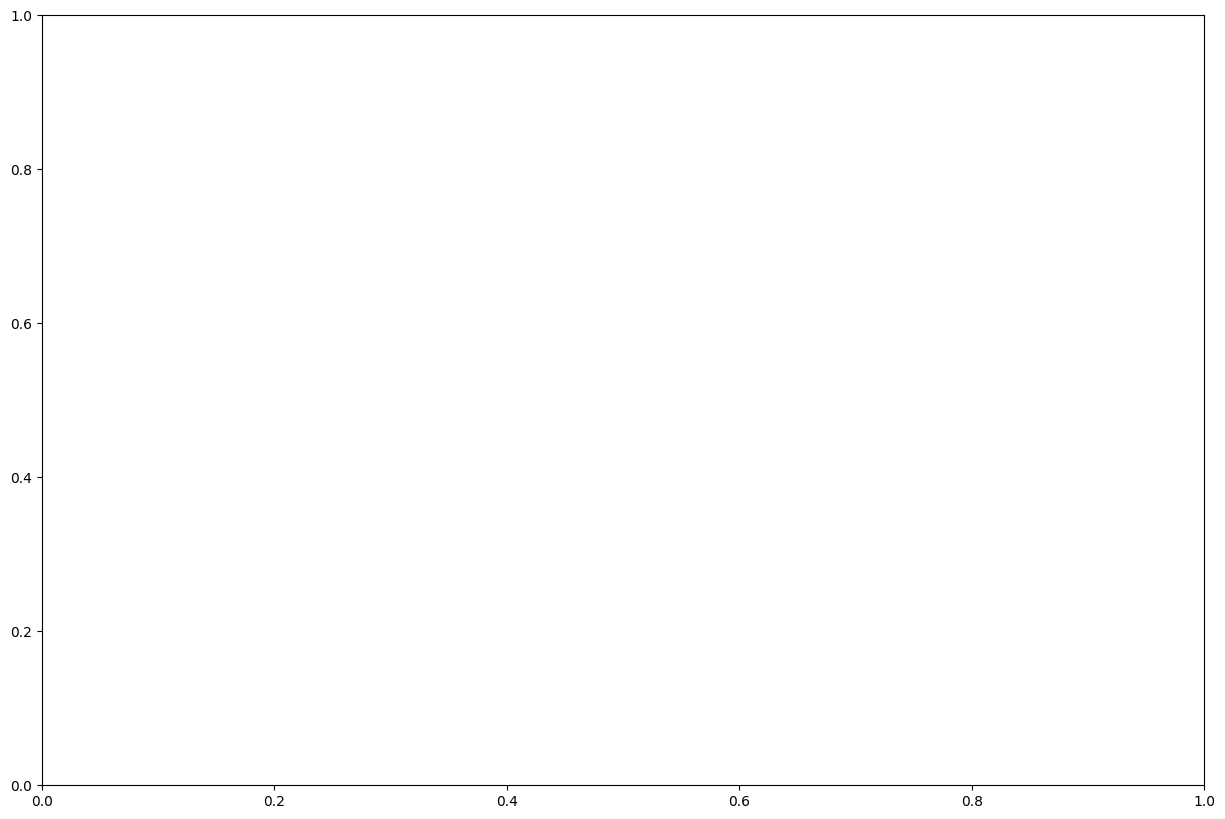

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.lines import Line2D

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(15, 10))

# Plot the DEM data in grayscale on ax1
c = ax1.contourf(x, y, z, cmap='Greys', alpha=0.7)

# Overlay the watershed boundary
gdf.plot(ax=ax1, facecolor='none', edgecolor='yellow', alpha=1, linewidth=1, label='Melamchi Watershed')

# Overlay geology data
plotted_labels = set()  
geology_handles = []  
for geom, id_value in zip(gdf2.geometry, gdf2['id']):
    color = id_to_color.get(id_value, 'grey')  
    label = id_to_label.get(id_value, '')
    
    if isinstance(geom, Polygon):
        x_poly, y_poly = geom.exterior.xy
        ax1.fill(x_poly, y_poly, color=color, alpha=0.5, edgecolor='black', linewidth=0.5)
        if label not in plotted_labels:
            plotted_labels.add(label)
            geology_handles.append(Line2D([0], [0], marker='o', color=color, markersize=10, linestyle='None', label=label))
    elif isinstance(geom, MultiPolygon):
        for part in geom.geoms:
            x_poly, y_poly = part.exterior.xy
            ax1.fill(x_poly, y_poly, color=color, alpha=0.5, edgecolor='black', linewidth=0.5)
            if label not in plotted_labels:
                plotted_labels.add(label)
                geology_handles.append(Line2D([0], [0], marker='o', color=color, markersize=10, linestyle='None', label=label))

vmin = df_traverse3['Sr87/Sr86_Weathering'].min()
vmax = df_traverse3['Sr87/Sr86_Weathering'].max()

# Scatter plot for Sr87/Sr86_Weathering values
sc = ax1.scatter(
    df_traverse3['Longitude'], df_traverse3['Latitude'], 
    c=df_traverse3['Sr87/Sr86_Weathering'], cmap='viridis', s=120, alpha=1, edgecolor='k', label='Sr87/Sr86 Weathering', vmin=vmin, vmax=vmax
)

# Add colorbar for Sr87/Sr86_Weathering values
cbar = plt.colorbar(sc, ax=ax1, location='right', pad=0.1)
cbar.set_label('Sr87/Sr86 Weathering')

# Labels and title
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_title('Sr87/Sr86 Weathering across the Melamchi Watershed')

# Set map limits
ax1.set_xlim(85.2, 86)
ax1.set_ylim(27.5, 27.95)

# Add geology legend
geology_legend = ax1.legend(
    handles=geology_handles, 
    title='Geology', 
    loc='upper right', 
    bbox_to_anchor=(1.01, 1),
    borderaxespad=0.
)
ax1.add_artist(geology_legend)

# Save and show the plot
plt.tight_layout()
plt.savefig('Sr87_Sr86_Weathering_Map.pdf', bbox_inches='tight')
plt.show()
plt.close(fig)



In [ ]:
# Plot Si against elevation for df_mock_traverse_3
plt.figure(figsize=(10, 6))

# Scatter plot of Si against elevation, colored by 87Sr/86Sr Weathering
sc = plt.scatter(df_traverse3['Elevation'], df_traverse3['Si_mM'], 
                 c=df_traverse3['Sr87/Sr86 Weathering'], cmap='viridis', alpha=0.8, edgecolor='k', s=100)
                 

# Add colorbar
cbar = plt.colorbar(sc)
cbar.set_label('87Sr/86Sr Weathering')

# Add plot labels, title, and grid
plt.xlabel('Elevation (m)')
plt.ylabel('Si (mM)')
plt.title('Si against Elevation for Traverse 3')
plt.grid(True)


# Annotate each point with Sample ID
for i, row in df_traverse3.iterrows():
    plt.text(row['Elevation'], row['Si_mM'], row['Sample ID'], fontsize=8, ha='right', va='bottom', 
             bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1))

# Show the plot
plt.show()

KeyError: 'Sr87/Sr86 Weathering'

<Figure size 1000x600 with 0 Axes>

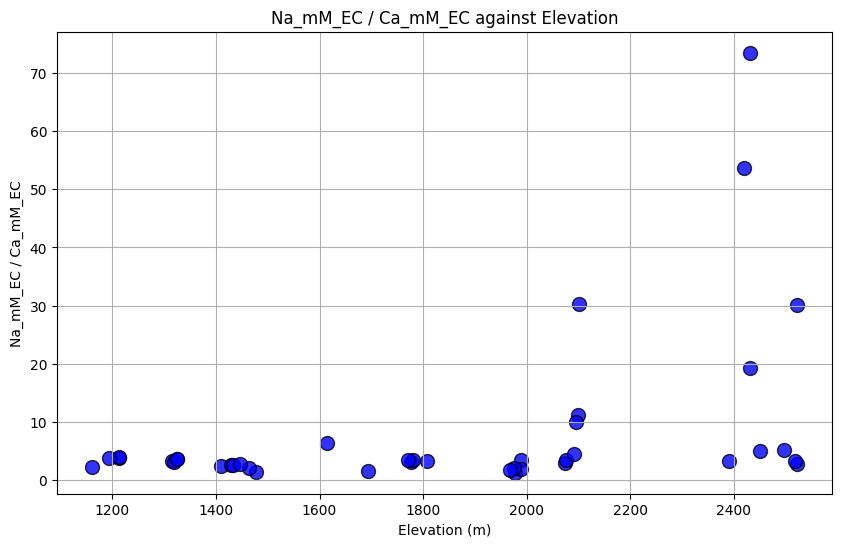

In [ ]:
# Calculate the ratio Na_mM_EC/Ca_mM_EC
df_traverse3['Na/Ca_EC'] = df_traverse3['Na_mM_EC'] / df_traverse3['Ca_mM_EC']

# remove Na/Ca values less than zero
df_traverse3 = df_traverse3[df_traverse3['Na/Ca_EC'] > 0]


plt.figure(figsize=(10, 6))

# Plot Na_mM_EC/Ca_mM_EC against elevation for df_traverse3
plt.scatter(df_traverse3['Elevation'], df_traverse3['Na/Ca_EC'], alpha=0.8, edgecolor='k', s=100, color='blue')

# Add plot labels, title, legend, and grid
plt.xlabel('Elevation (m)')
plt.ylabel('Na_mM_EC / Ca_mM_EC')
plt.title('Na_mM_EC / Ca_mM_EC against Elevation')
plt.grid(True)

# Show the plot
plt.show()


# XSil for Traverse 3

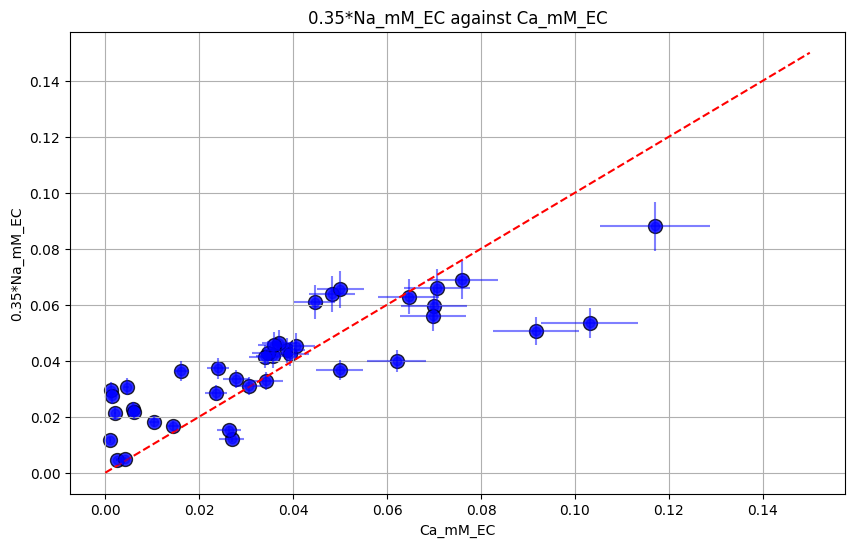

In [ ]:



def Xsil(df):
    
    df_copy = df.copy()

    #print(df_copy)
    
    CaNa_sil = 0.35

    MgNa_sil = 0.24

    
    df_copy['Ca_Sil'] = df_copy['Na_mM_EC'] * CaNa_sil
    
    df_copy['Mg_Sil'] = df_copy['Na_mM_EC'] * MgNa_sil
    
    # nominator
    
    df_copy['X_Sil_Nom'] = ((2*0.35*df_copy['Na_mM_EC']) + (2*0.24*df_copy['Na_mM_EC']) + df_copy['K_mM_EC'] + df_copy['Na_mM_EC'])
    
    # denominator
    df_copy['X_Sil_Denom'] = ((2*df_copy['Ca_mM_EC']) + (2*df_copy['Mg_mM_EC']) + df_copy['K_mM_EC'] + df_copy['Na_mM_EC'])
    
    
    print('Nominator:', df_copy['X_Sil_Nom'])
    
    print('Denominator:', df_copy['X_Sil_Denom'])
    
    
    # df_copy['X_Sil'] - df_copy['X_Sil_Nom'] / df_copy['X_Sil_Denom']
    
    #df_copy['X_Sil'] = ((df_copy['Ca_Sil']/2) + (df_copy['Mg_Sil']/2) + df_copy['*K [aq] (mM)'] + df_copy['*Na [aq] (mM)'])/((2*df_copy['*Ca [aq] (mM)']) + (2*df_copy['*Mg [aq] (mM)']) + df_copy['*K [aq] (mM)'] + df_copy['*Na [aq] (mM)'])
    
    # Filter out X_Sil > 1.0 Samples, and print them "these samples were >1"
    
    filtered_df = df_copy[df_copy['X_Sil'] > 1.0]
    
    # print("These samples had XSil >1:")
    # for index, row in filtered_df.iterrows():
    #     print(row['Sample ID'])
    
    
    #### Changed so it forces to 1.0
    
    # Set any value greater than 1 to 1.0
    #df_copy.loc[df_copy['X_Sil'] > 1.0, 'X_Sil'] = 1.0
    
    
    plt.figure(figsize=(10,6))
    scatter = plt.scatter(df_copy['X_Sil'], df_copy['Elevation'], alpha=0.7, s=70)
    plt.xlabel('XSil')
    plt.ylabel('Elevation')
    
    plt.title(f'Scatter plot of Altitude vs. XSil')

            # Annotate each point with unique_code
    for index, row in df_copy.iterrows():
        plt.text(row['X_Sil'], row['Elevation'], row['Sample ID'], fontsize=8, ha='center', va='bottom')

    #plt.legend()  # Include legend with labels
    #plt.savefig('chemweathering/figures/XSil_Refugio_V_Rainwater.png') 
    plt.show()  # Show each plot individually #
    plt.close()
    #return(df_copy)



# df_traverse3['X_Sil_Nom'] = ((2*0.35*df_traverse3['Na_mM_EC']) + (2*0.24*df_traverse3['Na_mM_EC']) + df_traverse3['K_mM_EC'] + df_traverse3['Na_mM_EC'])
    
# # denominator
# df_traverse3['X_Sil_Denom'] = ((2*df_traverse3['Ca_mM_EC']) + (2*df_traverse3['Mg_mM_EC']) + df_traverse3['K_mM_EC'] + df_traverse3['Na_mM_EC'])

# df_traverse3['X_Sil'] = df_traverse3['X_Sil_Nom'] / df_traverse3['X_Sil_Denom']

# print(df_traverse3['X_Sil'])
# print 0.35*df_traverse3['Na_mM_EC'] against Ca_mM_EC with elevation
plt.figure(figsize=(10, 6))

# Plot 0.35*Na_mM_EC against Ca_mM_EC for df_traverse3
plt.scatter(df_traverse3['Ca_mM_EC'], 0.35*df_traverse3['Na_mM_EC'], alpha=0.8, edgecolor='k', s=100, color='blue')

# Add error bars
xerr = 0.1 * df_traverse3['Ca_mM_EC']
yerr = 0.1 * 0.35 * df_traverse3['Na_mM_EC']
plt.errorbar(df_traverse3['Ca_mM_EC'], 0.35*df_traverse3['Na_mM_EC'], xerr=xerr, yerr=yerr, fmt='o', color='blue', alpha=0.5)

# Add a 1:1 plot
plt.plot([0, 0.15], [0, 0.15], color='red', linestyle='dashed')

# Add plot labels, title, legend, and grid
plt.xlabel('Ca_mM_EC')
plt.ylabel('0.35*Na_mM_EC')
plt.title('0.35*Na_mM_EC against Ca_mM_EC')
plt.grid(True)  

# Show the plot
plt.show()    


# Log Ratios

/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_5071/2014463638.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traverse3['1/T'] = 1 / df_traverse3['Temperature']
/Users/enrico/.pyenv/versions/3.9.13/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


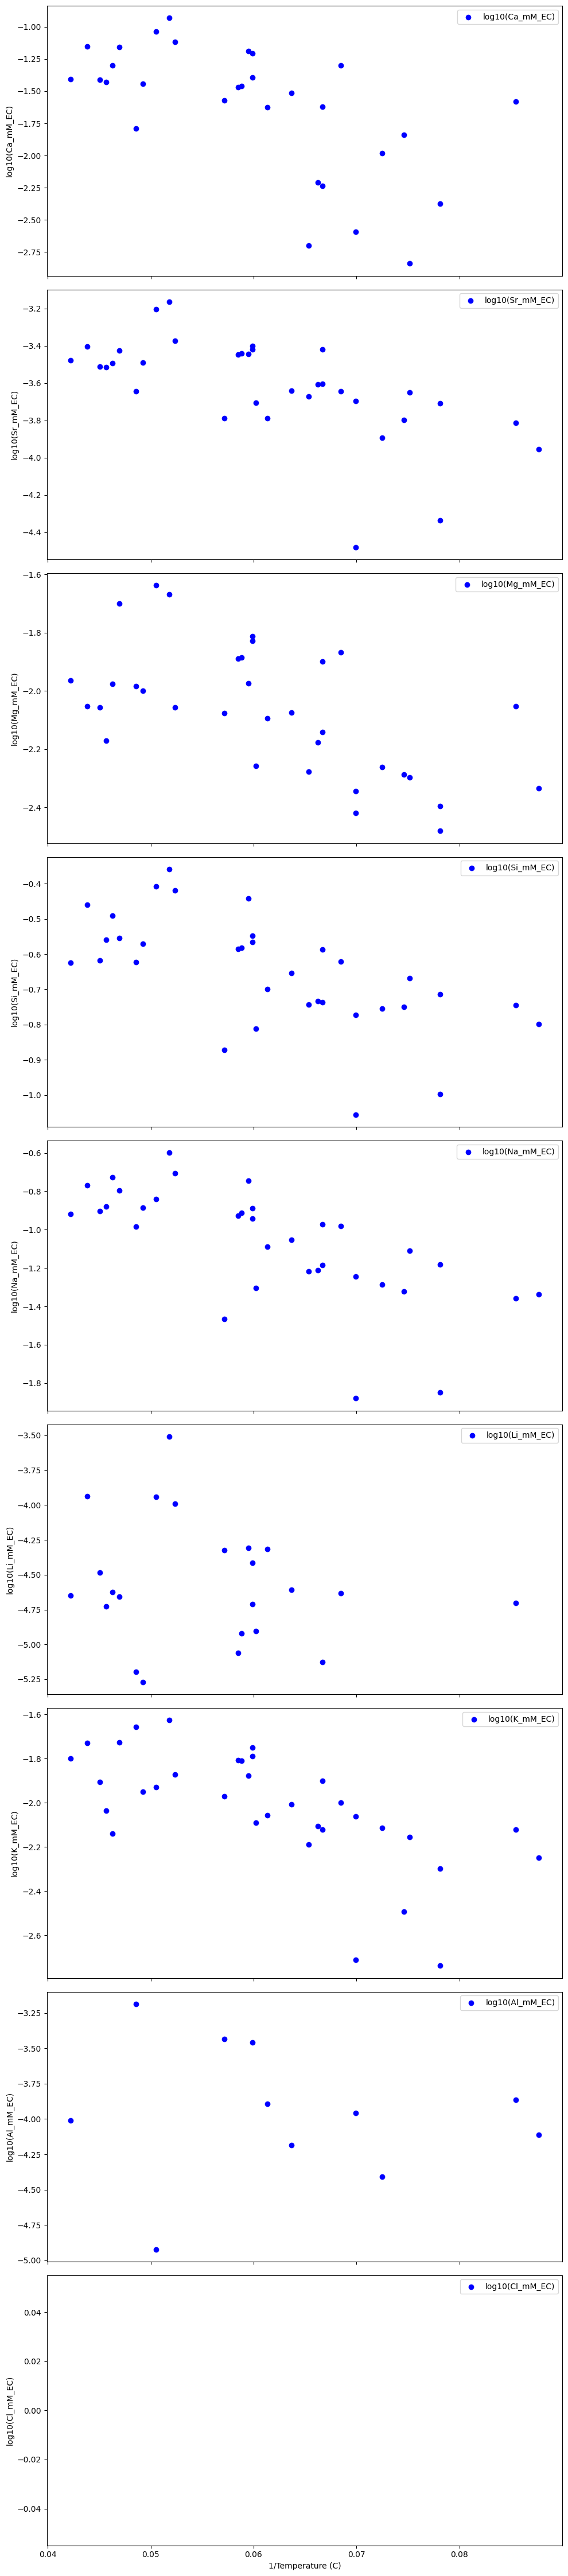

In [ ]:
# List of elements to plot
elements = ['Ca_mM_EC', 'Sr_mM_EC', 'Mg_mM_EC', 'Si_mM_EC', 'Na_mM_EC', 'Li_mM_EC', 'K_mM_EC', 'Al_mM_EC', 'Cl_mM_EC']

df_traverse3['1/T'] = 1 / df_traverse3['Temperature']

# Create a figure and axes for the plots
fig, axs = plt.subplots(len(elements), 1, figsize=(10, len(elements) * 5), sharex=True)

# Loop through each element and create a scatter plot
for i, element in enumerate(elements):
    ax = axs[i]
    ax.scatter(df_traverse3['1/T'], np.log10(df_traverse3[element]), label=f'log10({element})', color='blue')
    ax.set_ylabel(f'log10({element})')
    ax.legend()

# Set the x-axis label for the last subplot
axs[-1].set_xlabel('1/Temperature (C)')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_5071/1494159572.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traverse3['Fe_mM'] = df_traverse3['Fe_ppm'] /56.0
/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_5071/1494159572.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traverse3['log10(Si_mM/Al_mM)'] = np.log10(df_traverse3['Si_mM'] / df_traverse3['Al_mM'])
/Users/enrico/.pyenv/versions/3.9.13/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: i

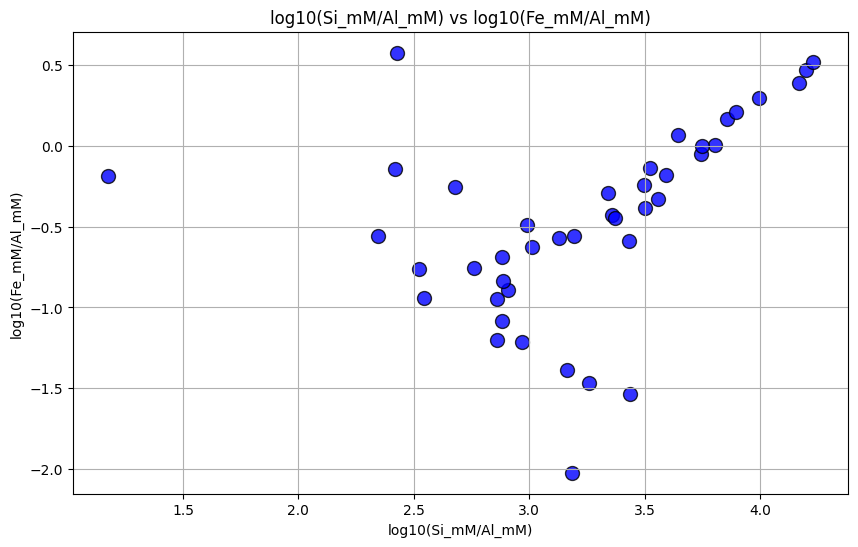

In [ ]:
# plot log10(Si_mM/Al_mM) against log10(Fe_mM/Al_mM) for df_traverse3

df_traverse3['Fe_mM'] = df_traverse3['Fe_ppm'] /56.0

# Calculate the log10 ratios
df_traverse3['log10(Si_mM/Al_mM)'] = np.log10(df_traverse3['Si_mM'] / df_traverse3['Al_mM'])
df_traverse3['log10(Fe_mM/Al_mM)'] = np.log10(df_traverse3['Fe_mM'] / df_traverse3['Al_mM'])

# Plot the data
#saprolite and linolite

plt.figure(figsize=(10, 6))
plt.scatter(df_traverse3['log10(Si_mM/Al_mM)'], df_traverse3['log10(Fe_mM/Al_mM)'], alpha=0.8, edgecolor='k', s=100, color='blue')

# Add plot labels, title, and grid
plt.xlabel('log10(Si_mM/Al_mM)')
plt.ylabel('log10(Fe_mM/Al_mM)')
plt.title('log10(Si_mM/Al_mM) vs log10(Fe_mM/Al_mM)')
plt.grid(True)

# Show the plot
plt.show()

/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_5071/426865963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traverse3['log10(Na/Ca)'] = np.log10(df_traverse3['Na_mM_EC'] / df_traverse3['Ca_mM_EC'])
/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_5071/426865963.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traverse3['log10(Si/Ca)'] = np.log10(df_traverse3['Si_mM_EC'] / df_traverse3['Ca_mM_EC'])


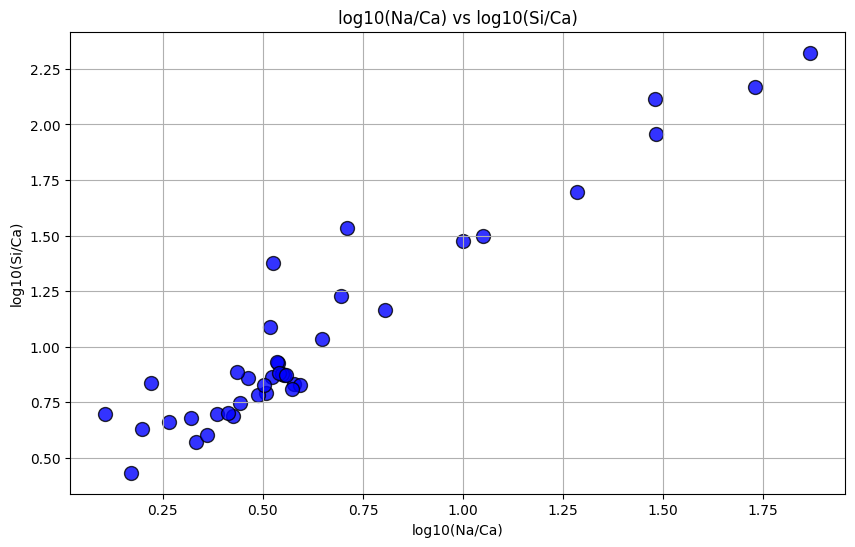

In [ ]:
# Calculate the log10 ratios
df_traverse3['log10(Na/Ca)'] = np.log10(df_traverse3['Na_mM_EC'] / df_traverse3['Ca_mM_EC'])
df_traverse3['log10(Si/Ca)'] = np.log10(df_traverse3['Si_mM_EC'] / df_traverse3['Ca_mM_EC'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(df_traverse3['log10(Na/Ca)'], df_traverse3['log10(Si/Ca)'], alpha=0.8, edgecolor='k', s=100, color='blue')



# Add plot labels, title, and grid
plt.xlabel('log10(Na/Ca)')
plt.ylabel('log10(Si/Ca)')
plt.title('log10(Na/Ca) vs log10(Si/Ca)')
plt.grid(True)

# Show the plot
plt.show()

/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_5071/3674673608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traverse3['log_Al_Ca_K_Na'] = np.log(df_traverse3['Al_mM'] / (df_traverse3['Ca_mM'] * df_traverse3['K_mM'] * df_traverse3['Na_mM']))


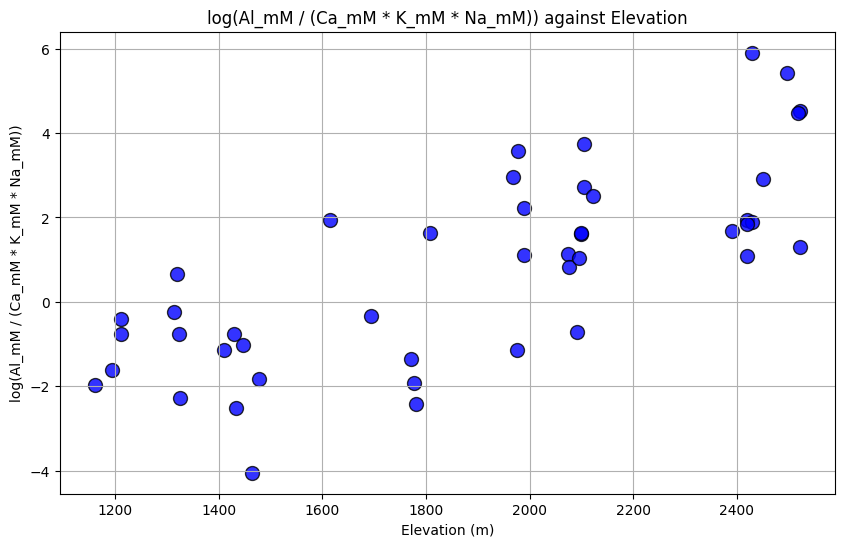

In [ ]:
# Calculate the log ratio
df_traverse3['log_Al_Ca_K_Na'] = np.log(df_traverse3['Al_mM'] / (df_traverse3['Ca_mM'] * df_traverse3['K_mM'] * df_traverse3['Na_mM']))

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(df_traverse3['Elevation'], df_traverse3['log_Al_Ca_K_Na'], alpha=0.8, edgecolor='k', s=100, color='blue')

# Add plot labels, title, and grid
plt.xlabel('Elevation (m)')
plt.ylabel('log(Al_mM / (Ca_mM * K_mM * Na_mM))')
plt.title('log(Al_mM / (Ca_mM * K_mM * Na_mM)) against Elevation')
plt.grid(True)

# Show the plot
plt.show()

# Model


In [ ]:
# Model


# C = concentration of a particular ion. this will be evaporite corrected (uMol/L)

# C_0 = concentration of rainwater for that particular ion (uMol/L)

# C_eq = max concentration of this particular ion (uMol/L)

# A = Specific surface area = 0.1 (m^2/g)

# Xr = Mineral concentration in rock = 0.36 (unitless, g/g)

# Rho_sf = Mass mineral / fluid volume ratio = density_feldspar/porosity = 2.23/porosity (g/cm^3)

# k = reaction rate (mol/m^2/s)

# T_eq = equilibration time (s). Can take a guess at the start, say 100 years and see

# T_res = residence time, what we want to figure out

In [ ]:
# a = 1

# b = -C_eq / ((A*Xr*Rho_sf*k) * ln((C-Ceq)/(Co-Ceq)))

# c = -C_eq * T_eq /(A*Xr*Rho_sf*k) * ln((C-Ceq)/(Co-Ceq))

# T_res = (-b + sqrt(b^2 - 4ac)) / 2a


In [ ]:
# define an element dictionary
from scipy.spatial import cKDTree

elements = {'Na_mM_EC', 'Ca_mM_EC', 'Mg_mM_EC', 'Si_mM_EC', 'K_mM_EC', 'Al_mM_EC'}

elements_rain = {'Na_mM', 'Ca_mM', 'Mg_mM', 'Si_mM', 'K_mM', 'Al_mM'}


df_traverse3 = df_copy[df_copy['Traverse'] == 'Traverse 3']

# Build KDTree for efficient nearest neighbor search
tree = cKDTree(df_rain[['Latitude', 'Longitude']].values)

# Calculate C_eq as the maximum concentration for each element in df_traverse3
C_0 = {element: df_traverse3[element].min() for element in elements}

for element in elements:
    df_traverse3[f'C_0_{element}'] = C_0[element]


/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_38671/2710129827.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traverse3[f'C_0_{element}'] = C_0[element]
/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_38671/2710129827.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traverse3[f'C_0_{element}'] = C_0[element]
/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_38671/2710129827.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [ ]:
# Calculate C_eq as the maximum concentration for each element in df_traverse3
C_eq = {element: df_traverse3[element].max() for element in elements}

for element in elements:
    df_traverse3[f'C_eq_{element}'] = C_eq[element]

# print the first 5 rows of C_eq_element
print(df_traverse3[[f'C_eq_{element}' for element in elements]].head())


    C_eq_Si_mM_EC  C_eq_Na_mM_EC  C_eq_Al_mM_EC  C_eq_Ca_mM_EC  C_eq_Mg_mM_EC  \
51       0.437546       0.251491       0.016205       0.117019       0.035424   
52       0.437546       0.251491       0.016205       0.117019       0.035424   
53       0.437546       0.251491       0.016205       0.117019       0.035424   
54       0.437546       0.251491       0.016205       0.117019       0.035424   
55       0.437546       0.251491       0.016205       0.117019       0.035424   

    C_eq_K_mM_EC  
51       0.02832  
52       0.02832  
53       0.02832  
54       0.02832  
55       0.02832  


/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_38671/433792910.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traverse3[f'C_eq_{element}'] = C_eq[element]
/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_38671/433792910.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traverse3[f'C_eq_{element}'] = C_eq[element]
/var/folders/9m/bjwjgvv11dxfyfxcm241dlrh0000gn/T/ipykernel_38671/433792910.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [ ]:
A_a = 0.1  # Specific surface area (m^2/g)

X_r = 0.36  # Mineral concentration in rock (unitless, g/g)

rho_sf = 2.23 / 0.3  # Mass mineral / fluid volume ratio (g/cm^3), assuming porosity = 0.3 [for now]

k = 10**(-15) # Reaction rate (mol/m^2/s)

T_eq = 10 * 365 * 24 * 3600 * 10**6 # Equilibration time (s), assuming 100 years

# T_res will come out in 10^-9 s
# so to get T_res in seconds, we need to divide by 10^-9



In [ ]:

# Function to calculate T_res
def calculate_T_res(C, C_0, C_eq):
    if C_eq - C_0 == 0 or C_eq - C == 0:
        return np.nan, np.nan, np.nan  # Ensure all three values are returned

    ln_term = np.log((C_eq - C_0)/ (C_eq - C))
    
    
    denominator = A_a * X_r * rho_sf * k

    b = - C_eq * ln_term / denominator
    c = - C_eq * T_eq * ln_term / denominator 

    discriminant = b**2 - 4 * c

    if discriminant < 0:
        return np.nan, discriminant, np.nan  # Ensure three outputs

    T_res = (-b + np.sqrt(discriminant)) / 2
    
    T_res_yr = T_res / 31556952000000  # Convert seconds to years
    
    return T_res_yr, discriminant, b

# Apply calculation to each element in df_traverse3
for element in elements:
    df_T_res = df_traverse3.apply(
        lambda row: pd.Series(calculate_T_res(row[element], row[f'C_0_{element}'], row[f'C_eq_{element}'])), axis=1
    )

    df_T_res.columns = [f'T_res_{element}', f'Discriminant_{element}', f'b_{element}']

    df_traverse3 = pd.concat([df_traverse3, df_T_res], axis=1)

In [ ]:
print("T_res Range for Each Element:")
for element in elements:
    T_res_min = df_traverse3[f'T_res_{element}'].dropna().min()
    T_res_max = df_traverse3[f'T_res_{element}'].dropna().max()

    # Handle potential Series output
    if isinstance(T_res_min, pd.Series):
        T_res_min = T_res_min.iloc[0]
    if isinstance(T_res_max, pd.Series):
        T_res_max = T_res_max.iloc[0]

    print(f"Element: {element}, T_res range: {T_res_min:.2f} to {T_res_max:.2f} years")

print("\nDiscriminant Range for Each Element:")
for element in elements:
    discriminant_min = np.sqrt(df_traverse3[f'Discriminant_{element}'].dropna().min())
    discriminant_max = np.sqrt(df_traverse3[f'Discriminant_{element}'].dropna().max())

    if isinstance(discriminant_min, pd.Series):
        discriminant_min = discriminant_min.iloc[0]
    if isinstance(discriminant_max, pd.Series):
        discriminant_max = discriminant_max.iloc[0]

    print(f"Element: {element}, Discriminant range: {discriminant_min:.2f} to {discriminant_max:.2f}")

print("\nb Range for Each Element:")
for element in elements:
    b_min = df_traverse3[f'b_{element}'].dropna().min()
    b_max = df_traverse3[f'b_{element}'].dropna().max()

    if isinstance(b_min, pd.Series):
        b_min = b_min.iloc[0]
    if isinstance(b_max, pd.Series):
        b_max = b_max.iloc[0]

    print(f"Element: {element}, b range: {b_min:.2f} to {b_max:.2f}")


T_res Range for Each Element:
Element: Si_mM_EC, T_res range: 0.00 to 114.04 years
Element: Na_mM_EC, T_res range: 0.00 to 52.11 years
Element: Al_mM_EC, T_res range: 0.00 to 1.06 years
Element: Ca_mM_EC, T_res range: 0.00 to 37.31 years
Element: Mg_mM_EC, T_res range: 0.00 to 8.62 years
Element: K_mM_EC, T_res range: 0.00 to 11.06 years

Discriminant Range for Each Element:
Element: Si_mM_EC, Discriminant range: 0.00 to 3888620078832781.00
Element: Na_mM_EC, Discriminant range: 0.00 to 1909121264070572.00
Element: Al_mM_EC, Discriminant range: 0.00 to 63633370671736.38
Element: Ca_mM_EC, Discriminant range: 0.00 to 1426104544272083.25
Element: Mg_mM_EC, Discriminant range: 0.00 to 418187559148550.19
Element: K_mM_EC, Discriminant range: 0.00 to 514560218713120.50

b Range for Each Element:
Element: Si_mM_EC, b range: -3308718264004332.00 to -0.00
Element: Na_mM_EC, b range: -1379889787931616.25 to -0.00
Element: Al_mM_EC, b range: -3201859745384.23 to -0.00
Element: Ca_mM_EC, b range:

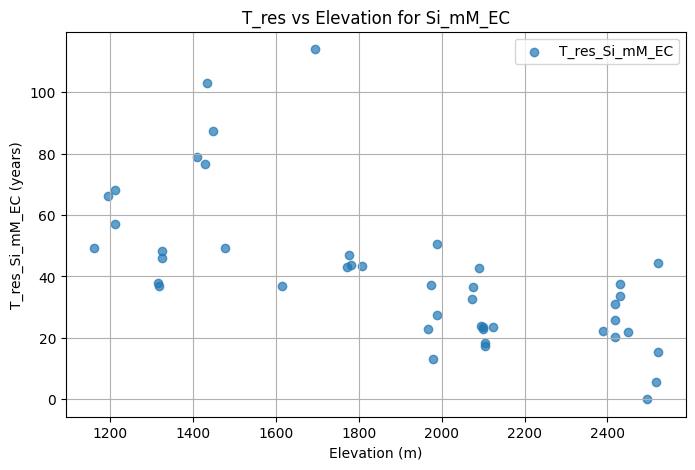

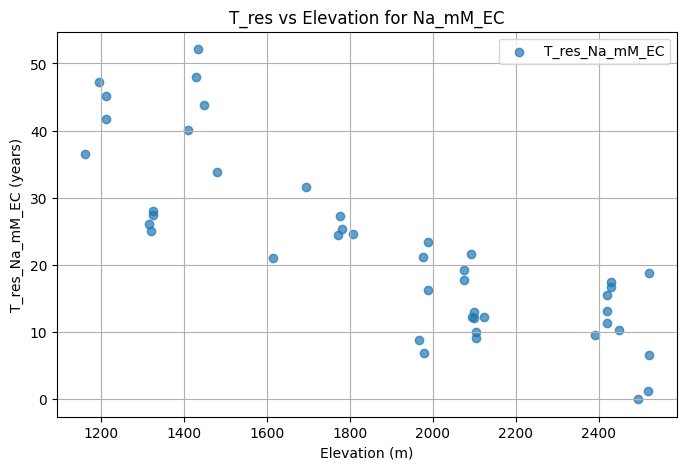

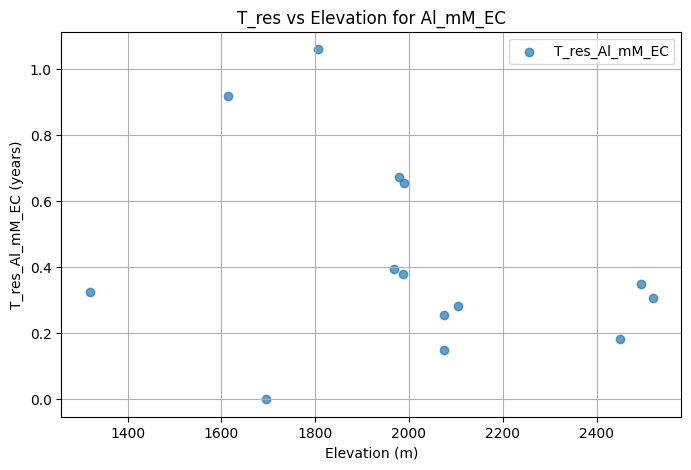

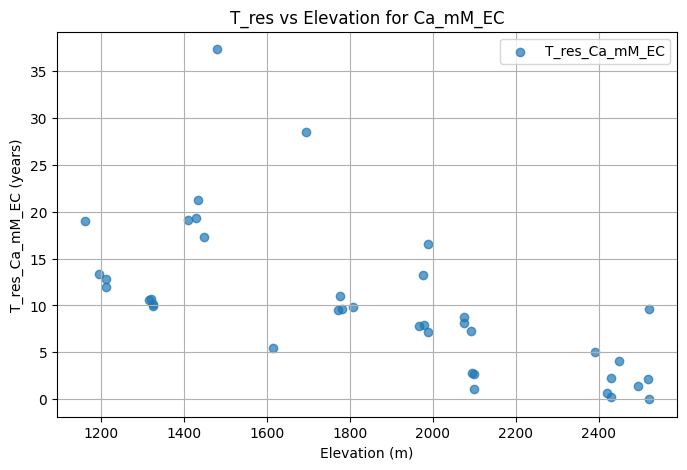

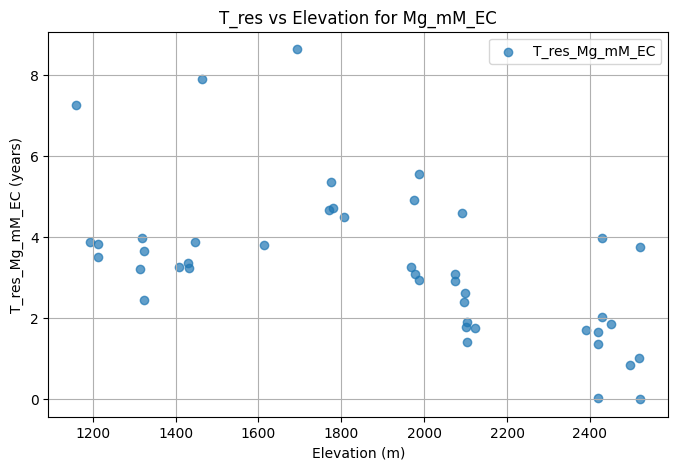

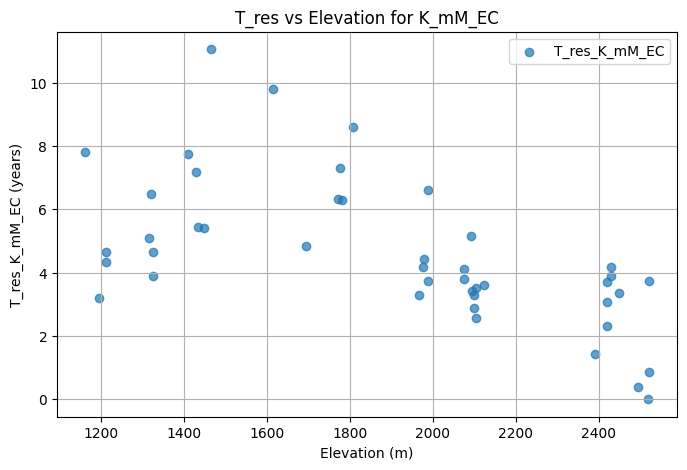

In [ ]:
#Create individual plots for each element
for element in elements:
    plt.figure(figsize=(8, 5))
    plt.scatter(df_traverse3["Elevation"], df_traverse3[f"T_res_{element}"], alpha=0.7, label=f"T_res_{element}")
    plt.xlabel("Elevation (m)")
    plt.ylabel(f"T_res_{element} (years)")
    plt.title(f"T_res vs Elevation for {element}")
    plt.legend()
    plt.grid(True)
    plt.show()

# Timeseries



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


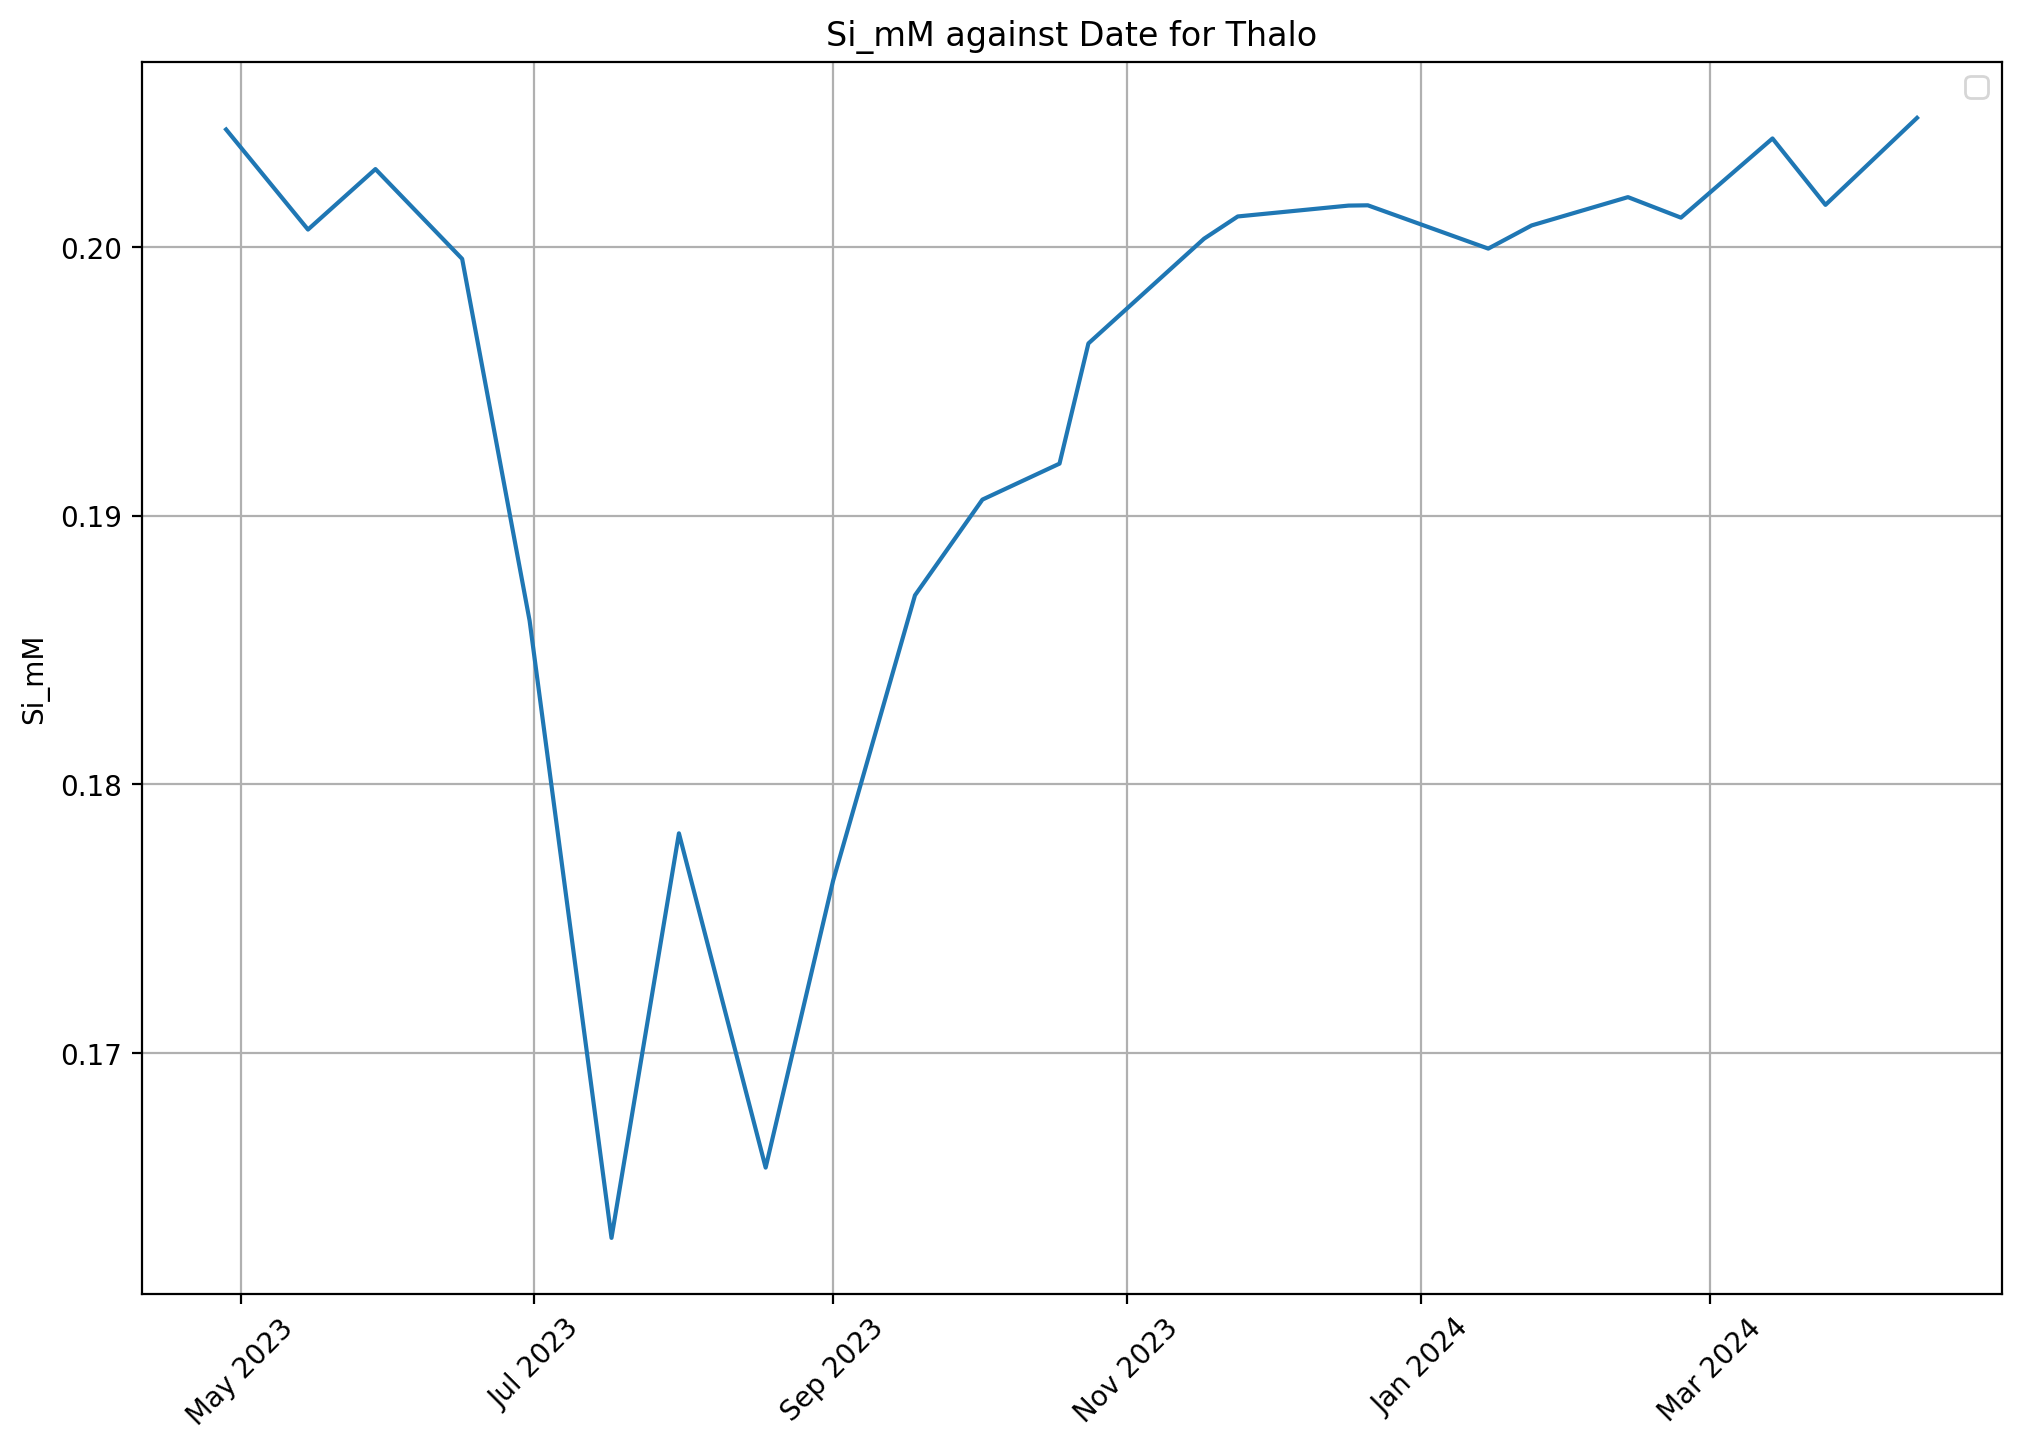

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define season names (case insensitive)
seasons = ['thalo_timeseries']
seasons_lower = [s.lower() for s in seasons]  # Convert to lowercase for matching

# Convert the "Season" column to lowercase for comparison
df_timeseries["Season"] = df_timeseries["Season"].str.lower()

# Remove specific Sample IDs
df_timeseries = df_timeseries[~df_timeseries['Sample ID'].isin(['NTS24_TH_01', 'NTS24_TH_16', 'NTS24_TH_17'])]

# Ensure 'Date' column is in datetime format
df_timeseries["Date"] = pd.to_datetime(df_timeseries["Date"])

# Plot Si_mM against Date for each season
plt.figure(figsize=(12, 8), dpi=200)

for season in seasons_lower:
    season_data = df_timeseries[df_timeseries['Season'] == season]
    if not season_data.empty:
        plt.plot(season_data['Date'], season_data['Si_mM'])

# Format x-axis ticks to show Month and Year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Example: "Jan 2023"
plt.xticks(rotation=45)


plt.ylabel('Si_mM')
plt.title('Si_mM against Date for Thalo')
plt.legend()
plt.grid(True)
plt.savefig('Si_mM_Thalo_timeseries.pdf')
plt.show()


# Ridge distance

In [ ]:
from geopy.distance import geodesic

# Assuming df_copy is your DataFrame with 'Latitude' and 'Longitude' columns
ridge_longitude = 86.62  # Longitude of the ridge crest

# Function to calculate horizontal distance from the ridge crest at the same latitude
def calculate_ridge_distance(lat, lon):
    # The reference point at the same latitude as the given point, with the ridge longitude
    reference_point = (lat, ridge_longitude)
    point = (lat, lon)  # Using the same latitude but varying the longitude
    distance = geodesic(reference_point, point).kilometers
    return distance

# Apply the function to each row and add 'ridge distance' column to df_copy
df_copy['ridge distance'] = df_copy.apply(lambda row: calculate_ridge_distance(row['Latitude'], row['Longitude']), axis=1)


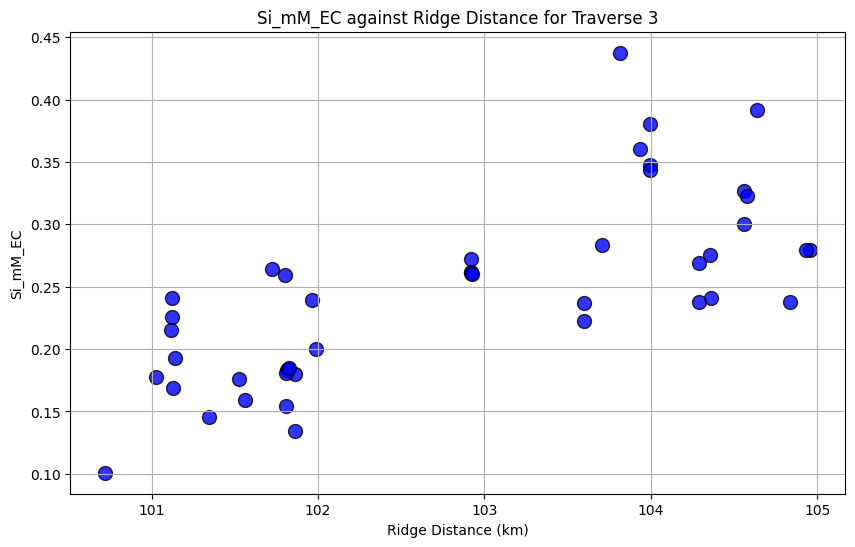

In [ ]:
# Filter the data for Traverse 3
df_traverse3 = df_copy[df_copy['Traverse'] == 'Traverse 3']

# Plot Si_mM_EC against ridge distance
plt.figure(figsize=(10, 6))
plt.scatter(df_traverse3['ridge distance'], df_traverse3['Si_mM_EC'], alpha=0.8, edgecolor='k', s=100, color='blue')

# Add plot labels, title, and grid
plt.xlabel('Ridge Distance (km)')
plt.ylabel('Si_mM_EC')
plt.title('Si_mM_EC against Ridge Distance for Traverse 3')
plt.grid(True)

# Show the plot
plt.savefig('Si_mM_EC_Ridge_Distance.pdf')
plt.show()

In [ ]:
# Calculate Na/Si ratios
df_copy['Na/Si'] = df_copy['Na_mM'] / df_copy['Si_mM']

# Group by season and print the Na/Si ratios
for season in df_copy['Season'].unique():
    season_data = df_copy[df_copy['Season'] == season]
    print(f"Na/Si ratios for {season}:")
    print(season_data[['Sample ID', 'Na/Si']])
    print()

Na/Si ratios for Sep_24:
    Sample ID     Na/Si
2   Nep24-013       NaN
47  Nep24-001  0.822777
48  Nep24-002  0.645797
49  Nep24-003  0.717808
51  Nep24-010  0.539971
52  Nep24-011  0.518154
54  Nep24-015  0.356736
55  Nep24-016  0.258631
56  Nep24-017  0.411851
59  Nep24-020  0.355349
60  Nep24-021  0.359018
61  Nep24-022  0.350836
62  Nep24-023  0.371674
63  Nep24-025  0.293289
65  Nep24-027  0.253446
66  Nep24-028  0.289661
67  Nep24-034  0.378513
68  Nep24-038  0.504943
69  NEP24-040  0.386304
70  NEP24-041  0.444781
71  NEP24-042       NaN
73  NEP24-050  0.311202
74  NEP24-051  0.400465
75  NEP24-052  0.402893
77  NEP24-062  0.480401
78  NEP24-063  0.585512
79  NEP24-064  1.002196
80  NEP24-065  1.147647
81  NEP24-066  0.576677
82  NEP24-067  0.793717
83  NEP24-068  0.692614

Na/Si ratios for Nov_18:
    Sample ID     Na/Si
84    MKS 10B  0.735047
85    MKS 11B  0.676894
86    MKS 15B  0.478712
87    MKS 18B  0.392505
88     MKS 1B  0.519861
89    MKS 21B  0.315736
90    MKS 22B